In [864]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'   # enable if you have a retina display


import numpy as np
import pandas as pd
import scipy.stats as sps

from scipy.integrate import simpson, quad, quad_vec
from scipy.special import jv
from scipy.interpolate import interp1d

from os.path import join

from tqdm import tqdm

In [865]:
plt.style.use('Joey')

In [866]:
import mossbauer
from mossbauer.utils import *

In [867]:
from mossbauer.materials import *

FCy Ref Absorber

In [868]:
datadir = '/home/mossbauer/Data'

In [869]:
absorber = PotassiumFerrocyanide()

In [870]:
absorber.thickness_normalized

1.95

## Thin alpha 7/21 really good scan

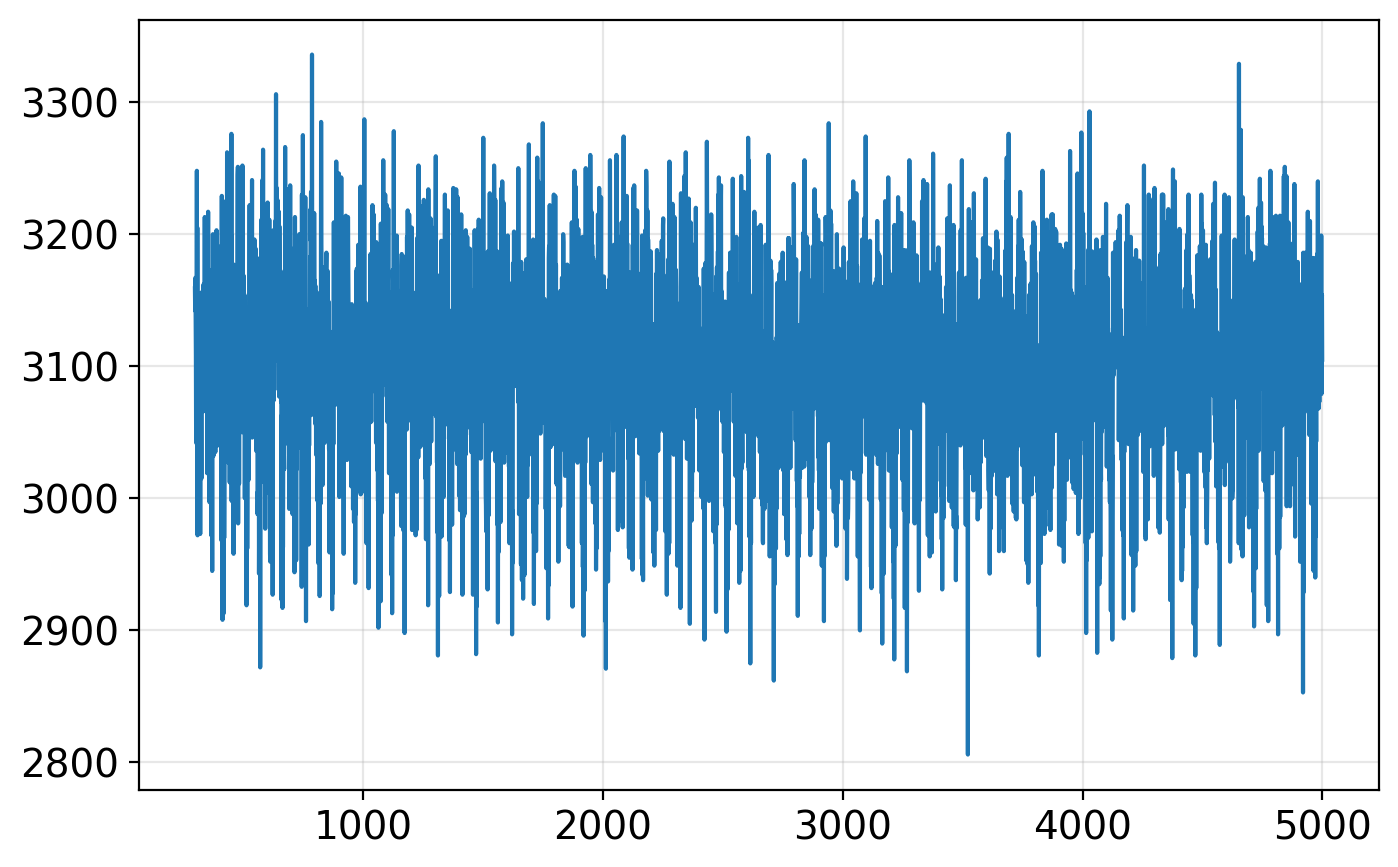

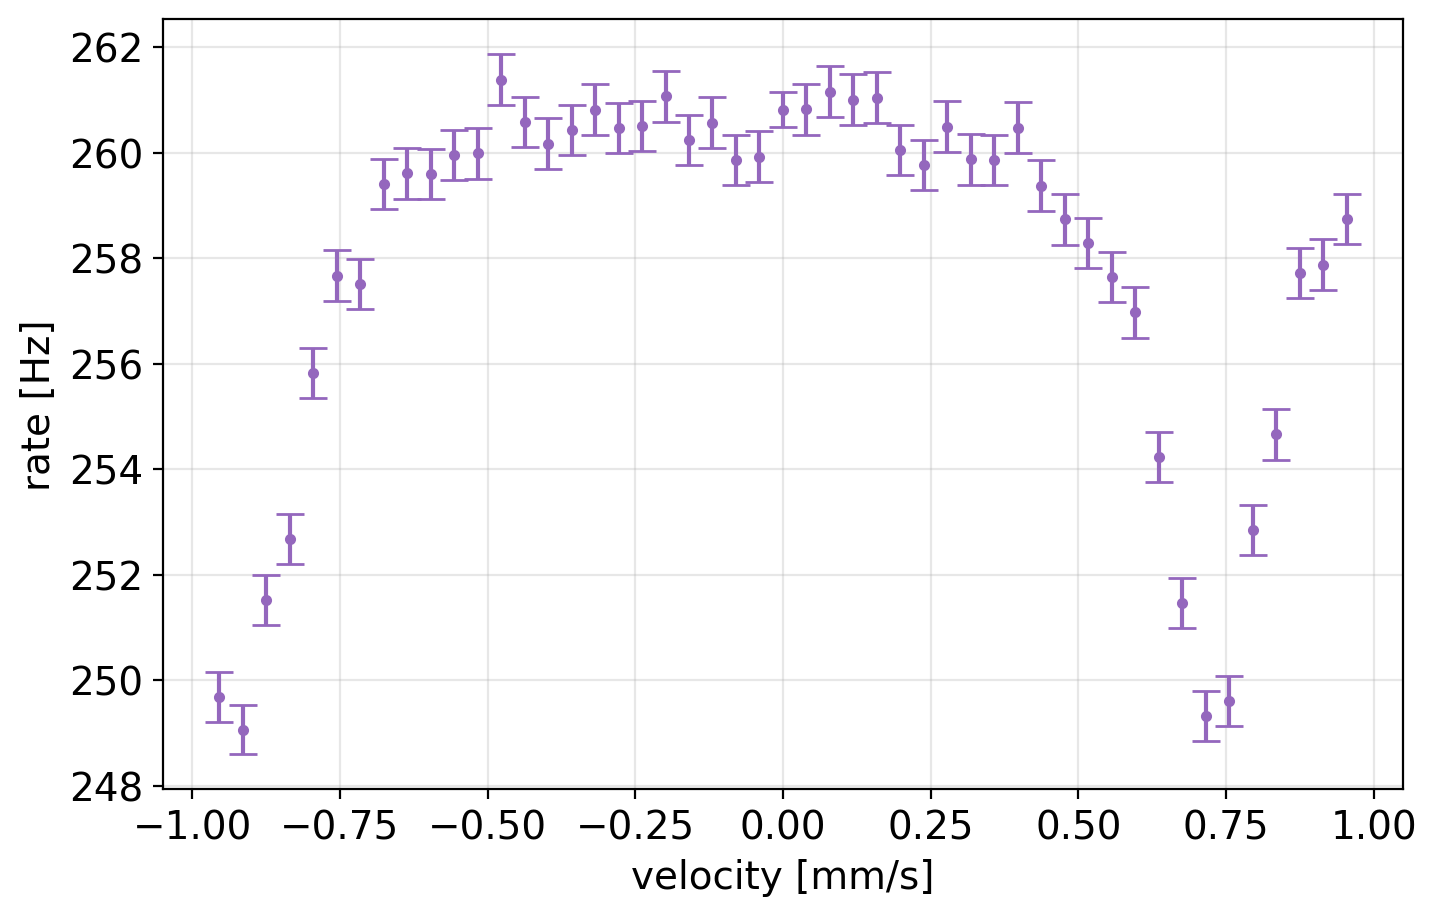

In [123]:


fname = '20230721_scan/Fe0004_0.9_mms_25steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[300:5000]
plt.plot(data['count'])
plt.show()

#data = data[data['count'] > 2]
data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C4.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.show()


{'date': '20230721'}
0.5104591537051637
397.21829706986284


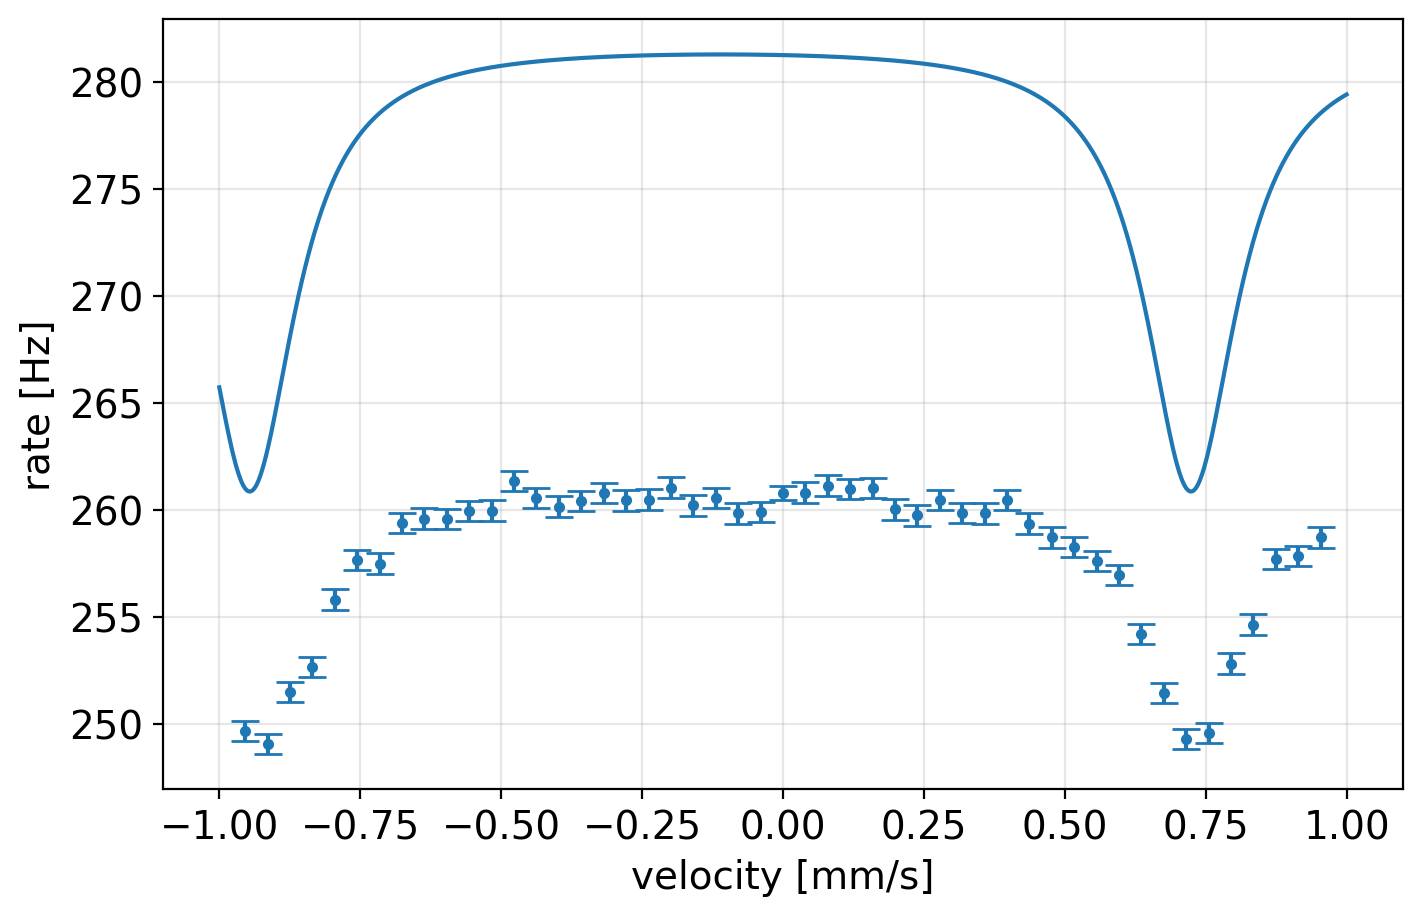

In [124]:
source = CobaltRhodiumMatrix(date='20230721')

absorber = AlphaIron(thickness_microns=0.4*25.4)


### measurement parameters
detector_face_OD = 1.75 * 25.4  # mm
detector_distance = 17 * 25.4  # mm
measurement_parameters = dict(
    solid_angle_fraction=(detector_face_OD**2)/(16*detector_distance**2),
    background_rate=109.0,
    detection_efficiency=0.56  * (31521/43245) * 473/665,  # Be window * cardboard * empirical source rate difference (from background fits)
)
moss_thinalpha = mossbauer.MossbauerMeasurement(source, absorber, measurement_parameters)

print((source.total_activity*moss_thinalpha.detection_efficiency*moss_thinalpha.solid_angle_fraction) + moss_thinalpha.background_rate)

vel = np.linspace(-1, 1, 1000)
plt.plot(vel, moss_thinalpha.transmitted_spectrum(vel))
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C0.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.show()

{'date': '20230721'}
0.5104591537051637
365.3964673628765


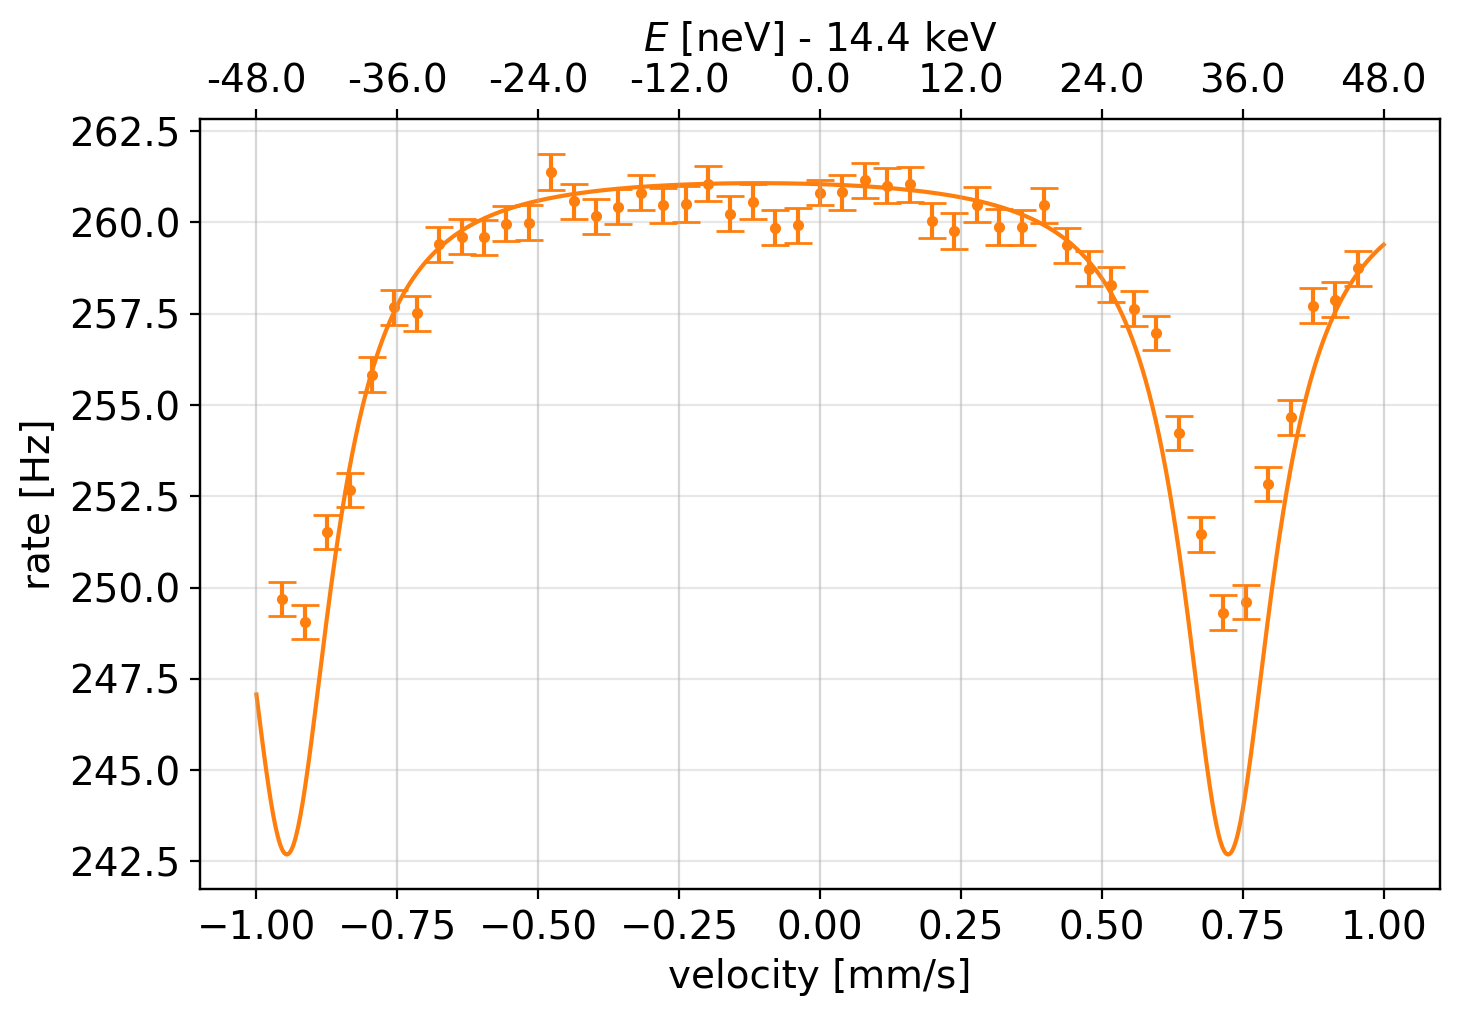

In [125]:
source = CobaltRhodiumMatrix(date='20230721')

absorber = AlphaIron(thickness_microns=0.4*25.4)


### measurement parameters
detector_face_OD = 1.75 * 25.4  # mm
detector_distance = 17 * 25.4  # mm
measurement_parameters = dict(
    solid_angle_fraction=(detector_face_OD**2)/(16*detector_distance**2),
    background_rate=106.0,
    detection_efficiency=0.56  * (31521/43245) * 473/665 * 0.9,  # Be window * cardboard * empirical source rate difference (from background fits)
)
moss_thinalpha = mossbauer.MossbauerMeasurement(source, absorber, measurement_parameters)

print((source.total_activity*moss_thinalpha.detection_efficiency*moss_thinalpha.solid_angle_fraction) + moss_thinalpha.background_rate)

vel = np.linspace(-1, 1, 1000)

fig, ax = plt.subplots(1, 1)

plt.plot(vel, moss_thinalpha.transmitted_spectrum(vel), color='C1')
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C1.',
    capsize=5
)

plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
mossbauer.add_energy_axis(ax)

if True:
    plt.savefig('../plots/Fe0004in_25steps_20230727.png')
plt.show()

In [126]:
source = CobaltRhodiumMatrix(date='20230721')

absorber = AlphaIron(thickness_microns=0.4*25.4)


### measurement parameters
detector_face_OD = 1.75 * 25.4  # mm
detector_distance = 17 * 25.4  # mm
measurement_parameters = dict(
    solid_angle_fraction=(detector_face_OD**2)/(16*detector_distance**2),
    background_rate=149.0,
    detection_efficiency=0.56  * (31521/43245) * 473/665 * 0.65,  # Be window * cardboard * empirical source rate difference (from background fits)
)
moss_thinalpha = mossbauer.MossbauerMeasurement(source, absorber, measurement_parameters)

print((source.total_activity*moss_thinalpha.detection_efficiency*moss_thinalpha.solid_angle_fraction) + moss_thinalpha.background_rate)

{'date': '20230721'}
0.5104591537051637
336.34189309541085


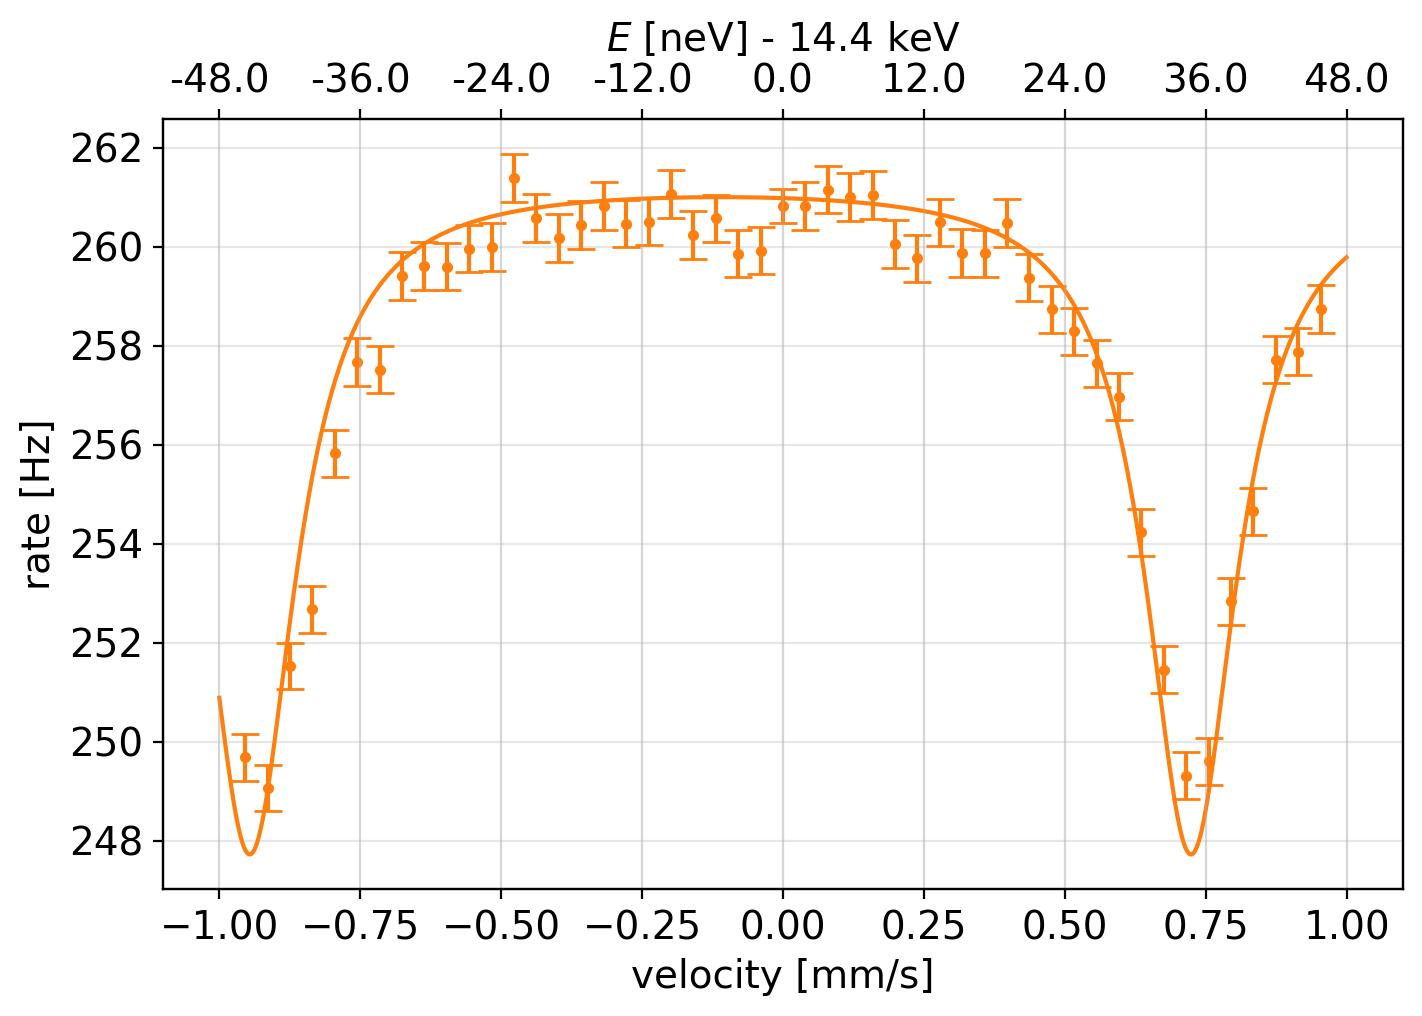

In [127]:
vel = np.linspace(-1, 1, 1000)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(vel, moss_thinalpha.transmitted_spectrum(vel), color='C1')
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C1.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
mossbauer.add_energy_axis(ax)
if False:
    plt.savefig('../plots/Fe0004in_25steps_20230721_fit.png')
plt.show()

## FeCy 7/26 after hist change

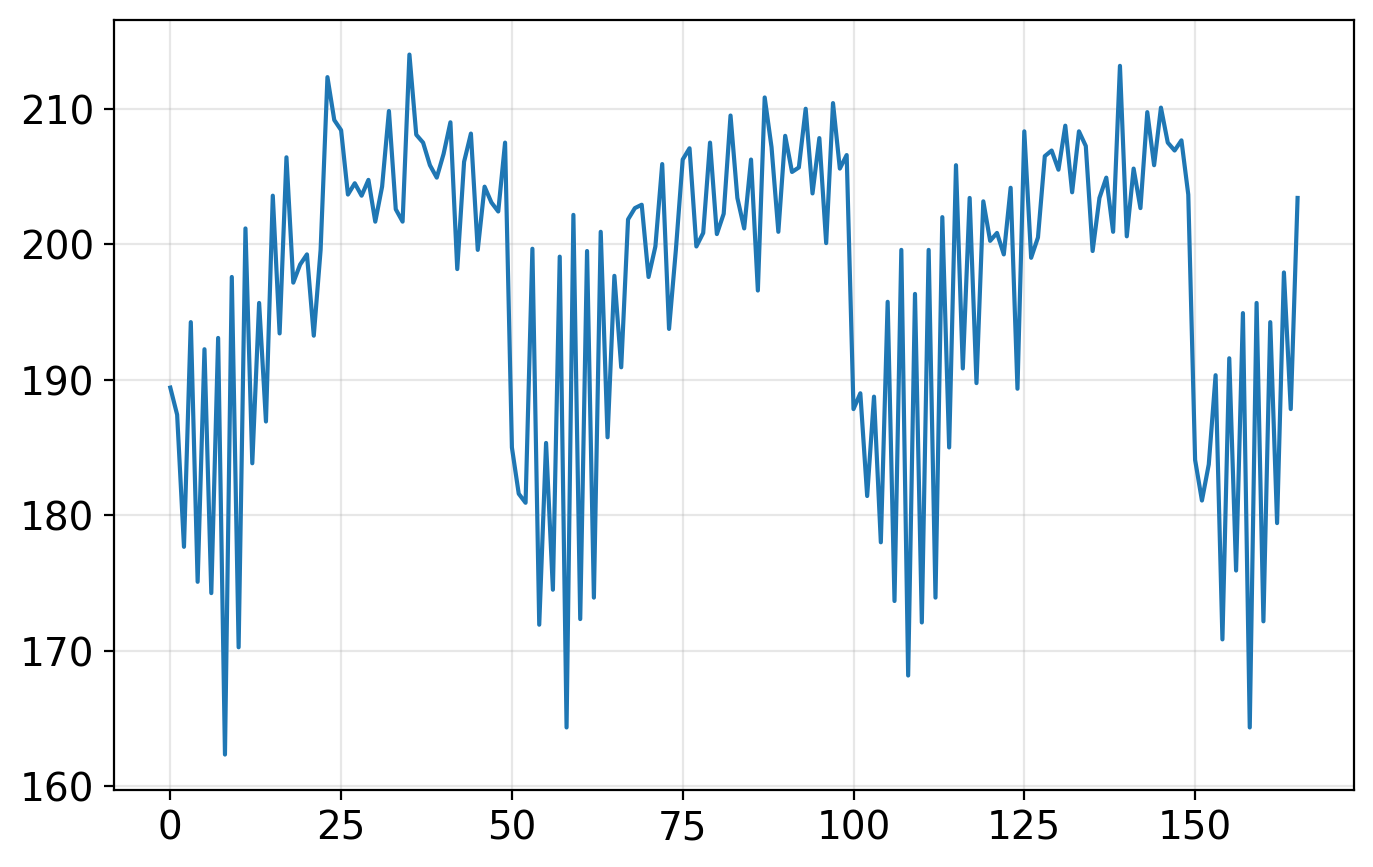

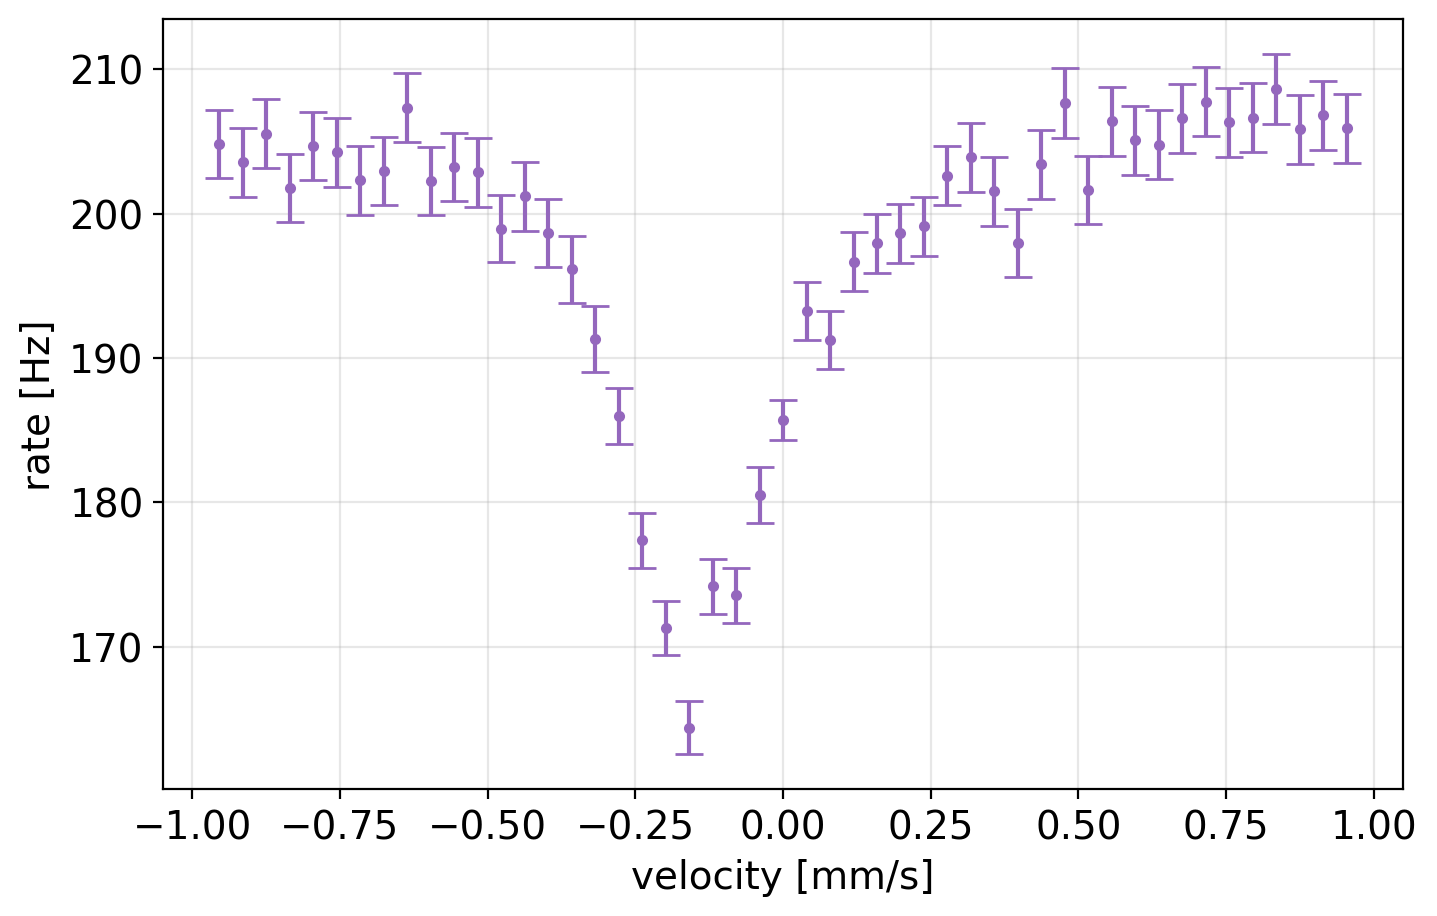

In [128]:
fname = '20230726_scan/FeCye_0.9_mms_25steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
plt.plot(data['count']/data['DAQ_time'])
plt.show()

data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C4.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.show()


## Naked Iron

In [129]:
data.columns

Index(['count', 'unskimmed_count', 'DAQ_time', 'frequency', 'fit_velocity',
       'fit_err', 'fit_msr', 'time'],
      dtype='object')

In [130]:
fname = '20230726_scan/Fe0004naked_0.9_mms_25steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data_1 = data[(data.index < 3000)]
data_2 = data[(data.index > 3600)]
#data = data[(data.index < 100)]# | (data.index > 3600)]

In [131]:
data_1.nominal_velocity.unique()

array([ 0.     ,  0.03975, -0.03975,  0.0795 , -0.0795 ,  0.11925,
       -0.11925,  0.159  , -0.159  ,  0.19875, -0.19875,  0.2385 ,
       -0.2385 ,  0.27825, -0.27825,  0.318  , -0.318  ,  0.35775,
       -0.35775,  0.3975 , -0.3975 ,  0.43725, -0.43725,  0.477  ,
       -0.477  ,  0.51675, -0.51675,  0.5565 , -0.5565 ,  0.59625,
       -0.59625,  0.636  , -0.636  ,  0.67575, -0.67575,  0.7155 ,
       -0.7155 ,  0.75525, -0.75525,  0.795  , -0.795  ,  0.83475,
       -0.83475,  0.8745 , -0.8745 ,  0.91425, -0.91425,  0.954  ,
       -0.954  ])

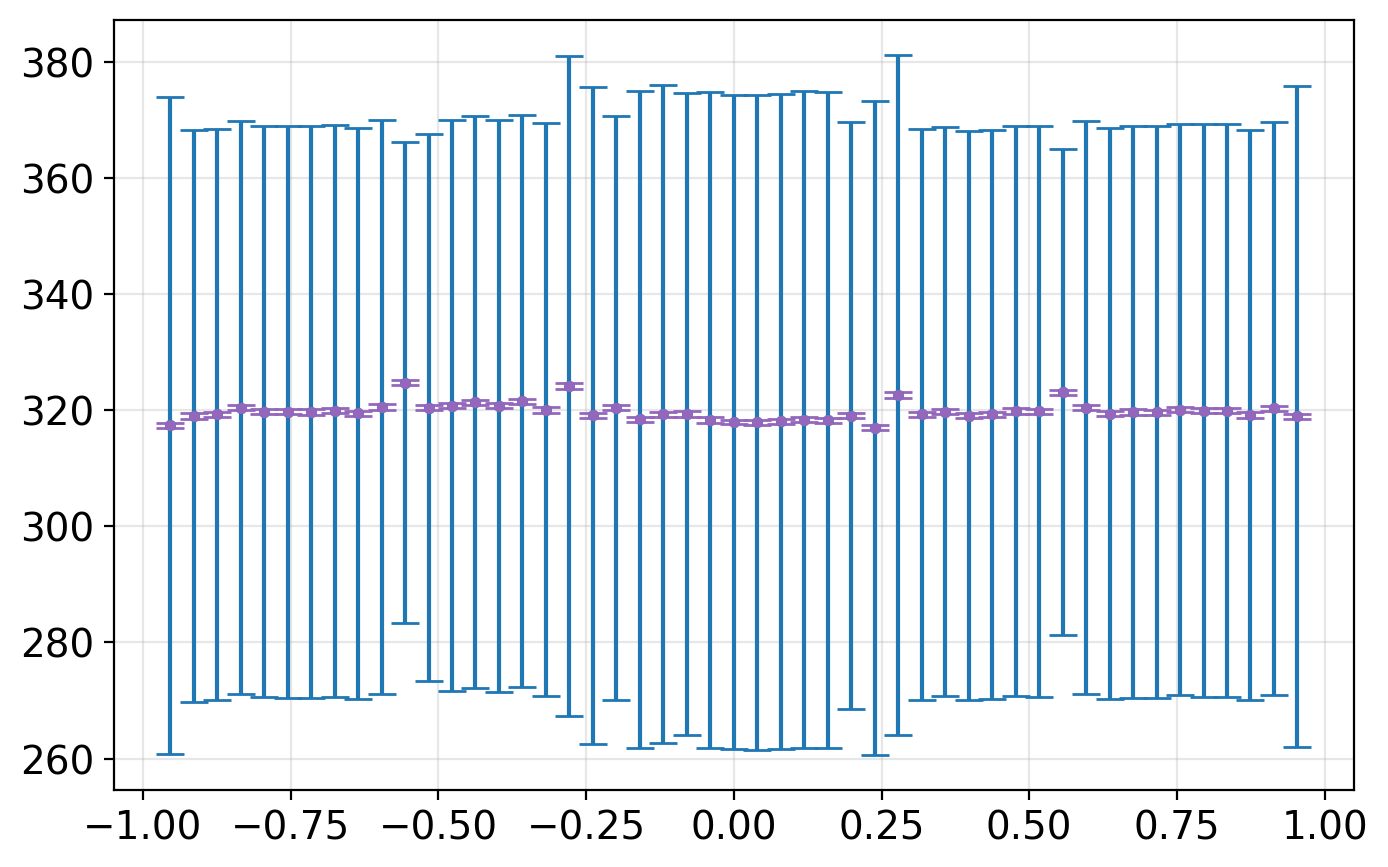

In [133]:
mean_df = data.groupby(['nominal_velocity']).mean()
std_df = data.groupby(['nominal_velocity']).std()
sum_df = data.groupby(['nominal_velocity']).sum()

plt.errorbar(
    -mean_df.index,
    mean_df['count']/mean_df['DAQ_time'],
    yerr=std_df['count']/mean_df['DAQ_time'],
    fmt='.',
    capsize=5
)

plt.errorbar(
    -sum_df.index.values,
    sum_df['count']/sum_df['DAQ_time'],
    yerr=np.sqrt(sum_df['count'])/sum_df['DAQ_time'], 
    fmt='C4.',
    capsize=5
)

plt.show()
    

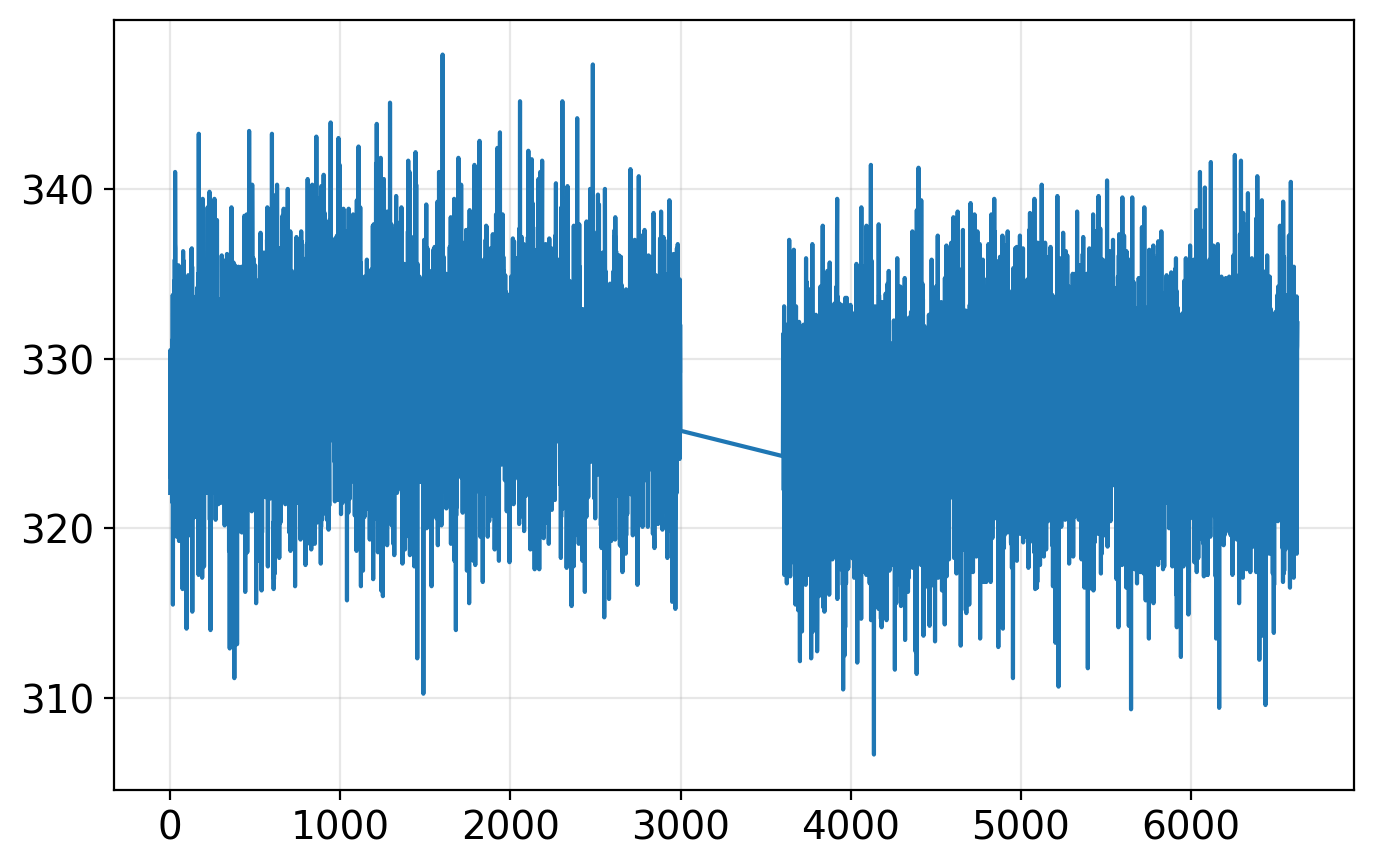

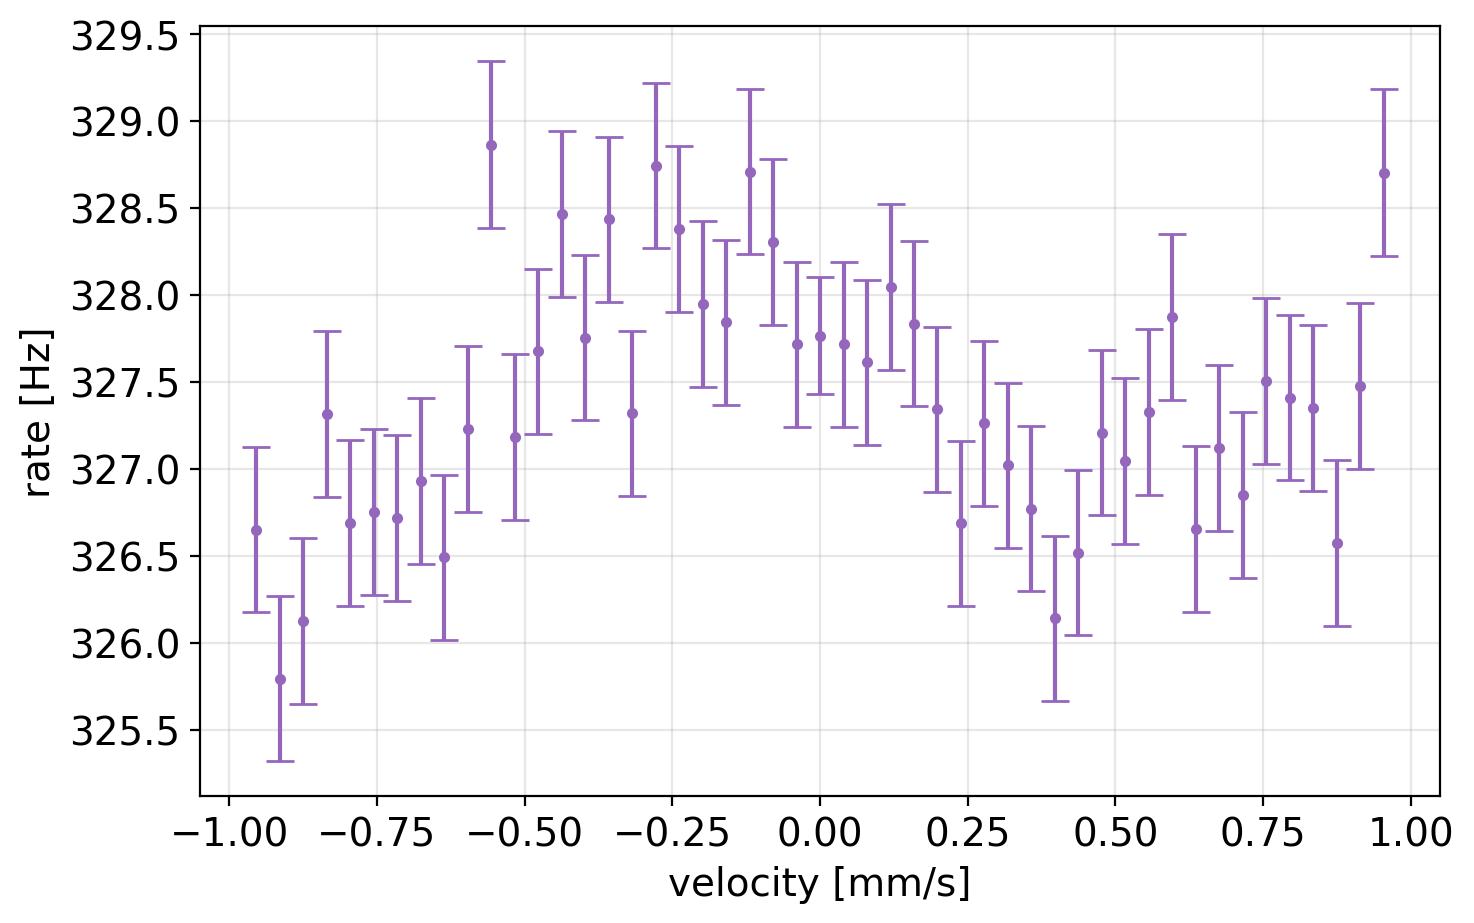

In [134]:
fname = '20230726_scan/Fe0004naked_0.9_mms_25steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[(data.index < 3000) | (data.index > 3600)]
plt.plot(data['count']/data['DAQ_time'])
plt.show()

data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C4.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.show()


## Be 8/1

Index(['count', 'unskimmed_count', 'DAQ_time', 'nominal_velocity', 'frequency',
       'fit_velocity', 'fit_err', 'fit_msr', 'time'],
      dtype='object')


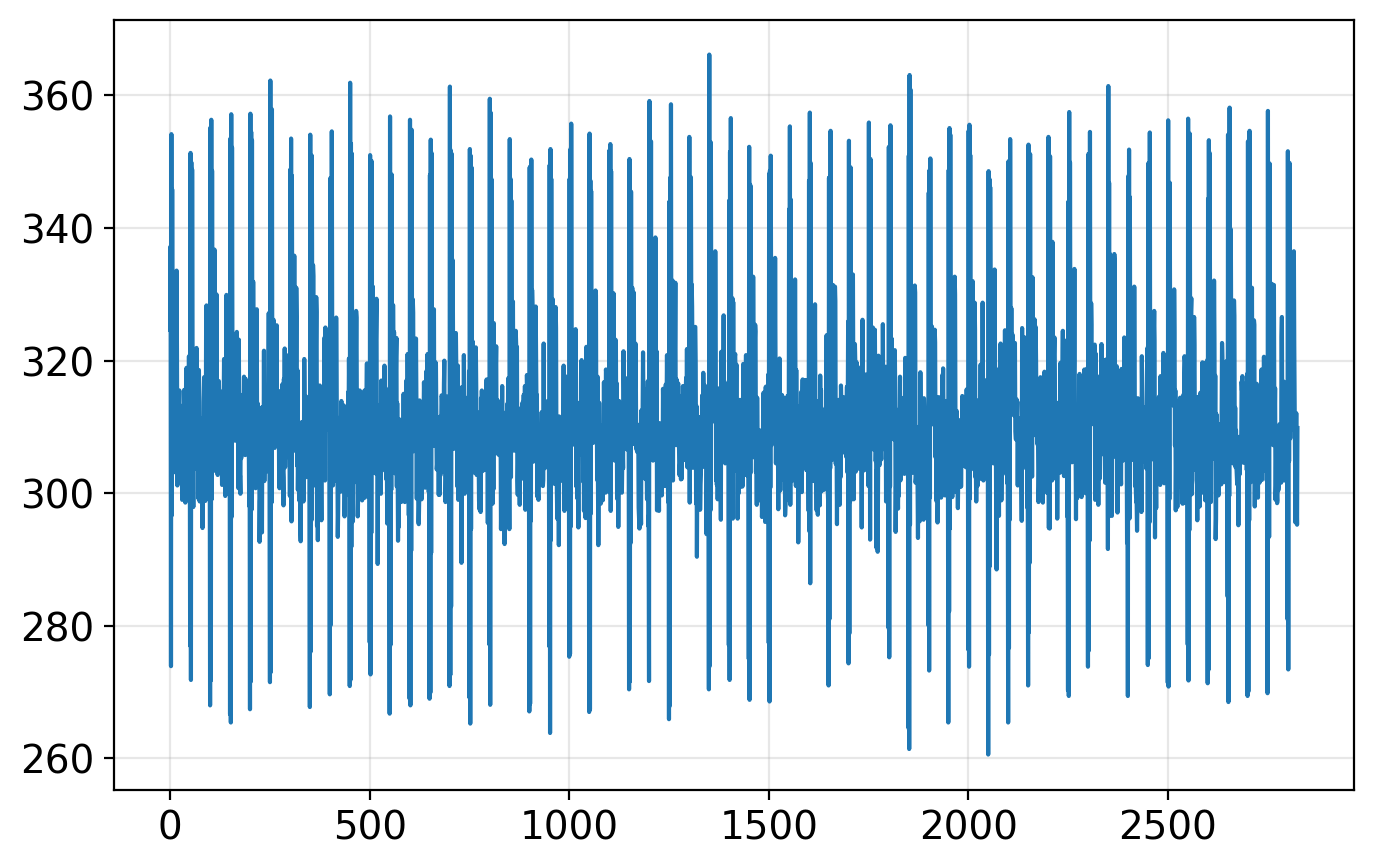

Text(0, 0.5, 'rate [Hz]')

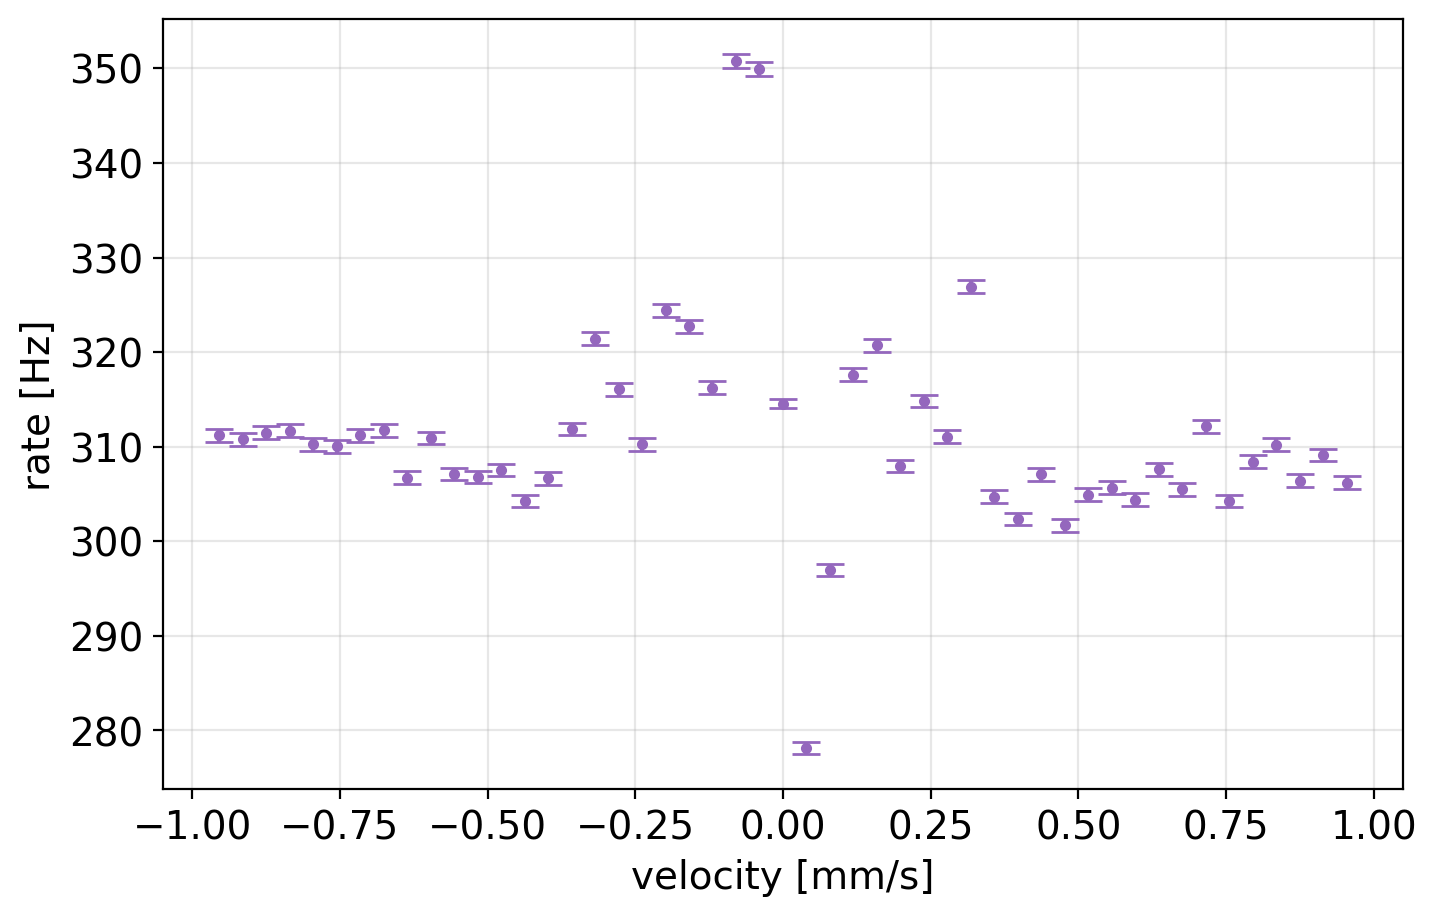

In [228]:
fname = '20230516_scan/BeBlankUnpolished_1_mms_0.05_mms_19in.dat'
fname = '20230801_scan/Be_0.25_mms_2steps_0.6-17in.dat'

data = pd.read_csv(join(datadir, fname))
#data = data[(data.index < 1000)]# | (data.index > 3600)]
print(data.columns)
plt.plot(data['count']/data['DAQ_time'])
plt.show()

data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4
plt.errorbar(
    data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C4.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')

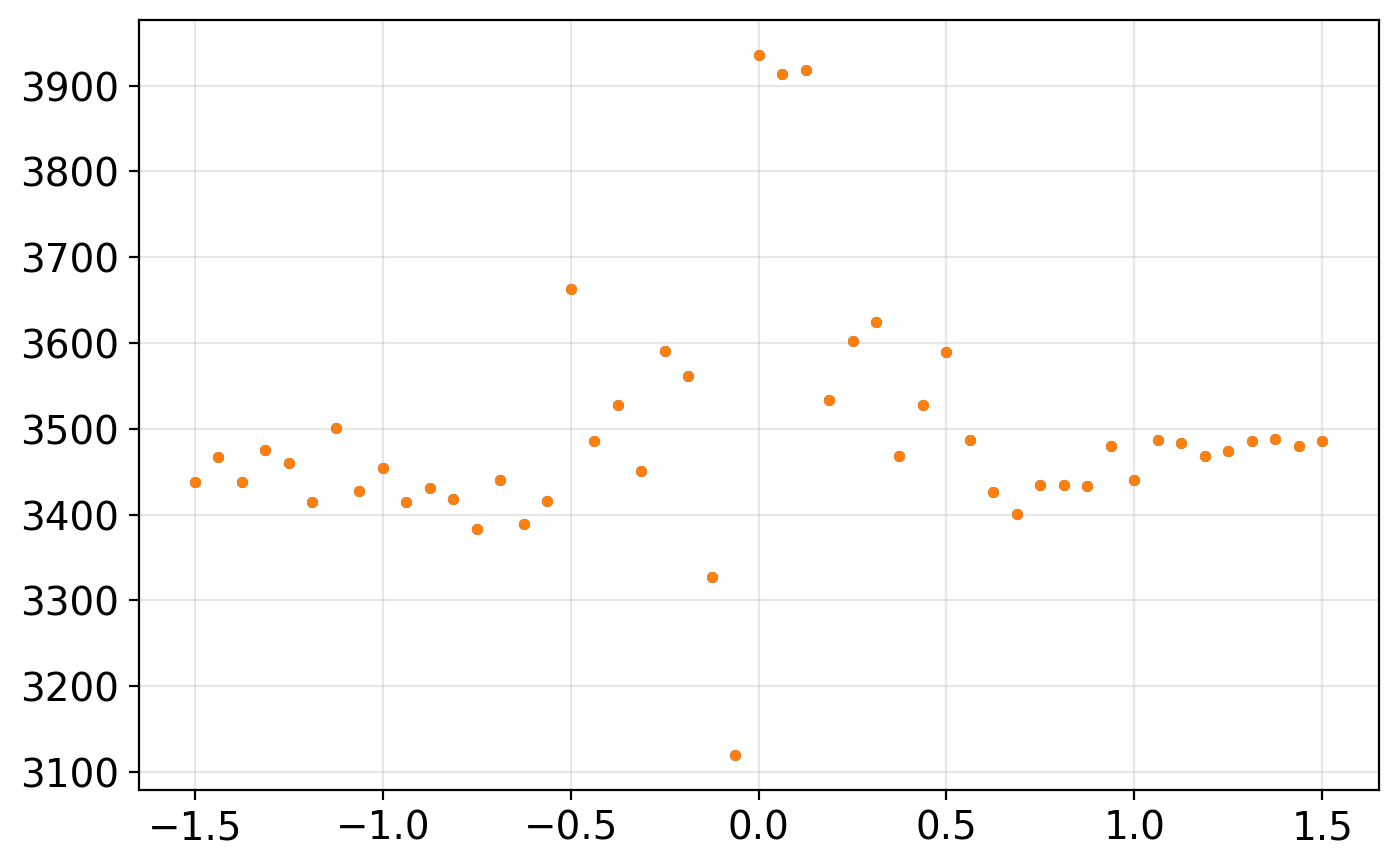

In [241]:
fname = '20230801_scan/Be_0.25_mms_2steps_0.6-17in_avghist_{freq}Hz_Ch{ch}.dat'
frequencies = np.linspace(0, 1.5, 25)
skim = [644, 1106]
skim = [600, 1000]

multiplier = {0: -1, 1: 1}
all_f = np.concatenate((-1*frequencies[::-1], frequencies[1:]), axis=0)
rates = {f: 0 for f in all_f}


for freq in frequencies:
    for ch in (0, 1):
        data = pd.read_csv(join(datadir, fname.format(freq=freq, ch=ch)), header=None)[0].values
        rates[freq*multiplier[ch]] = data[skim[0]:skim[1]].sum()
plt.plot(all_f, rates.values(), '.')


skim = [600, 1000]
for freq in frequencies:
    for ch in (0, 1):
        data = pd.read_csv(join(datadir, fname.format(freq=freq, ch=ch)), header=None)[0].values
        rates[freq*multiplier[ch]] = data[skim[0]:skim[1]].sum()
plt.plot(all_f, rates.values(), '.')


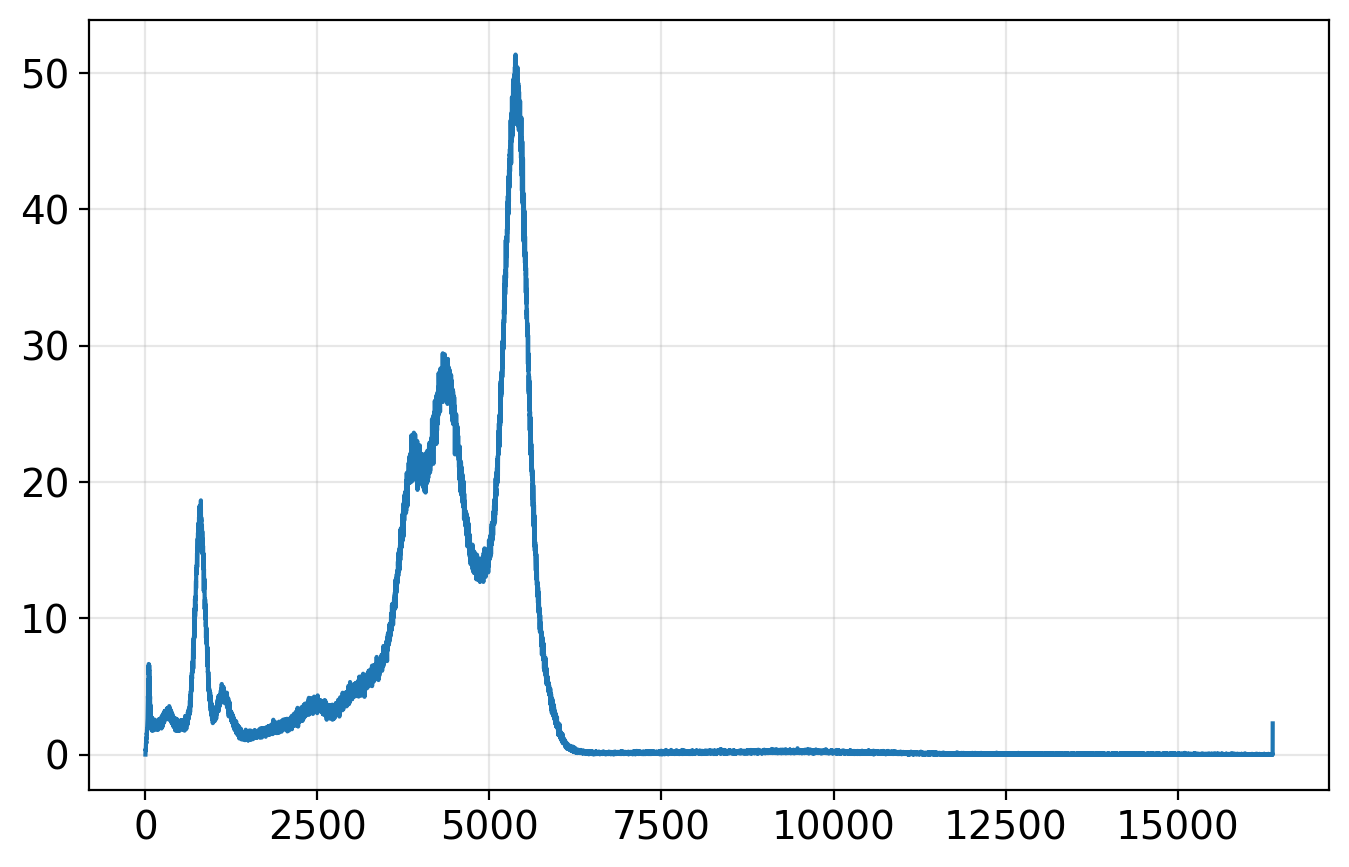

In [242]:

#skim = [644, 1106]
skim = [600, 1000]
plt.plot(data)

Index(['nom_vel', 'vel', 'msr', 'count', 'seconds'], dtype='object')


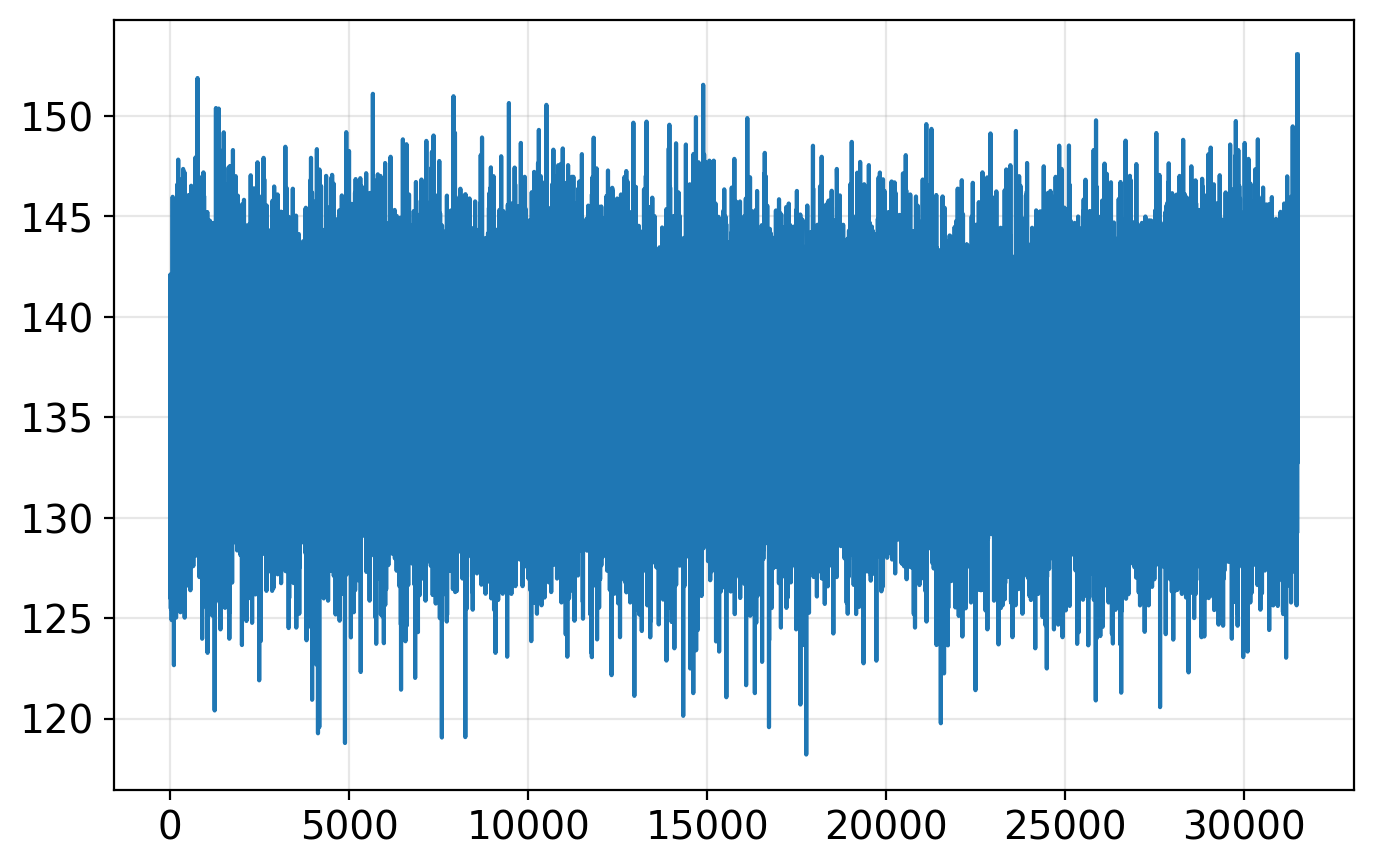

Text(0, 0.5, 'rate [Hz]')

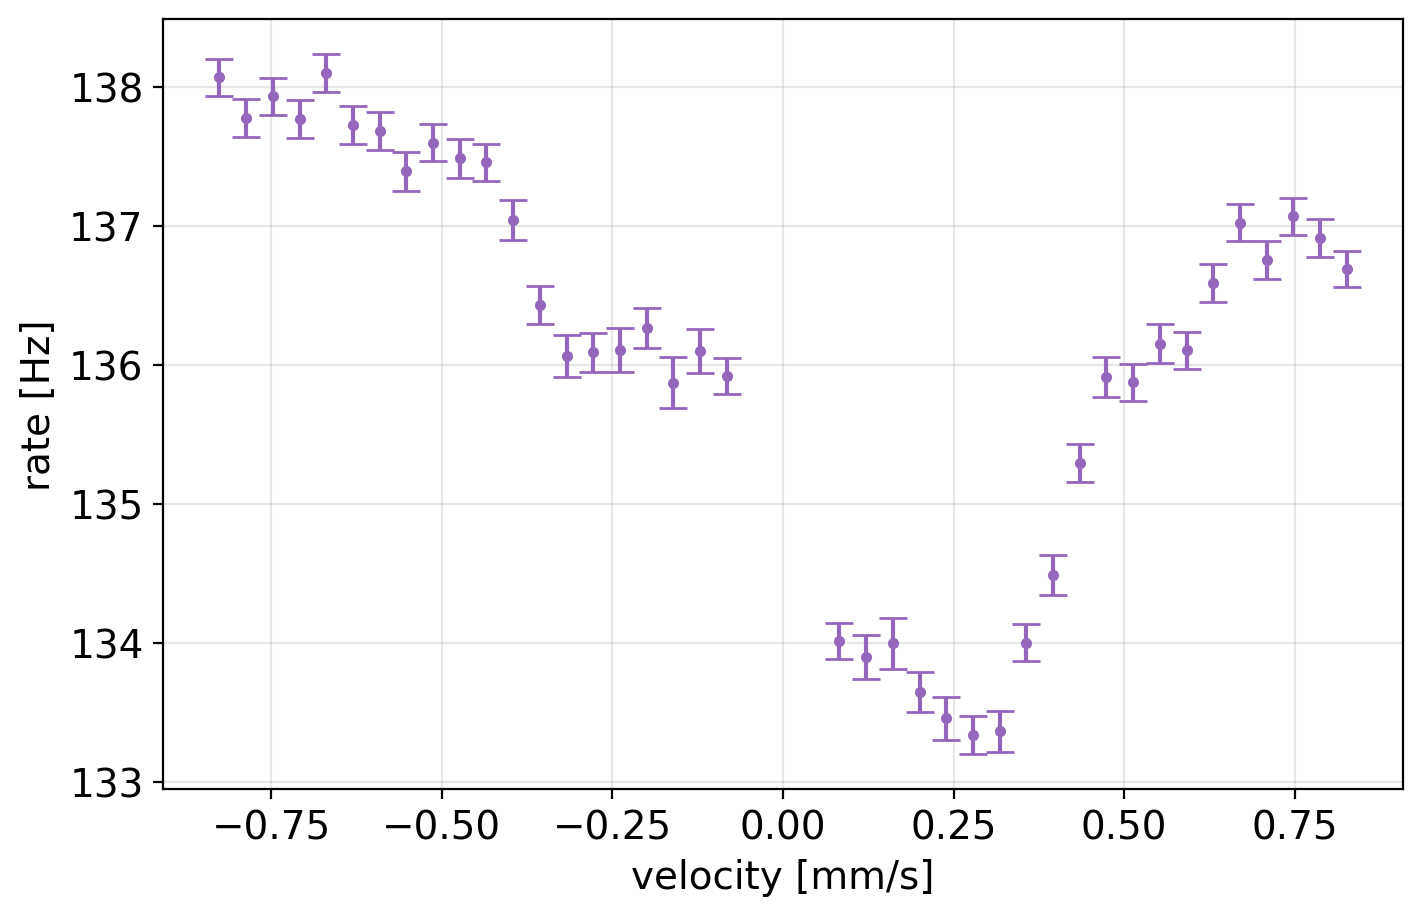

In [178]:
fname = '20230516_scan/BeBlankUnpolished_1_mms_0.05_mms_19in.dat'
data = pd.read_csv(join(datadir, fname), delimiter='\t')
#data = data[(data.index < 1000)]# | (data.index > 3600)]
print(data.columns)
plt.plot(data['count']/data['seconds'])
plt.show()

data = data.groupby(['nom_vel']).sum()
rates = data['count']/data['seconds']
rates[data.index>0] -= 0.4
plt.errorbar(
    data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C4.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')

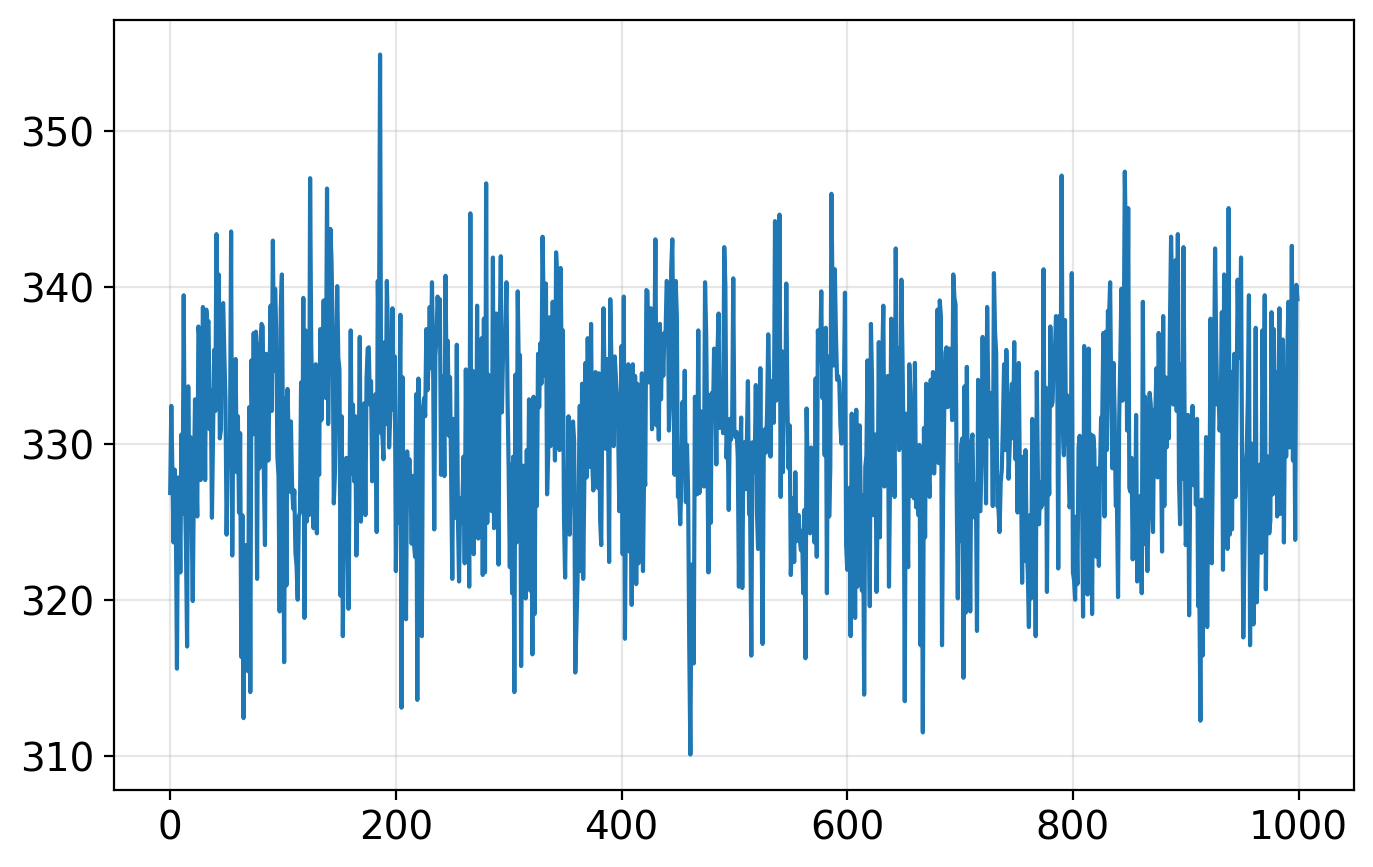

Text(0, 0.5, 'rate [Hz]')

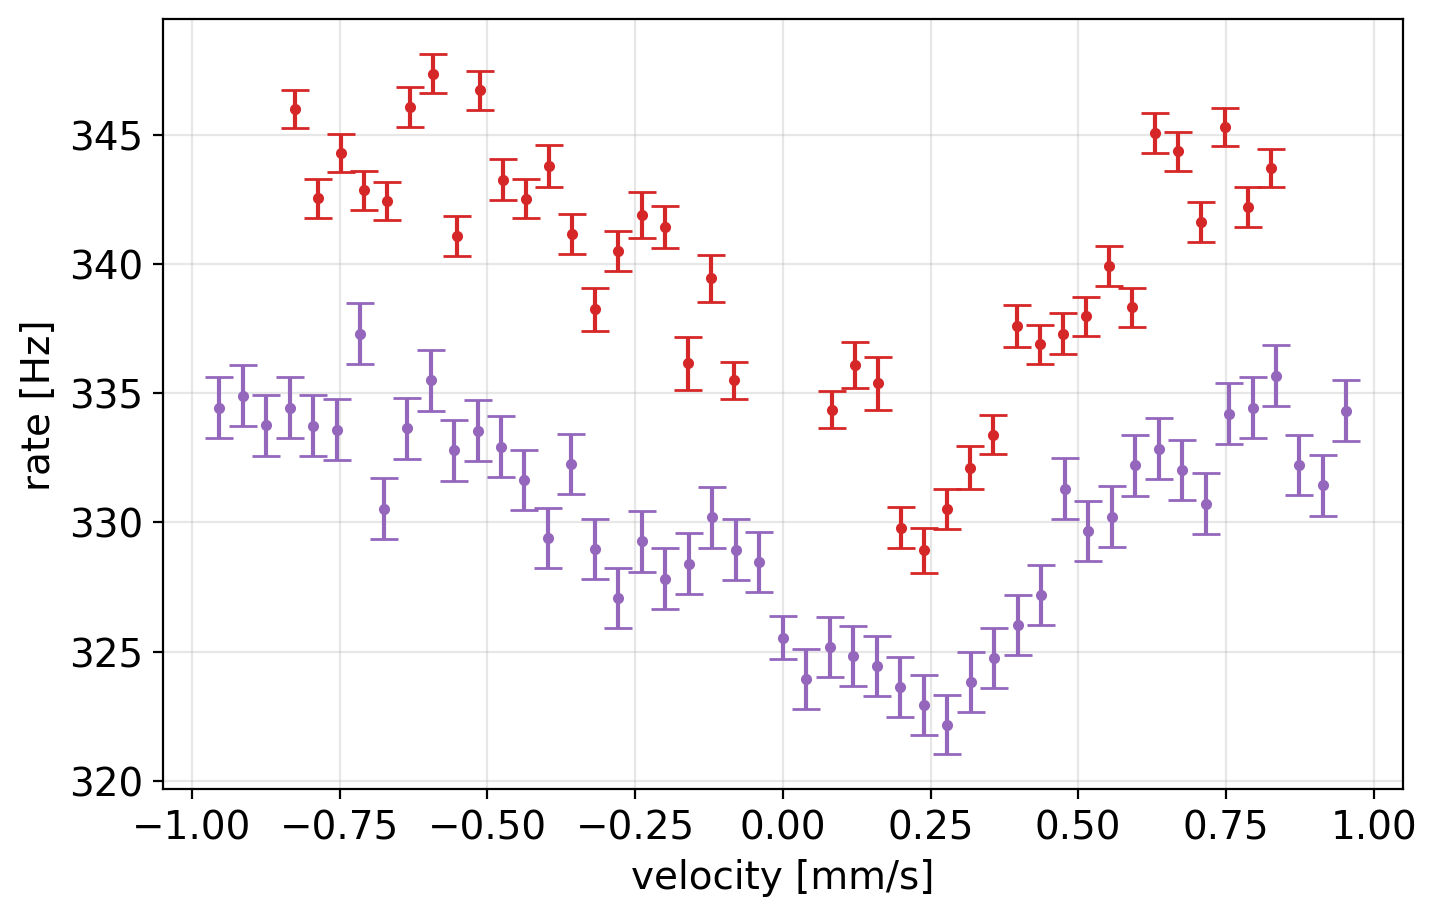

In [307]:
fname = '20230802_scan/Be_0.9_mms_25steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[(data.index < 1000)]# | (data.index > 3600)]
plt.plot(data['count']/data['DAQ_time'])
plt.show()

data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C4.',
    capsize=5
)



fname = '20230516_scan/BeBlankUnpolished_1_mms_0.05_mms_19in.dat'
data = pd.read_csv(join(datadir, fname), delimiter='\t')
data = data[(data.index < 1000)]# | (data.index > 3600)]

data = data.groupby(['nom_vel']).sum()
rates = data['count']/data['seconds']
rates[data.index>0] -= 0.4
plt.errorbar(
    data.index.values,
    2*(19/17)**2*rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C3.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')

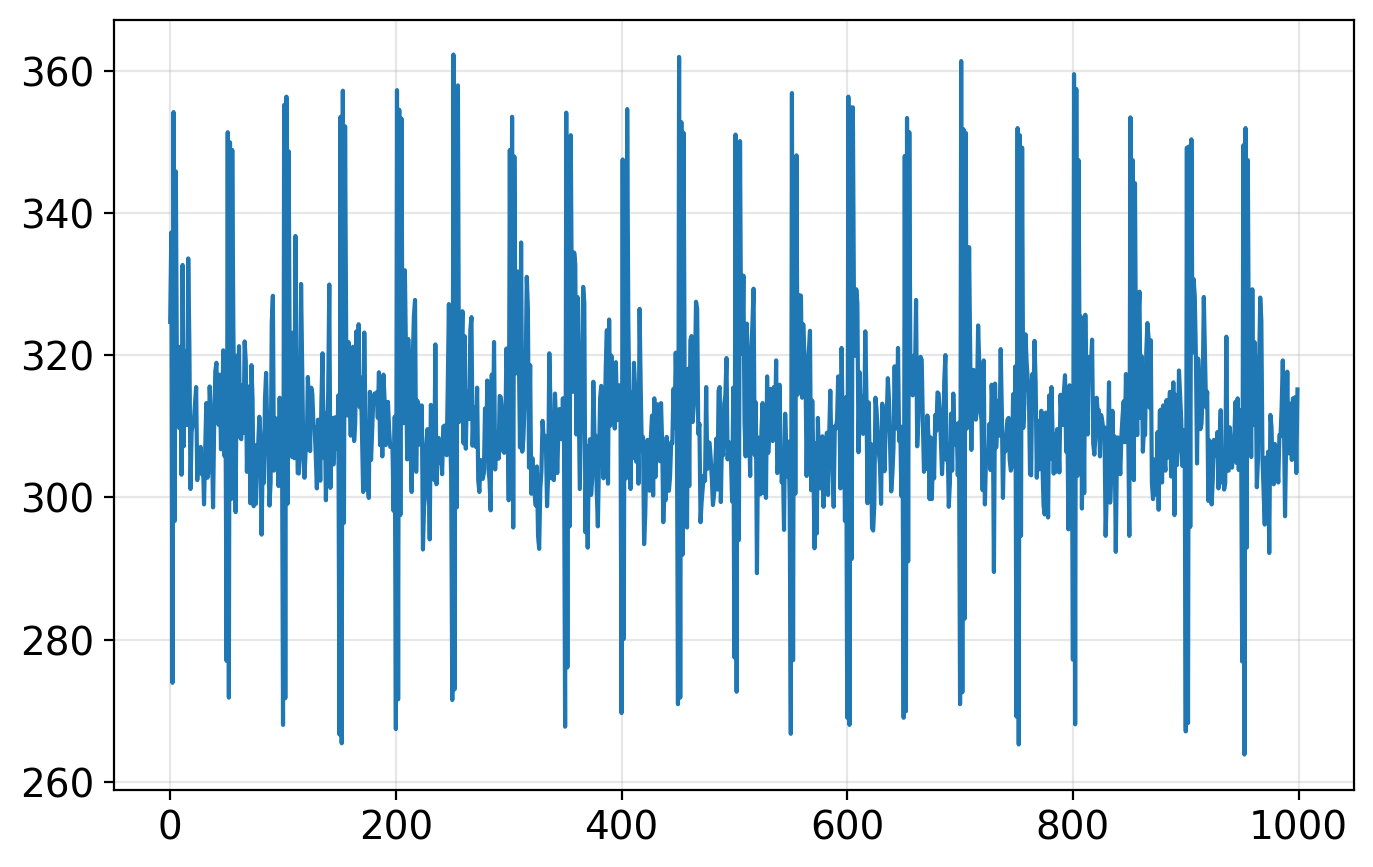

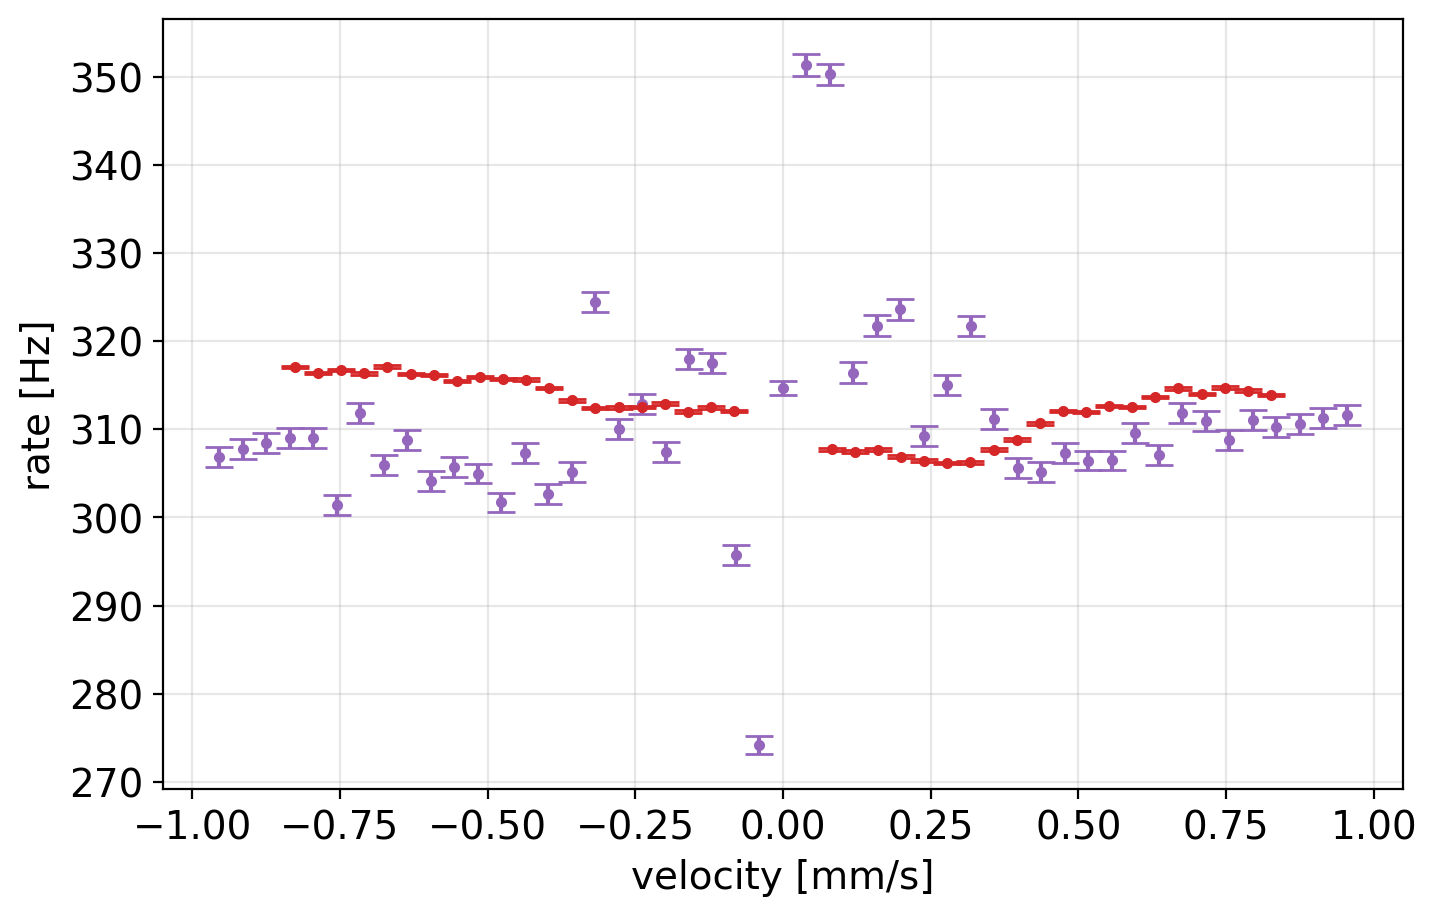

In [218]:
fname = '20230801_scan/Be_0.25_mms_2steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[(data.index < 1000)]# | (data.index > 3600)]
plt.plot(data['count']/data['DAQ_time'])
plt.show()

data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C4.',
    capsize=5
)



fname = '20230516_scan/BeBlankUnpolished_1_mms_0.05_mms_19in.dat'
data = pd.read_csv(join(datadir, fname), delimiter='\t')
#data = data[(data.index < 1000)]# | (data.index > 3600)]

data = data.groupby(['nom_vel']).sum()
rates = data['count']/data['seconds']
rates[data.index>0] -= 0.4
plt.errorbar(
    data.index.values,
    rates*310/135,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C3.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')


plt.show()
 

### FeCy twopoints

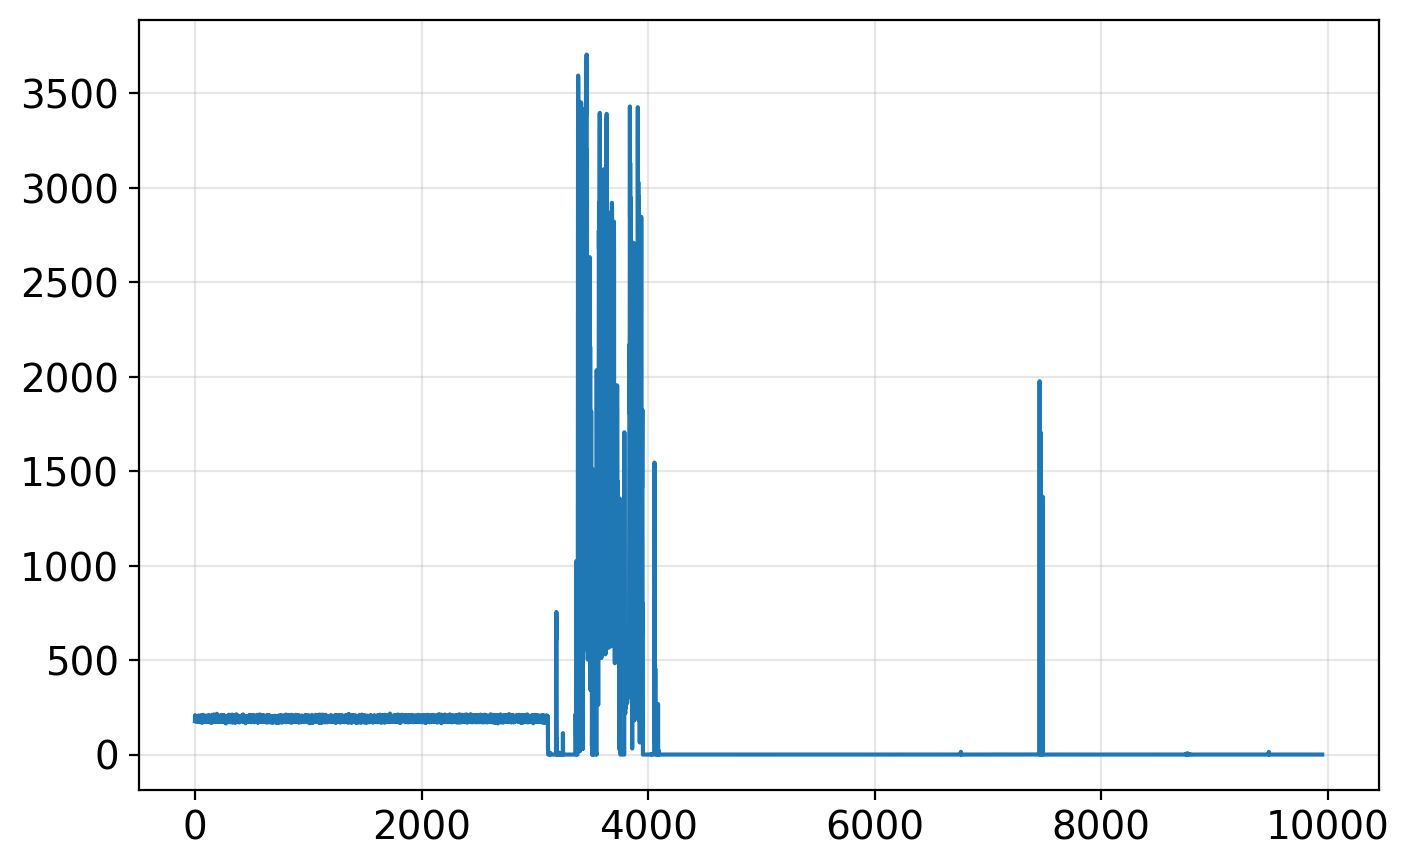

In [140]:
fname = '20230728_scan/FeCy_0.25_mms_2steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
plt.plot(data['count']/data['DAQ_time'])
plt.show()

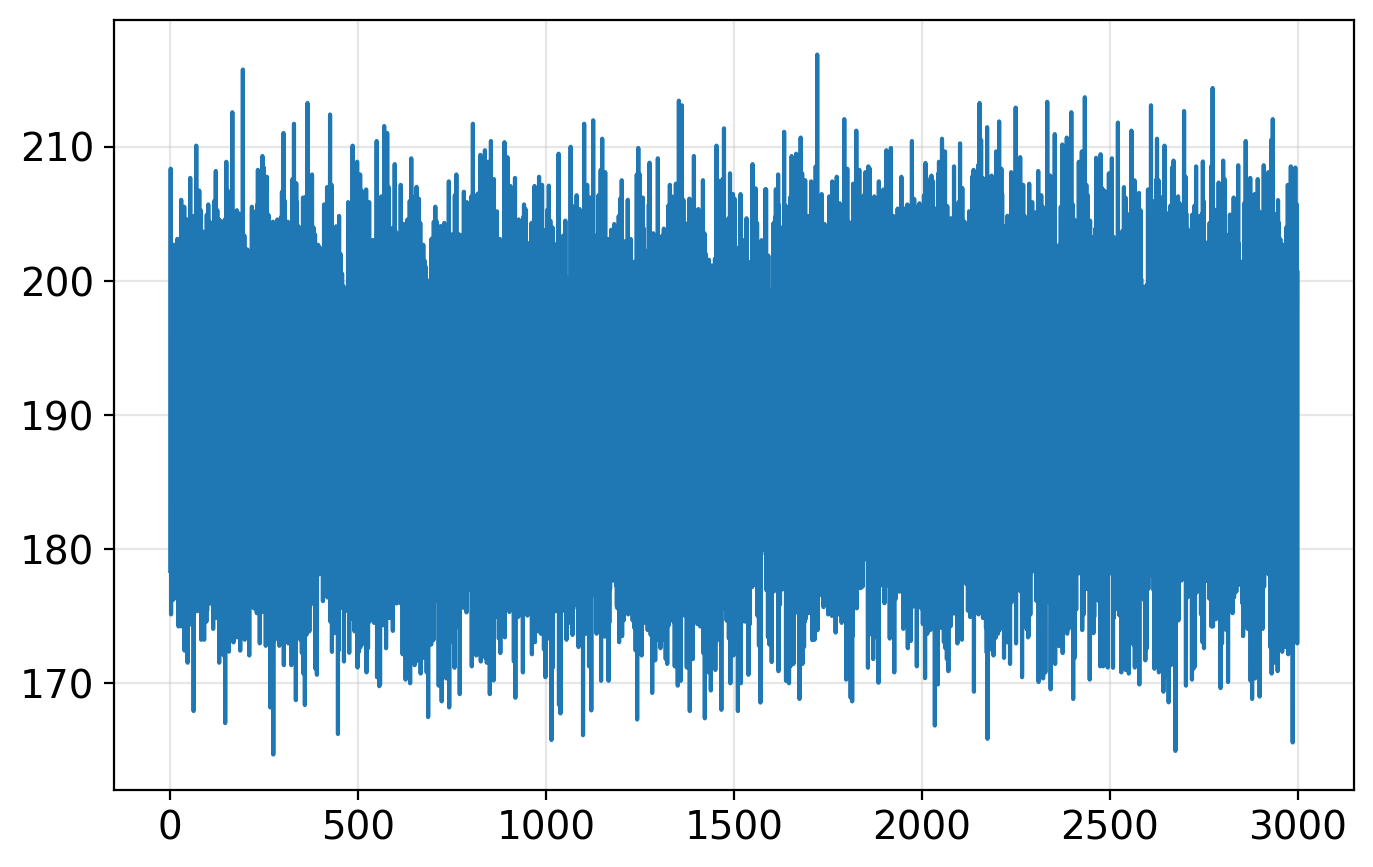

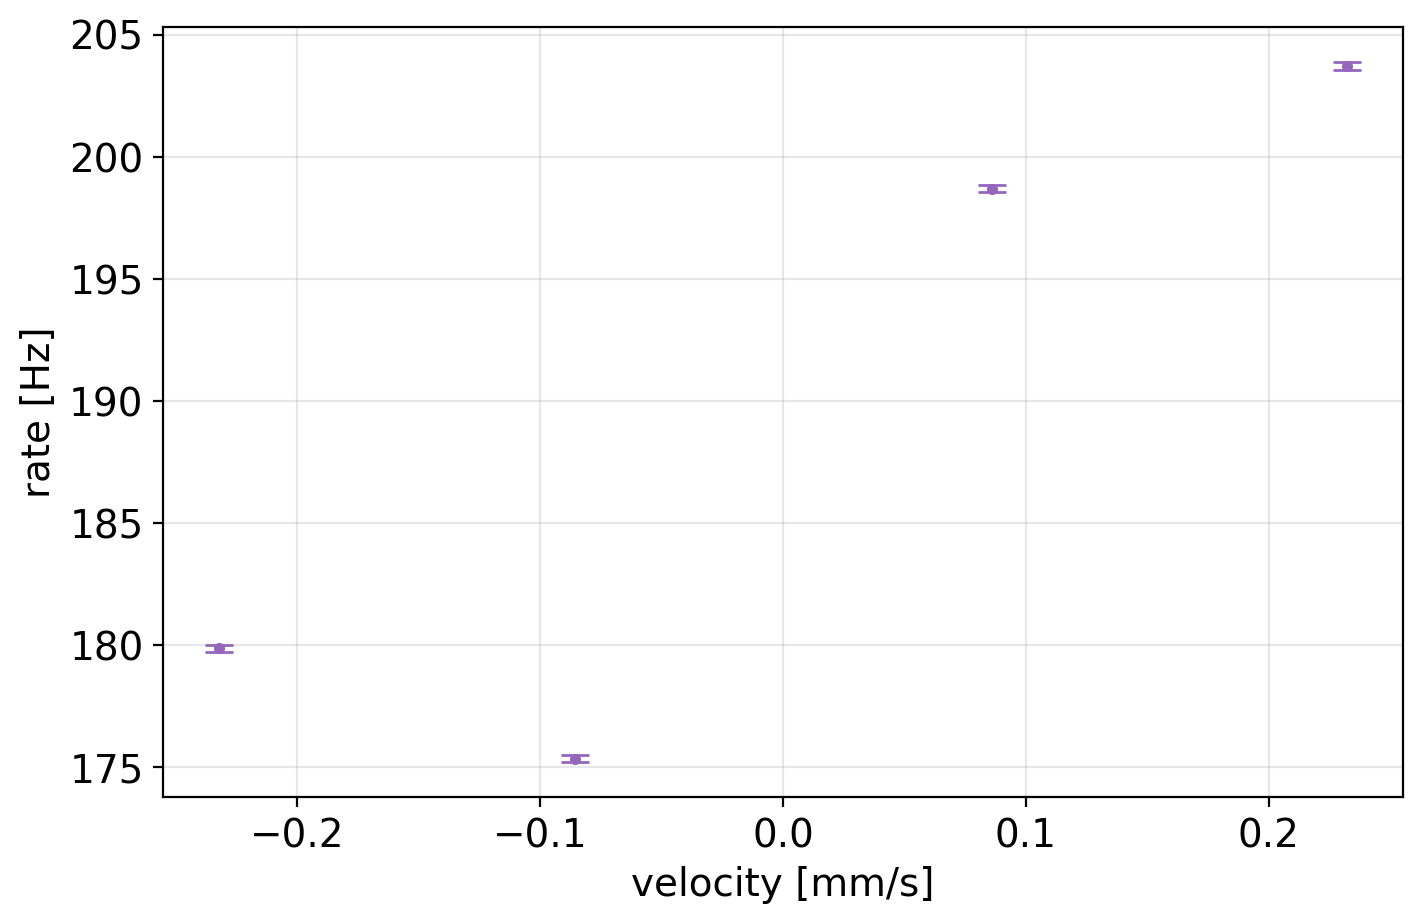

In [138]:
fname = '20230728_scan/FeCy_0.25_mms_2steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[(data.index < 3000)]# | (data.index > 3600)]
plt.plot(data['count']/data['DAQ_time'])
plt.show()

data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C4.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.show()


In [144]:
data.nominal_velocity.unique()

array([ 0.23214, -0.23214,  0.08586, -0.08586])

In [151]:
from scipy.ndimage import gaussian_filter

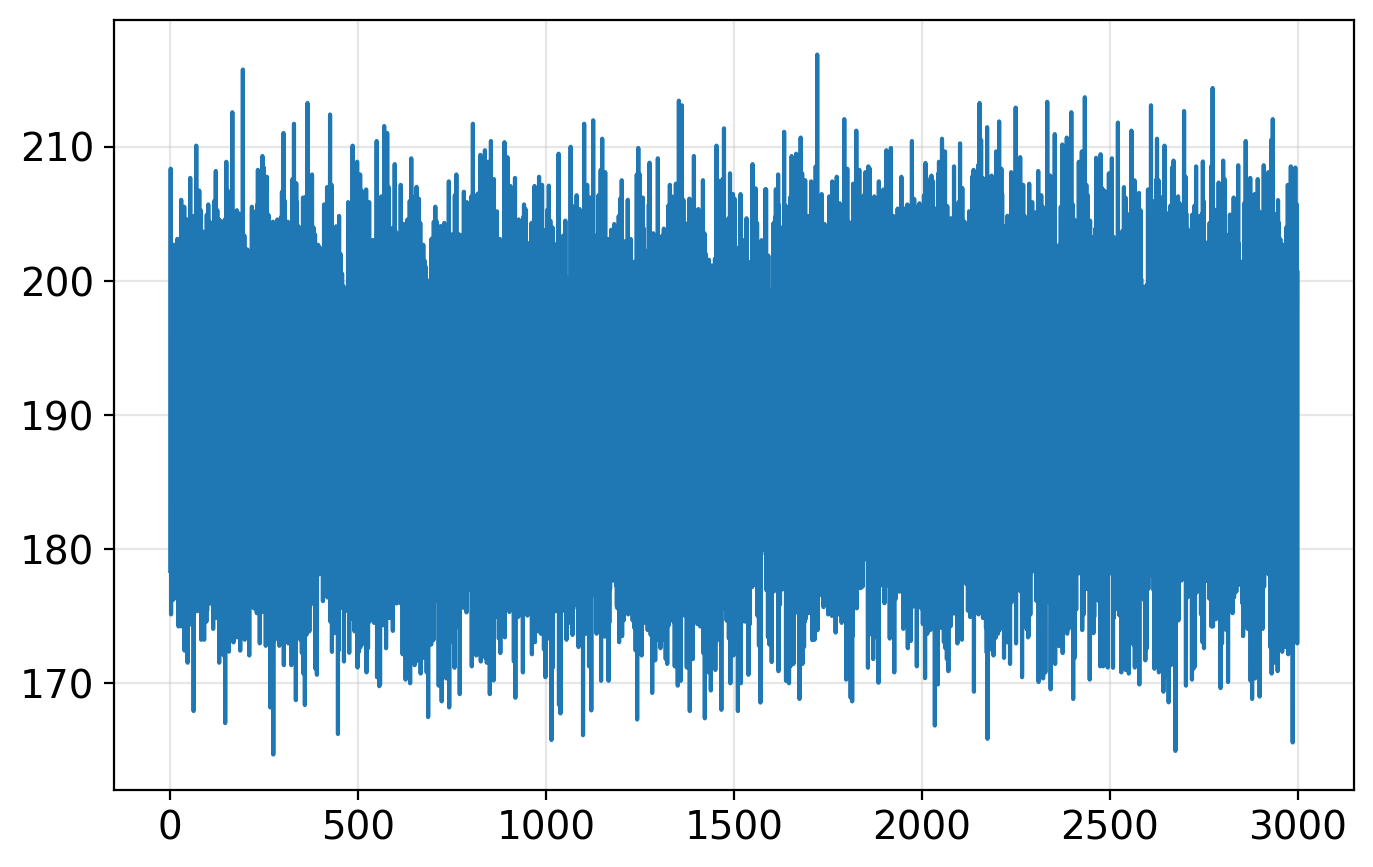

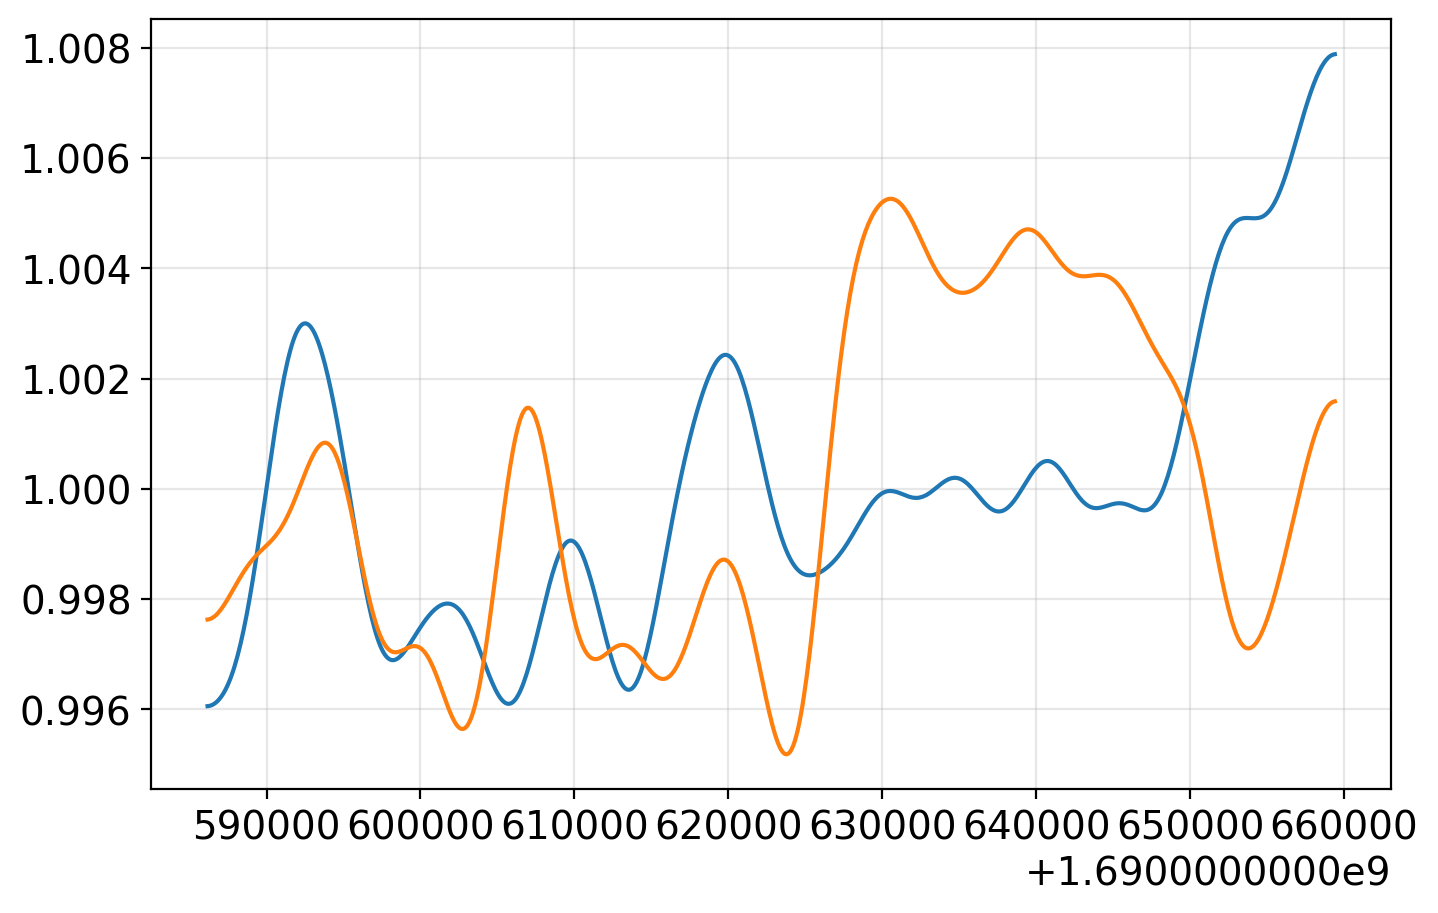

In [162]:
fname = '20230728_scan/FeCy_0.25_mms_2steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[(data.index < 3000)]# | (data.index > 3600)]
plt.plot(data['count']/data['DAQ_time'])
plt.show()

for i in (0, 1):
    cut_df = data[data.nominal_velocity==data.nominal_velocity.unique()[i]]

    plt.plot(cut_df['time'], gaussian_filter(cut_df['count']/cut_df['count'].mean(), 20))
plt.show()

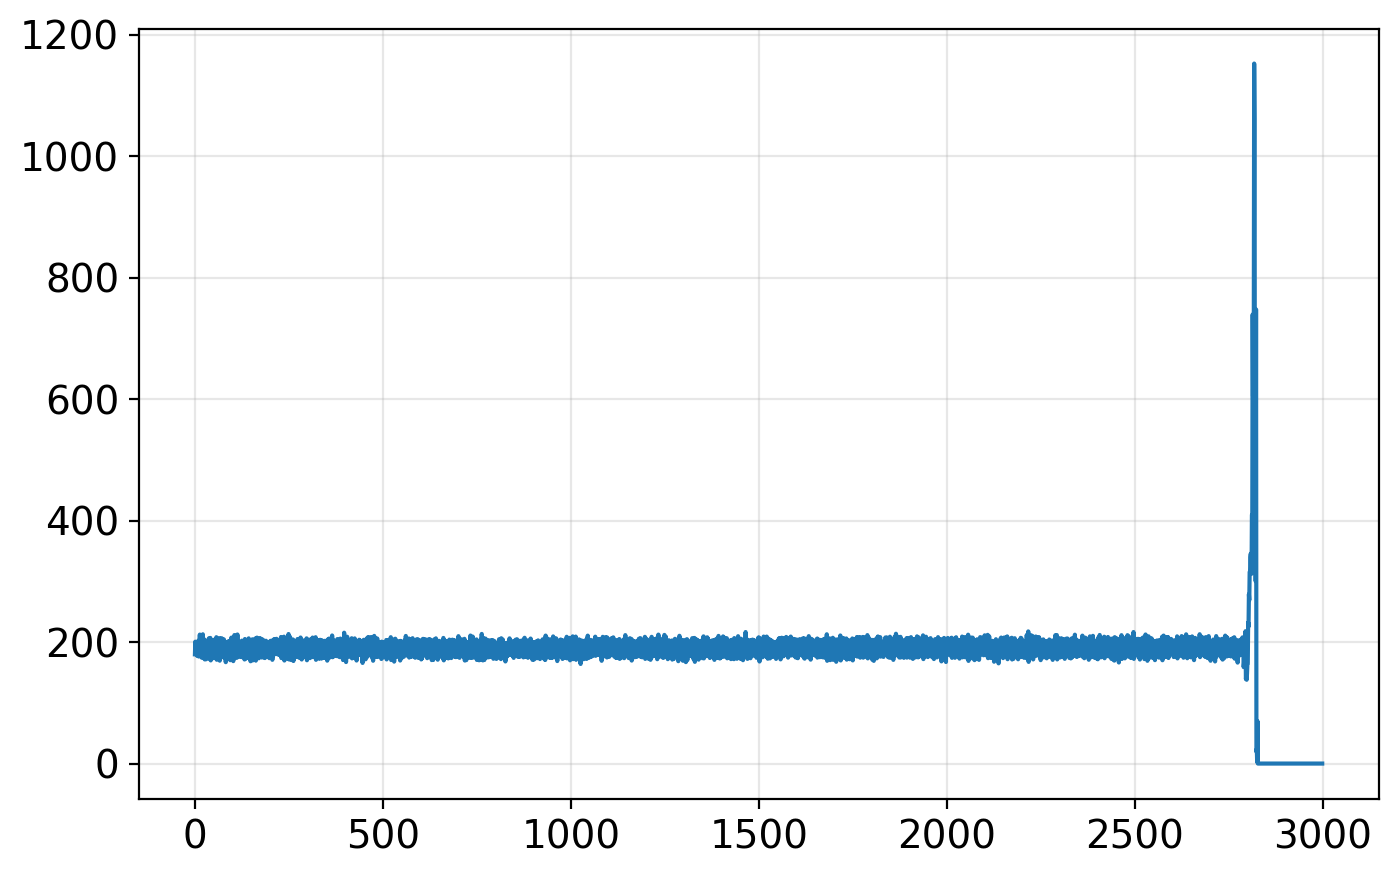

In [142]:
fname = '20230731_scan/FeCy_0.25_mms_2steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[(data.index < 3000)]# | (data.index > 3600)]
plt.plot(data['count']/data['DAQ_time'])
plt.show()



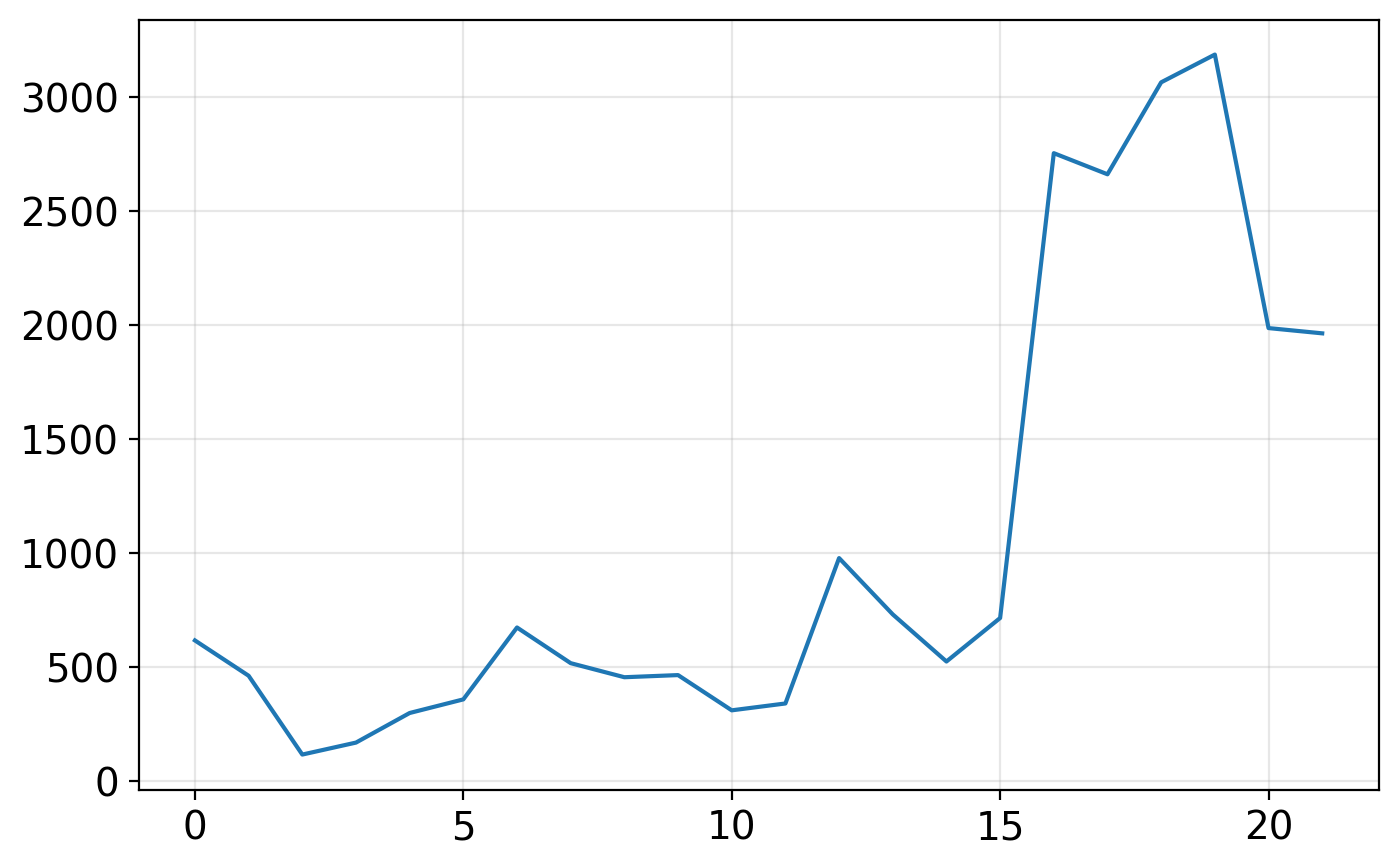

In [143]:
fname = '20230801_scan/FeCy_0.25_mms_2steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[(data.index < 3000)]# | (data.index > 3600)]
plt.plot(data['count']/data['DAQ_time'])
plt.show()



## FeCy 7/24

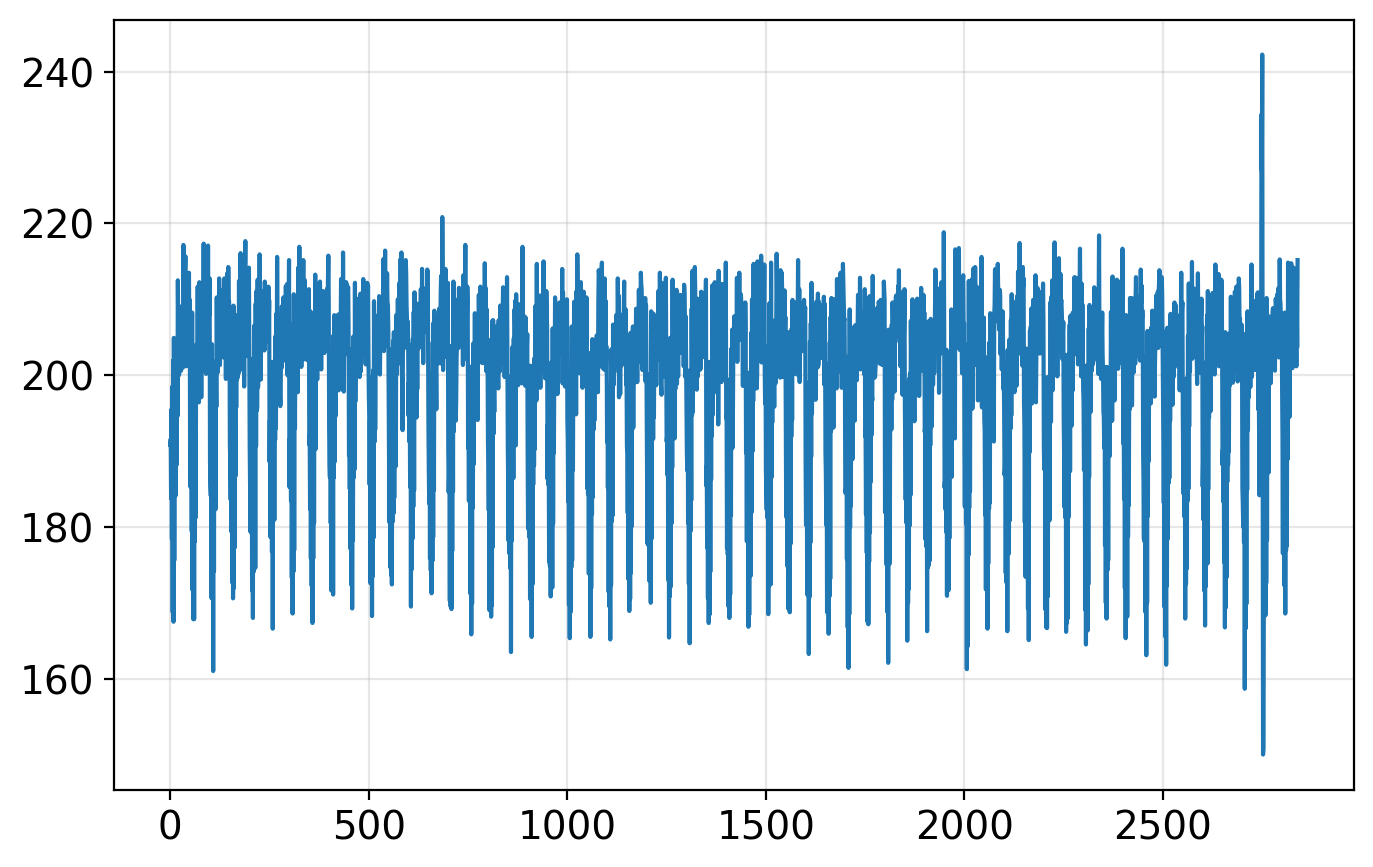

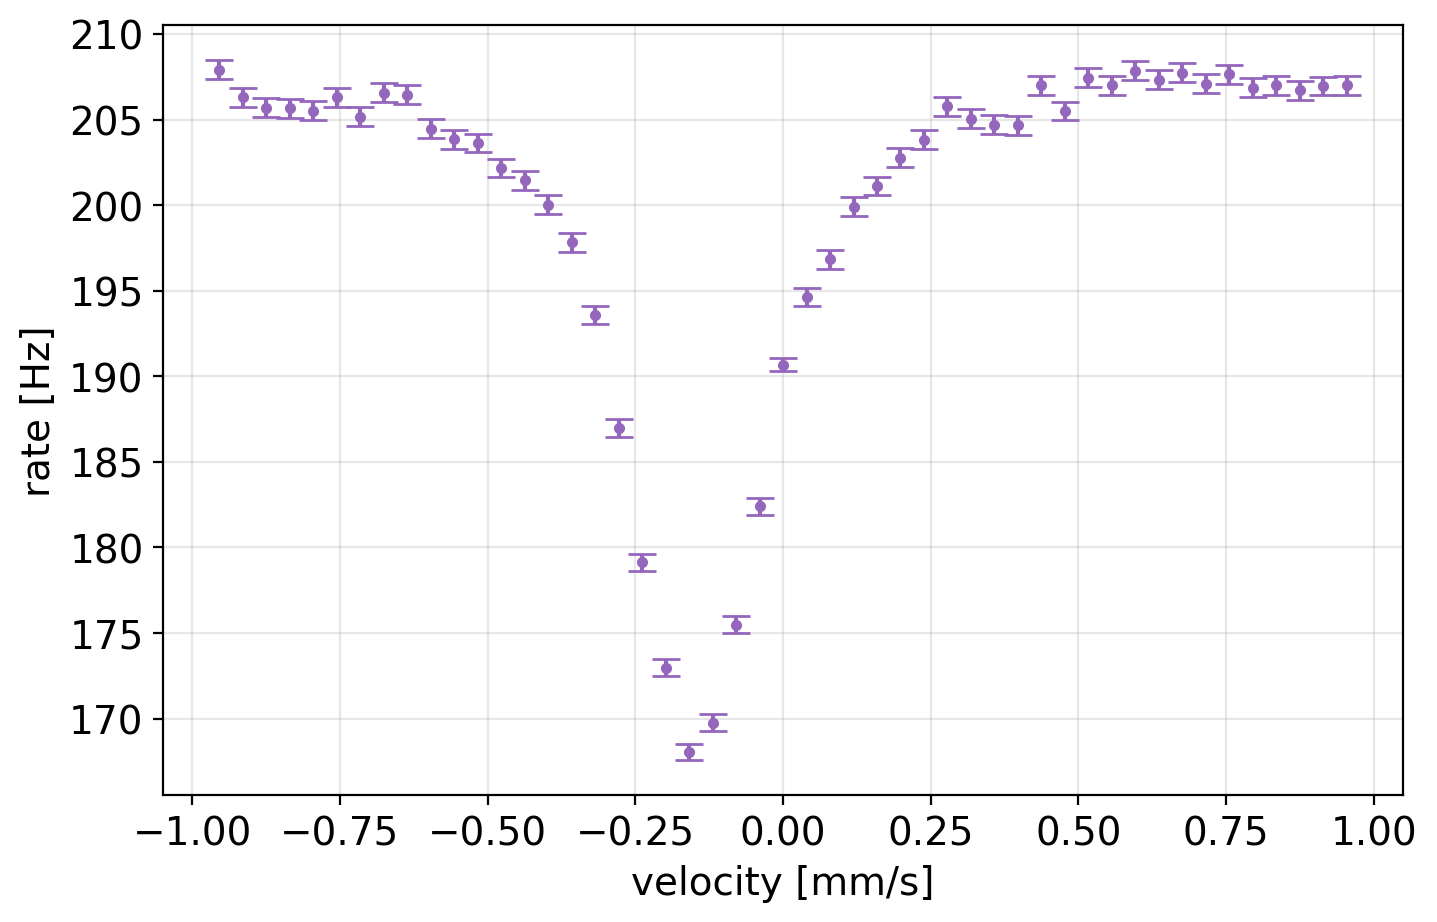

In [11]:
fname = '20230724_scan/FeCye_0.9_mms_25steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
plt.plot(data['count']/data['DAQ_time'])
plt.show()

data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C4.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.show()


In [12]:
473*.65 + 135

442.45

{'date': '20230721'}
322.34189309541085


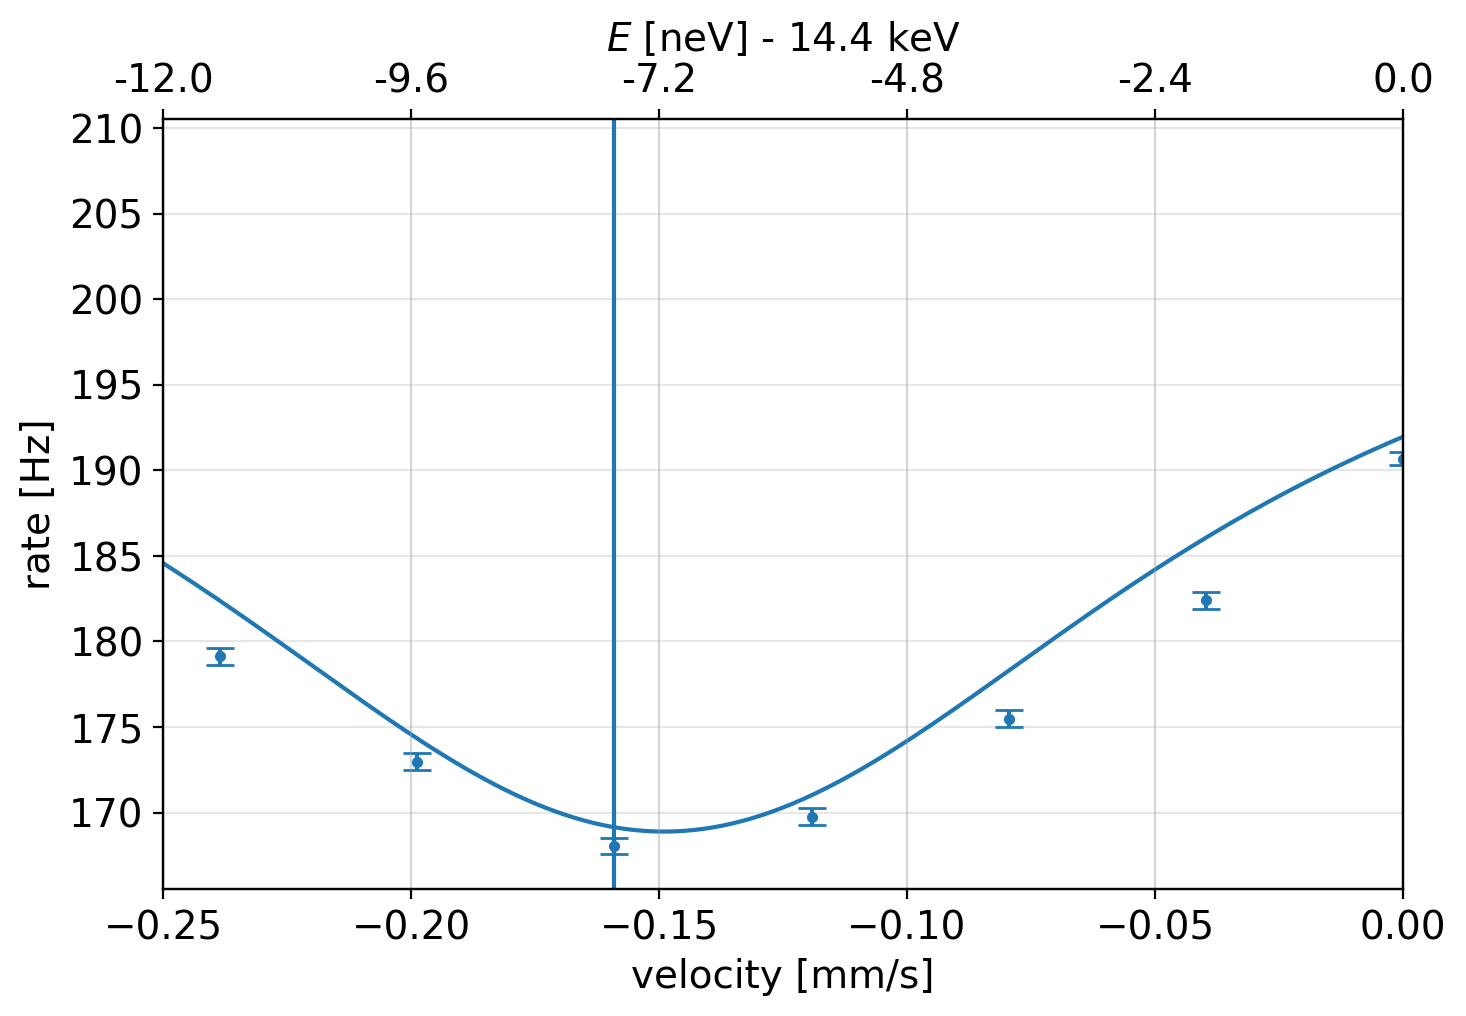

In [13]:
source = CobaltRhodiumMatrix(date='20230721')

absorber = PotassiumFerrocyanide()

fig, ax = plt.subplots(1, 1)

### measurement parameters
detector_face_OD = 1.75 * 25.4  # mm
detector_distance = 17 * 25.4  # mm
measurement_parameters = dict(
    solid_angle_fraction=(detector_face_OD**2)/(16*detector_distance**2),
    #background_rate=109.0,
    #detection_efficiency=0.56  * (31521/43245) * 473/665 * 0.9,  # Be window * cardboard * empirical source rate difference (from background fits)
    background_rate=135.0,
    detection_efficiency=0.56  * (31521/43245) * (473/665 * 0.65),  # Be window * cardboard * empirical source rate difference (from background fits)
)
moss_fecy = mossbauer.MossbauerMeasurement(source, absorber, measurement_parameters)

print((source.total_activity*moss_fecy.detection_efficiency*moss_fecy.solid_angle_fraction) + moss_fecy.background_rate)

vel = np.linspace(-1, 1, 1000)
plt.plot(vel, moss_fecy.transmitted_spectrum(vel), color='C0')
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C0.',
    capsize=5
)

plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.xlim([-.25, 0])
plt.axvline(-0.121 - 0.038)
mossbauer.add_energy_axis(ax)
if False:
    plt.savefig('../plots/FeCy_25steps_20230724_fit.png')
plt.show()

## Plot both

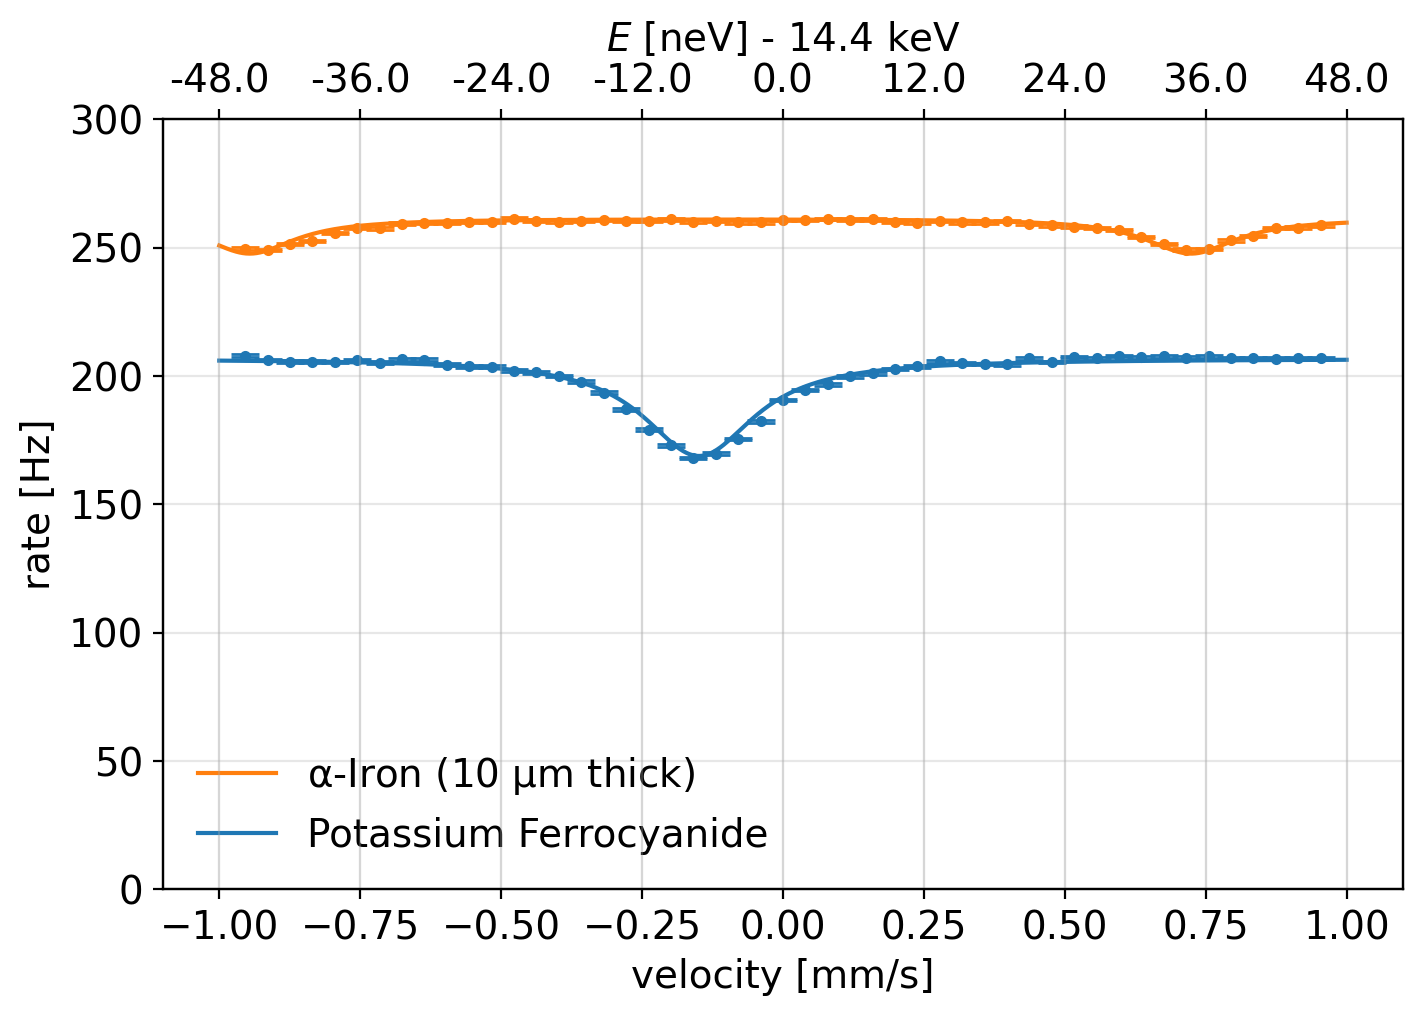

In [14]:
fname = '20230721_scan/Fe0004_0.9_mms_25steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[300:5000]

#data = data[data['count'] > 2]
data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4

fig, ax = plt.subplots(1,1)

plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C1.',
    capsize=5
)

vel = np.linspace(-1, 1, 1000)
plt.plot(vel, moss_thinalpha.transmitted_spectrum(vel), color='C1', label=r'$\mathrm{\alpha}$-Iron (10 $\mathrm{\mu}$m thick)')



fname = '20230724_scan/FeCye_0.9_mms_25steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))

data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']
rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='C0.',
    capsize=5
)

plt.plot(vel, moss_fecy.transmitted_spectrum(vel), color='C0', label='Potassium Ferrocyanide')

plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.legend()
mossbauer.add_energy_axis(ax)

plt.savefig('../plots/combined_Fe0004_20230721_FeCy_20230724_zerosuppressed_fit.png')

plt.ylim([0, 300])
plt.savefig('../plots/combined_Fe0004_20230721_FeCy_20230724_fit.png')

plt.show()

### compares error from poisson definition with sigma(counts)/root(N_measurements). 

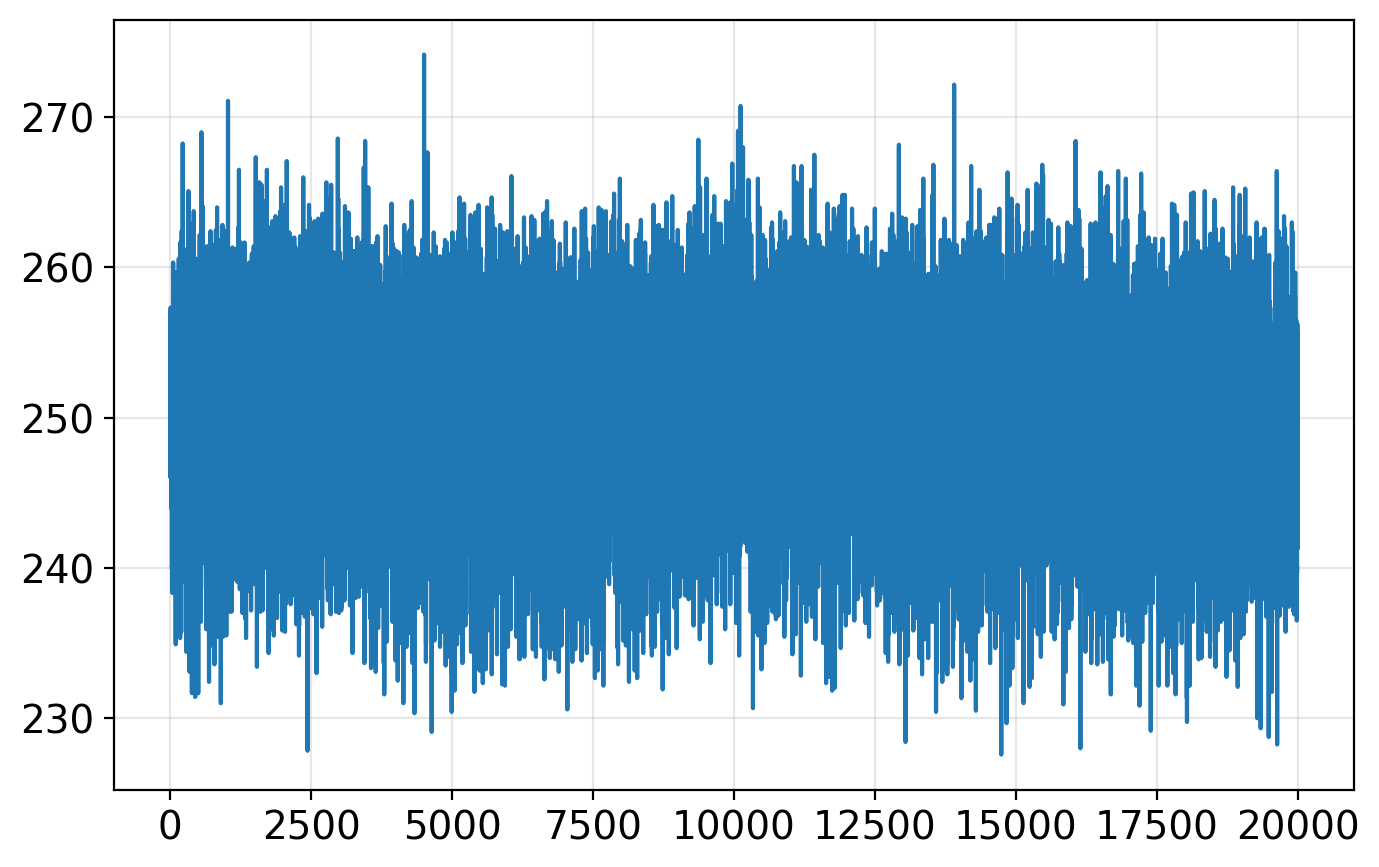

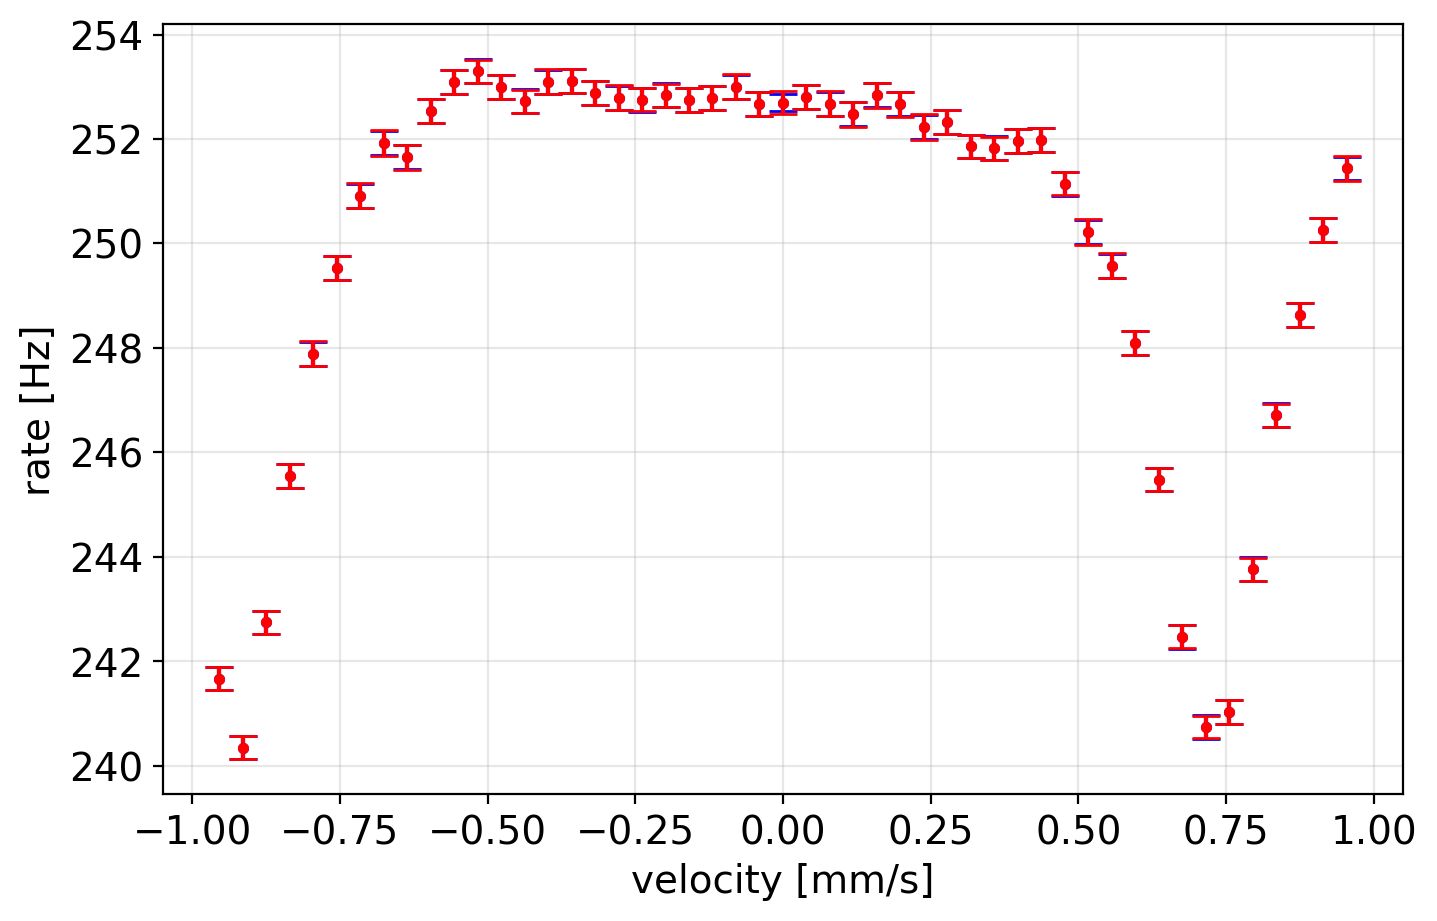

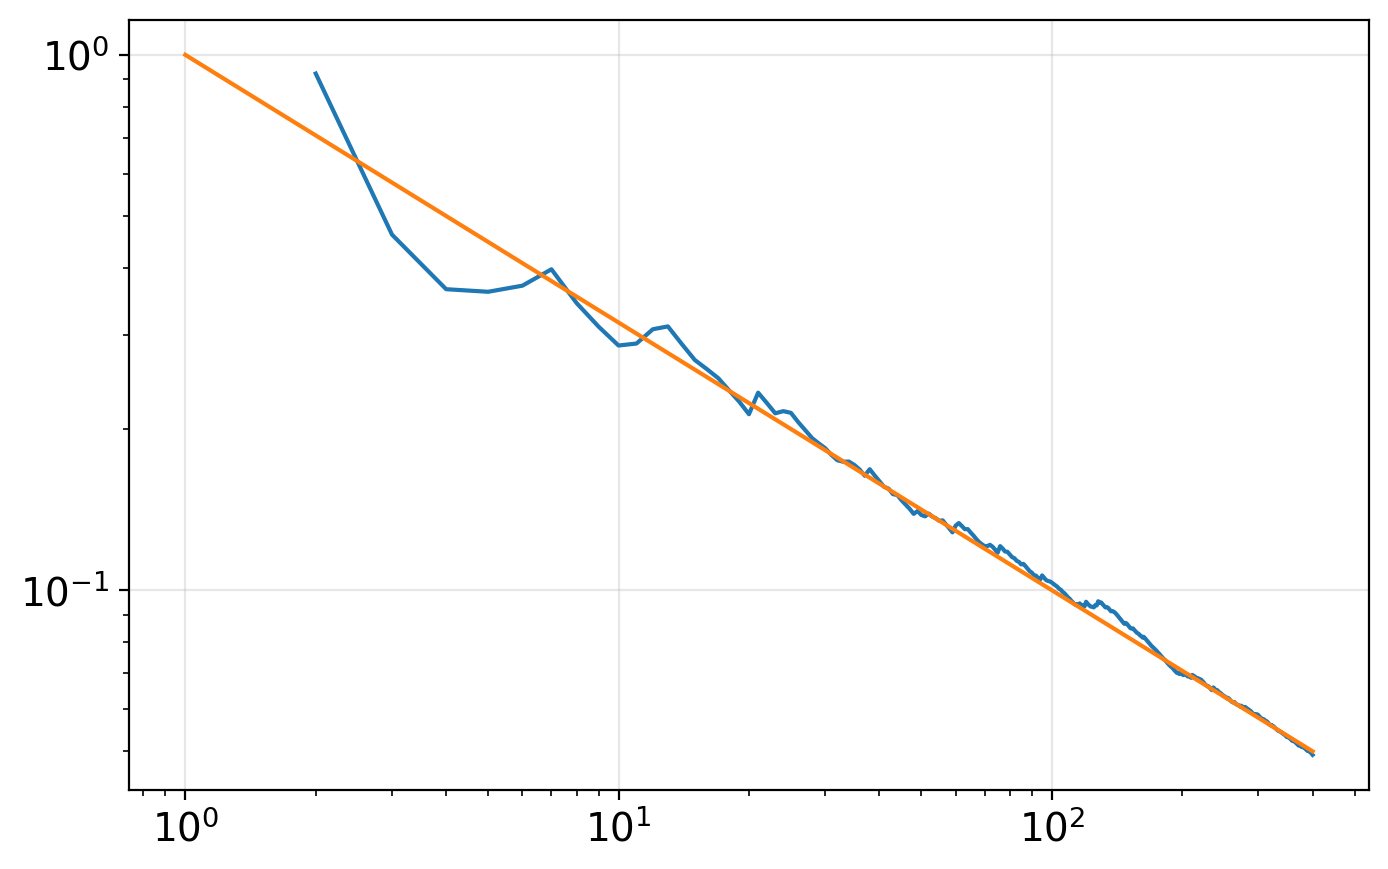

In [525]:
idx1=0
idx2=20000


fname = '20230807_scan/Fe0004_0.9_mms_25steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[idx1:idx2]

plt.plot(data['count']/data['DAQ_time'])
plt.show()


data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']

rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='b.',
    capsize=5
)


data2 = pd.read_csv(join(datadir, fname))
data2 = data2[idx1:idx2]
 
N = len(data2)
data2 = data2.groupby(['nominal_velocity']).mean()
N = N/len(data2)
rates_mean = data2['count']/data2['DAQ_time']
rates[data.index>0] -= 0.4

data3 = pd.read_csv(join(datadir, fname))
data3 = data3[idx1:idx2]
data3 = data3.groupby(['nominal_velocity']).std()
rates_std = data3['count']/data2['DAQ_time']


rates_mean[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates_mean,
    yerr=rates_std/np.sqrt(N), 
    fmt='r.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.show()



data = pd.read_csv(join(datadir, fname))
data = data[idx1:idx2]
datav1 = data[data['nominal_velocity']==-0.83475]

datav1['count']
delta = []
mean = []
time = []

for i in range(len(datav1['count']-1)):
    mean.append(datav1['count'][:i+1].mean())
    delta.append(datav1['count'][:i+1].std()/np.sqrt(i))
    time.append(i+1)
    


plt.loglog(time,delta/np.sqrt(mean[-1]))
plt.loglog(time, 1/(np.sqrt(time)))


plt.show()


# FeCy in 2 points as a funtion of time:
$\mu_{cts}(t)=const$

$\sigma_{cts}(t) = 1/\sqrt(t)$

$\sigma_{cts}(t)\cdot\sqrt{t} = 1$

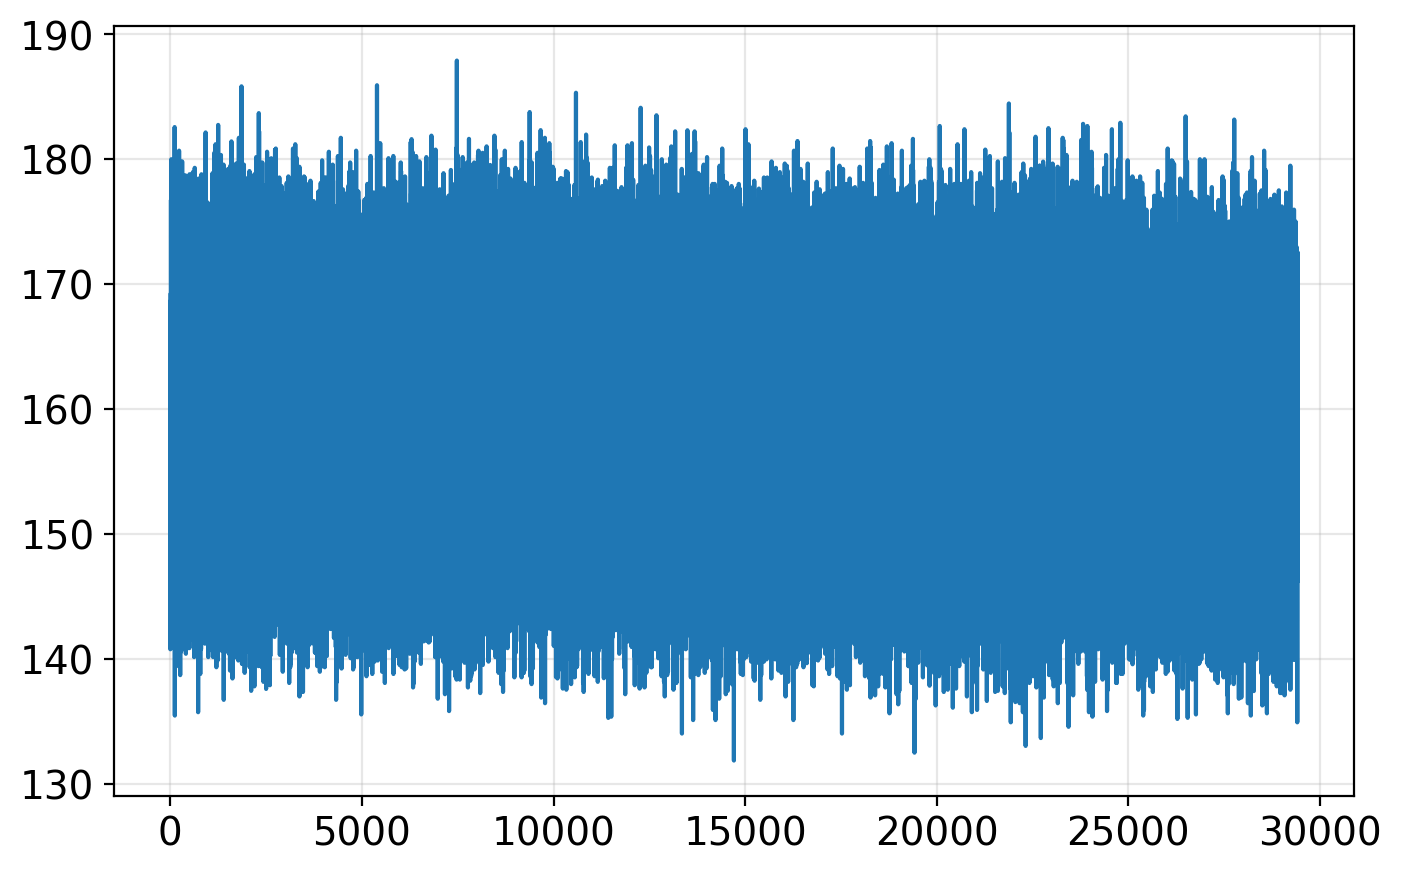

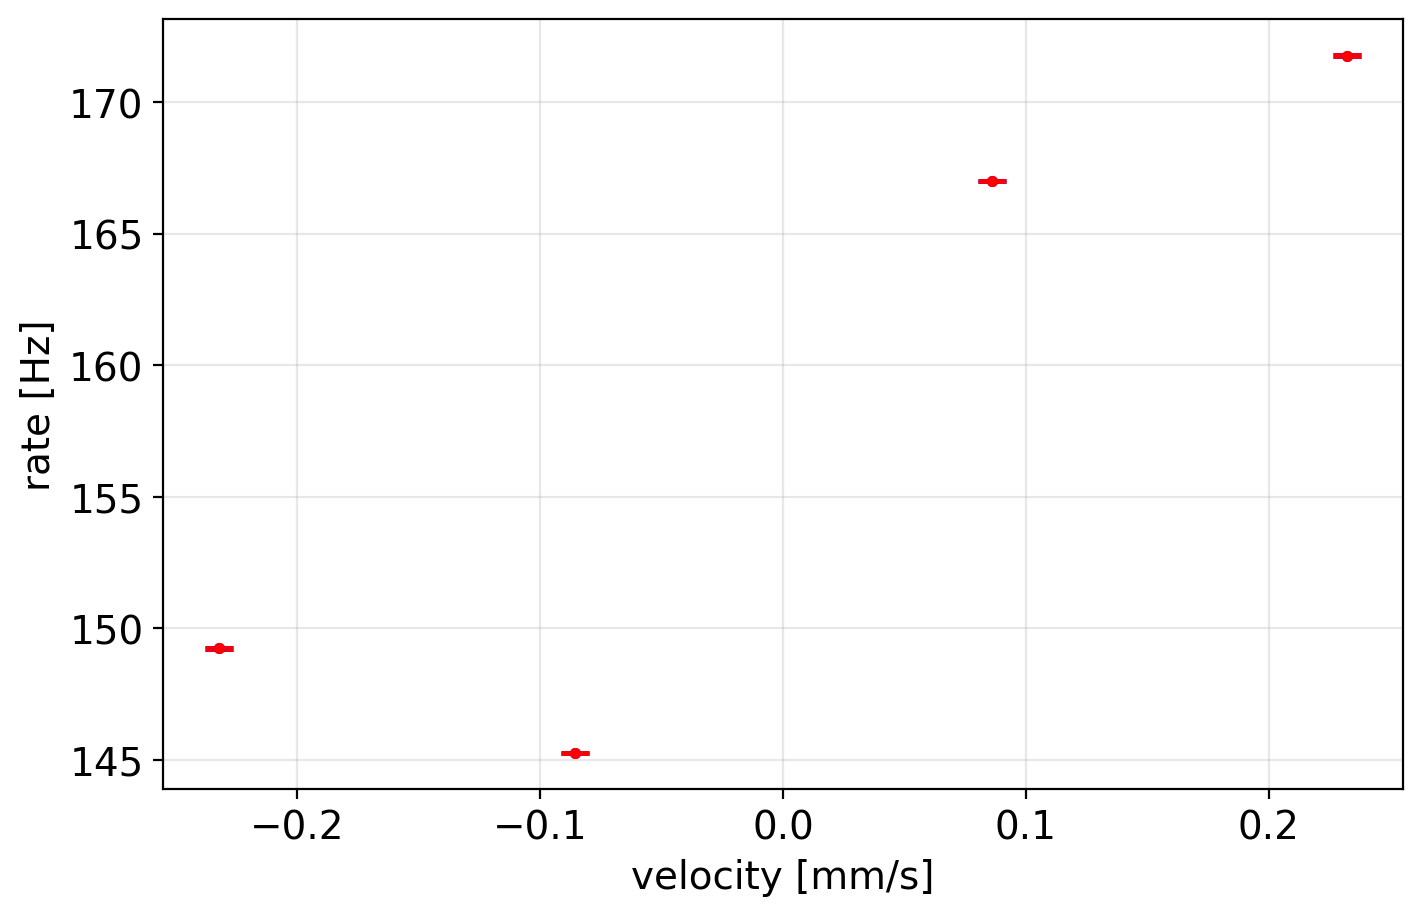

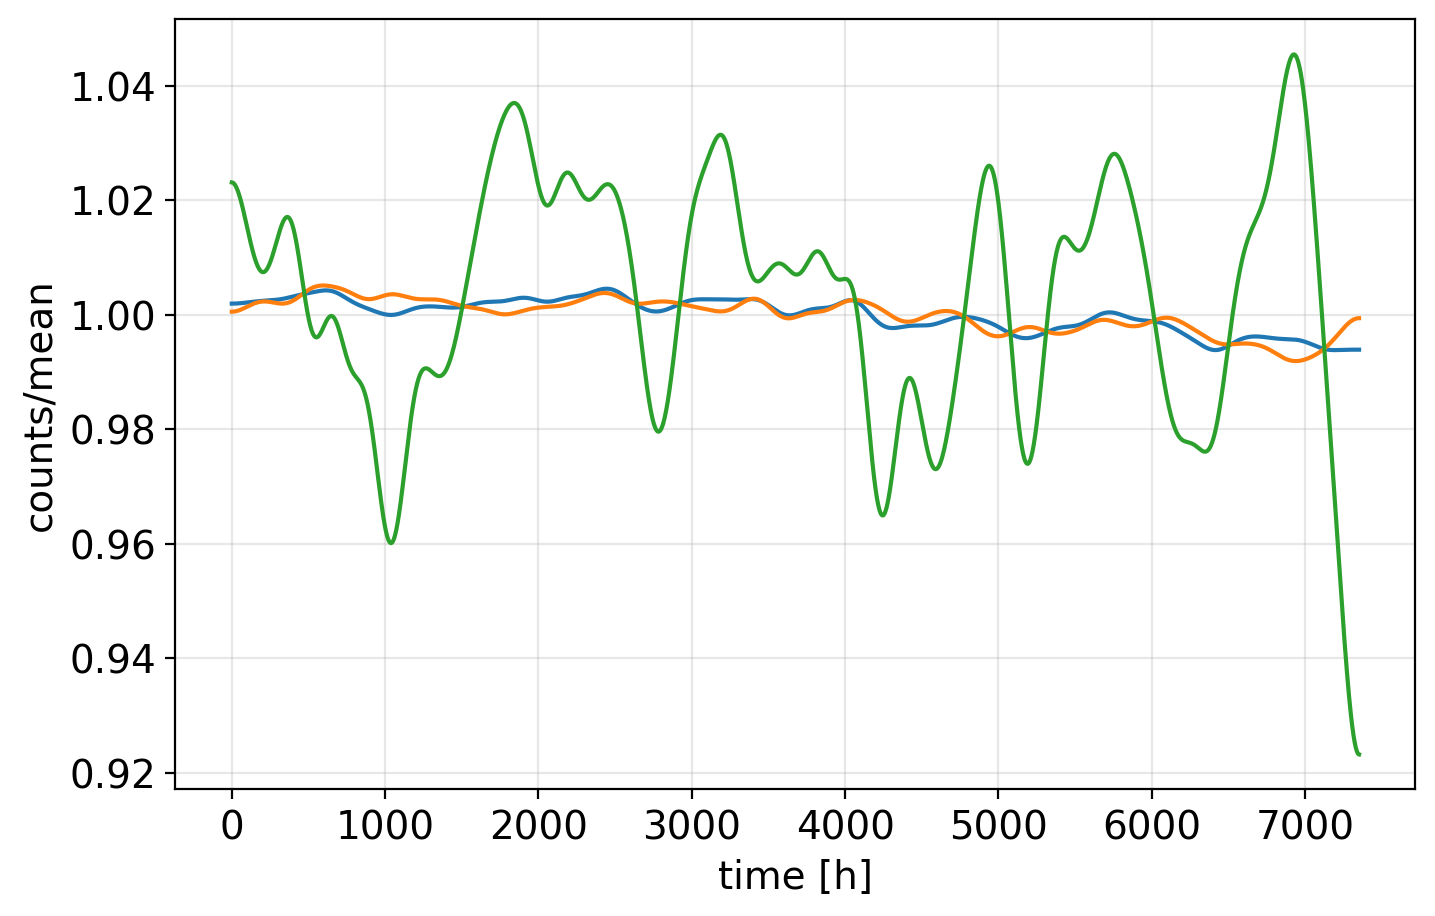

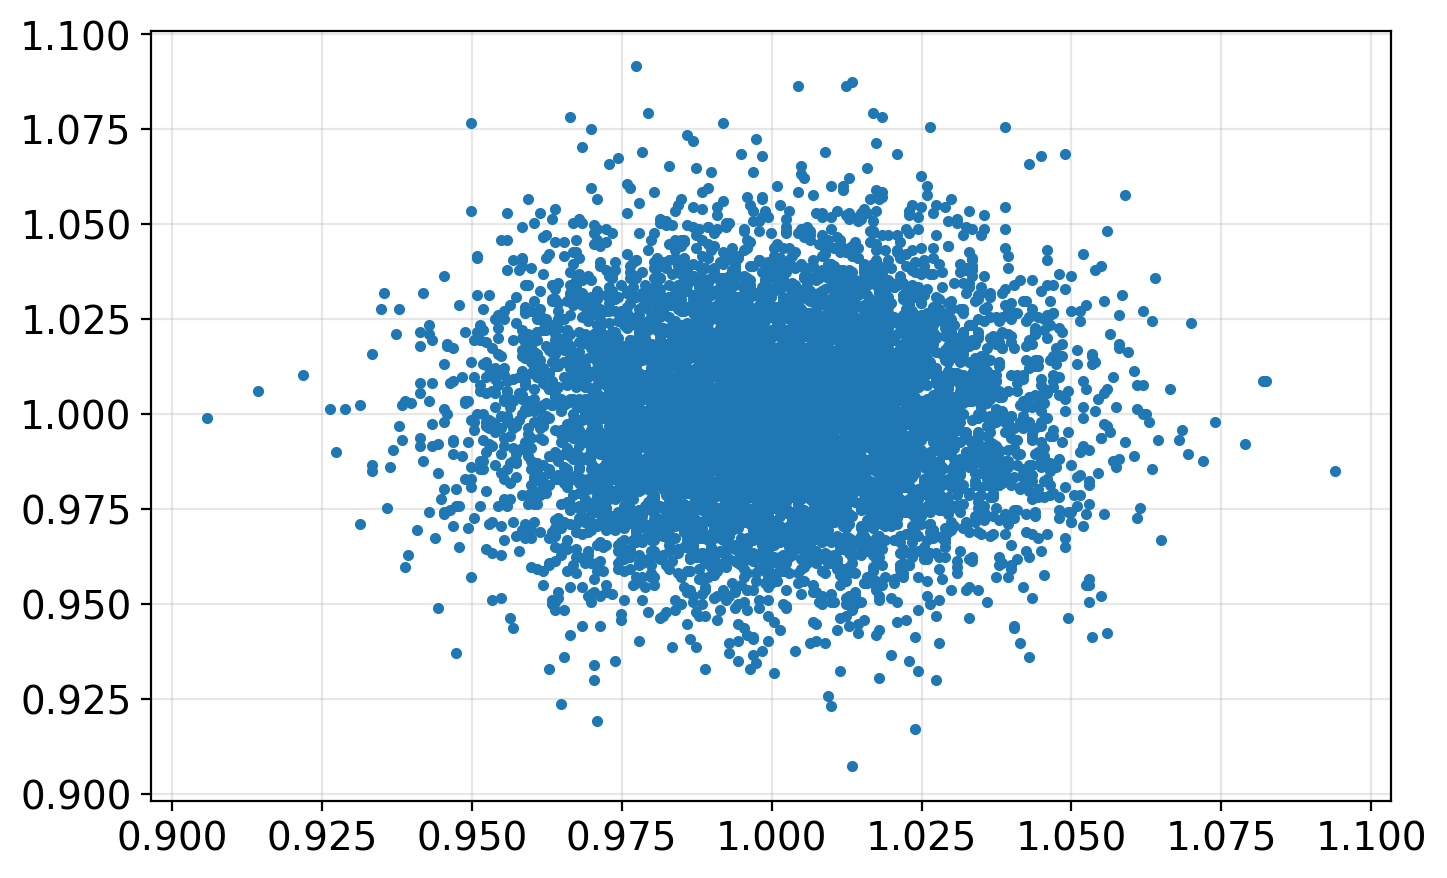

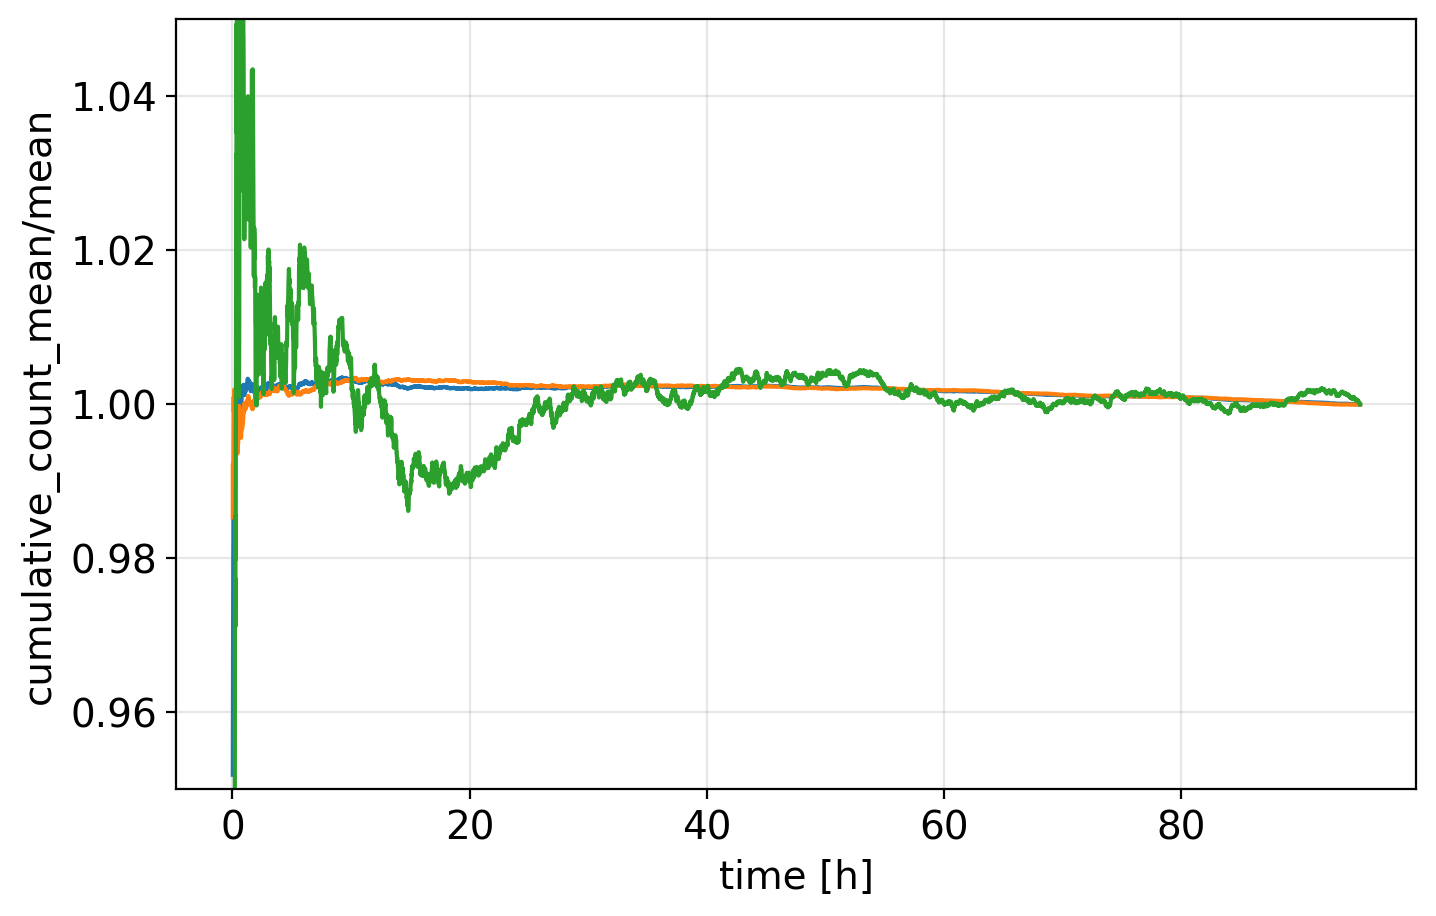

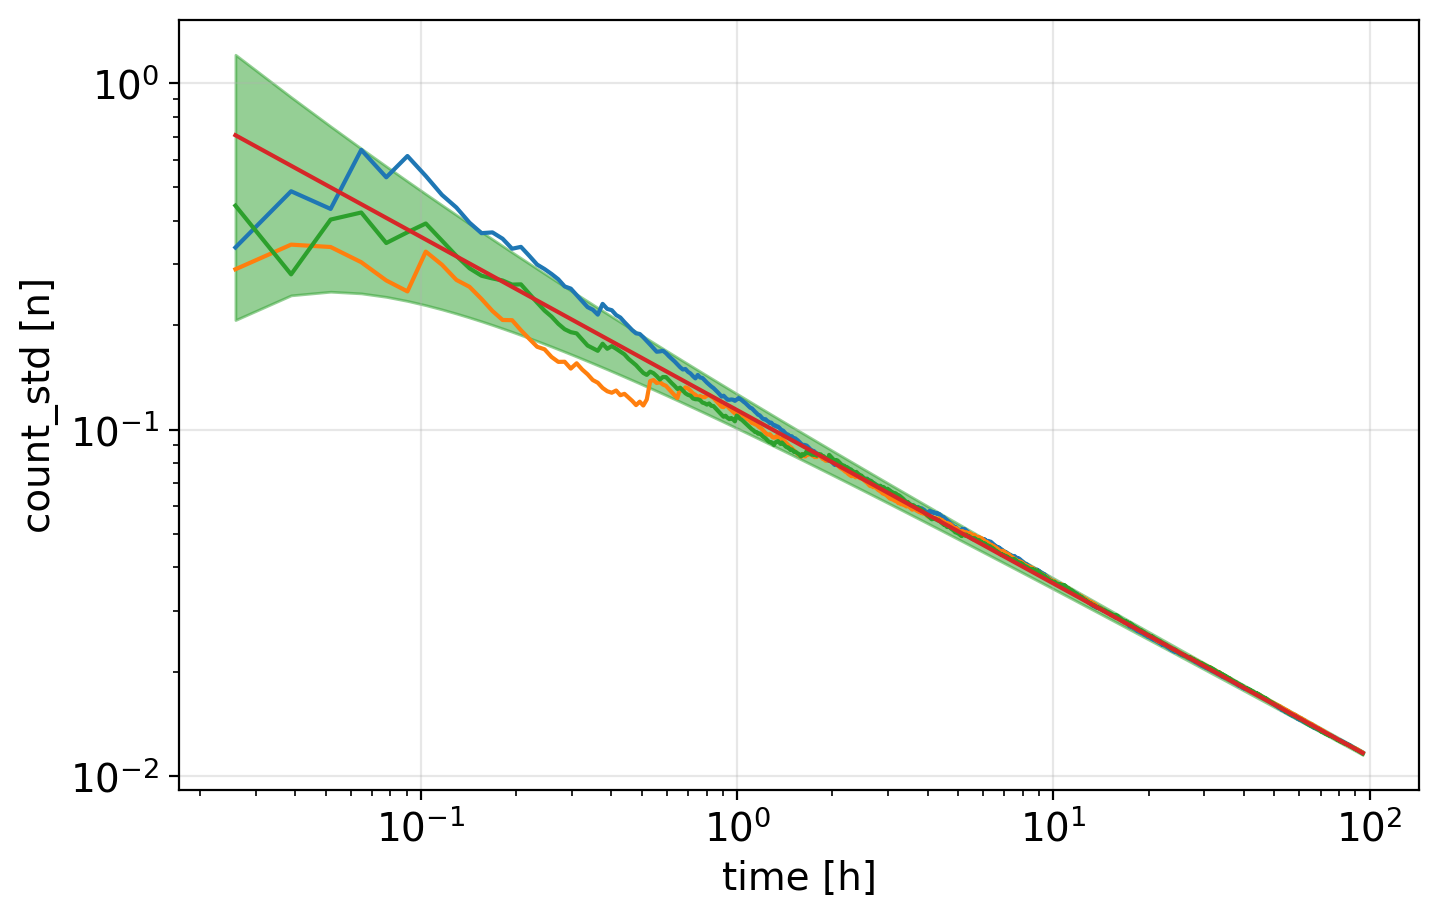

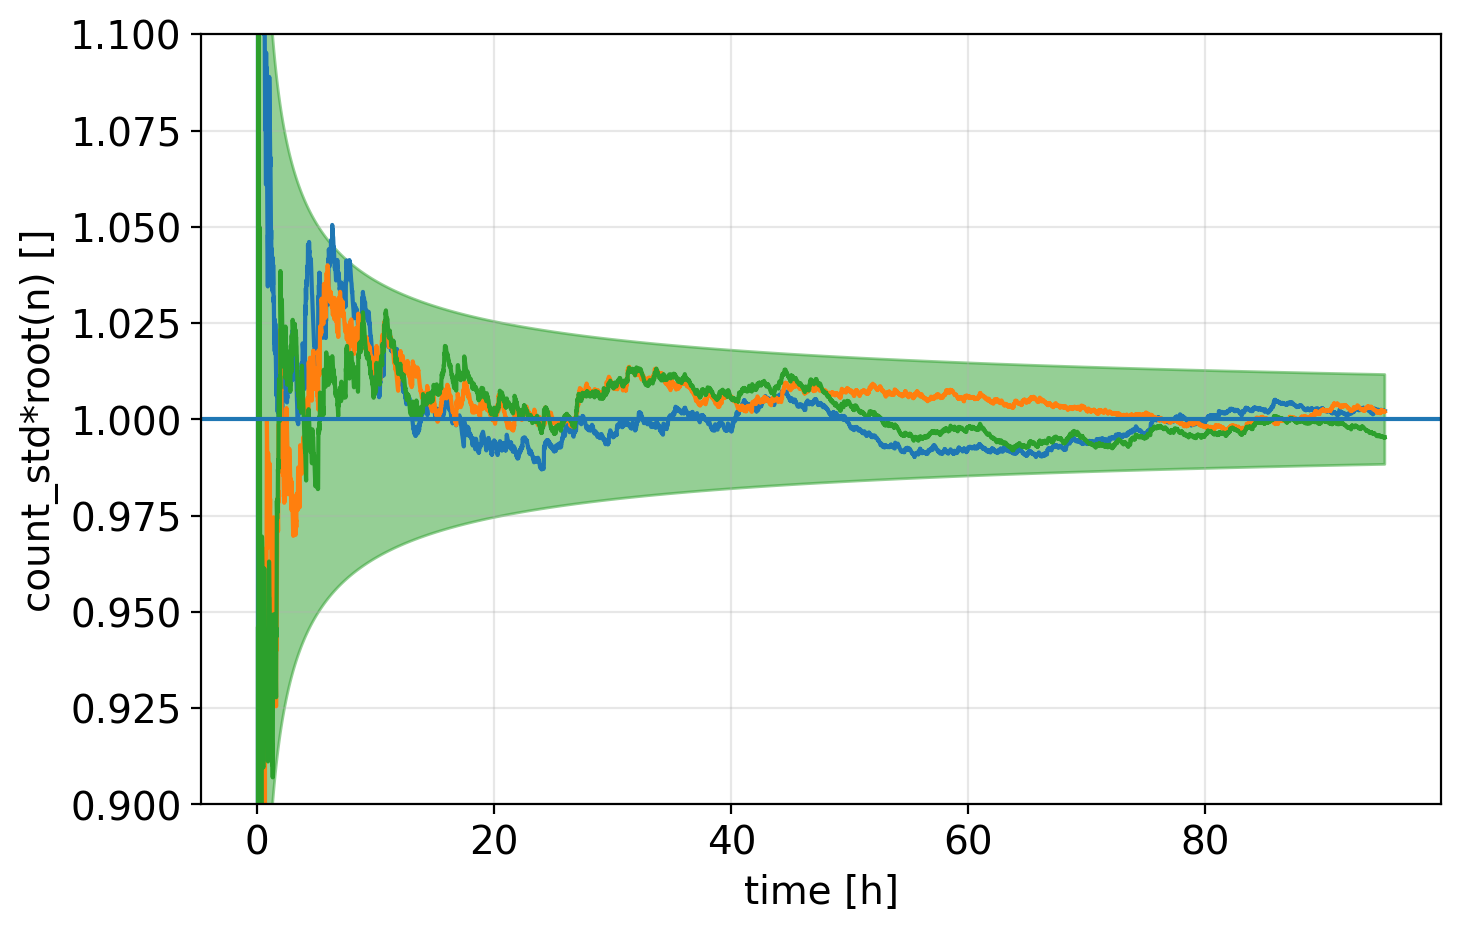

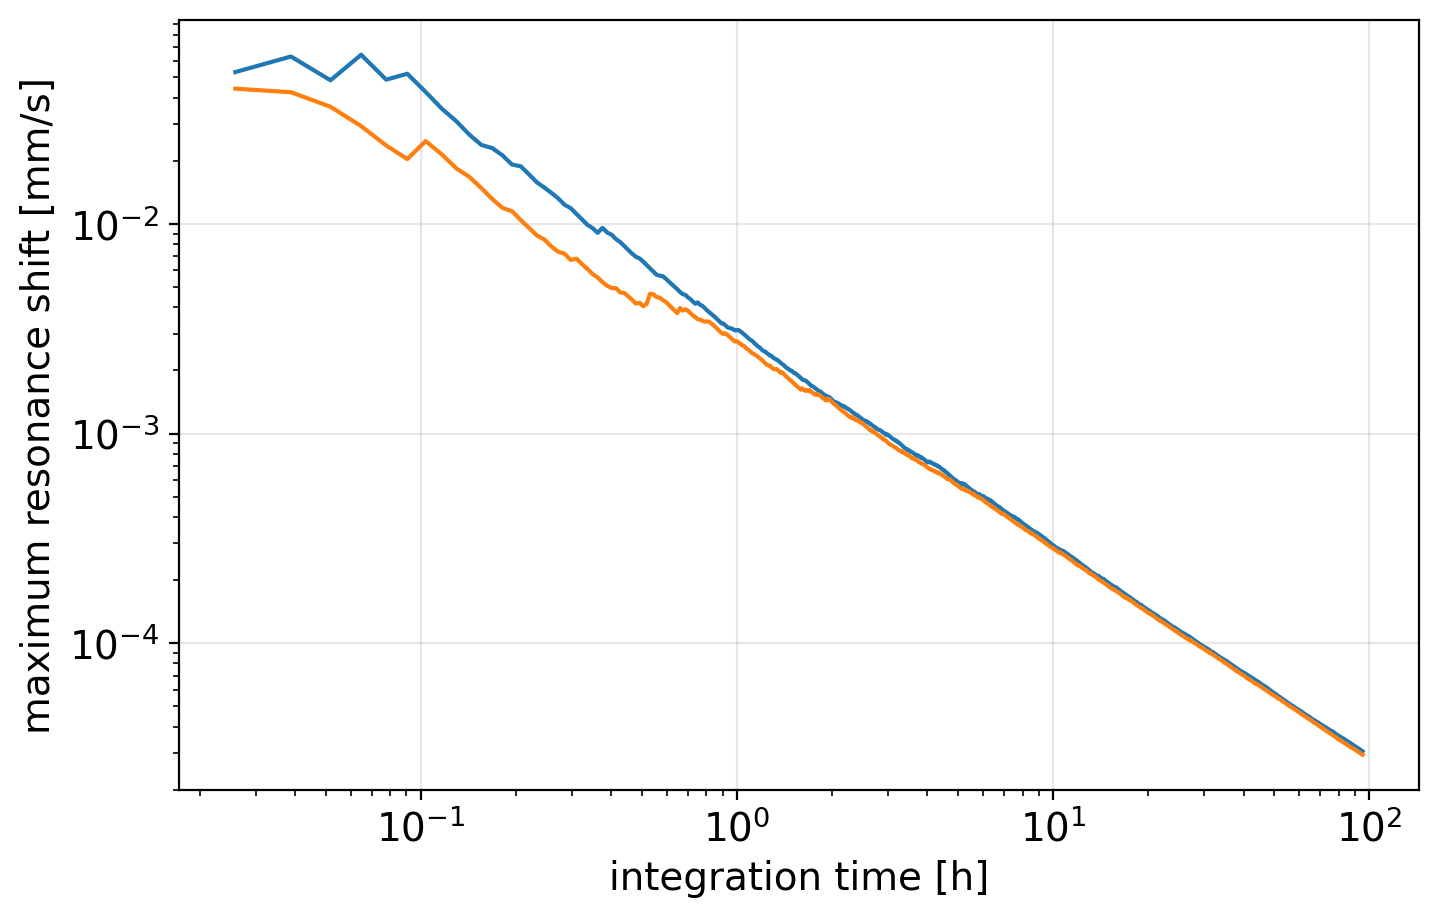

Text(0, 0.5, 'maximum resonance shift $[\\Gamma]$')

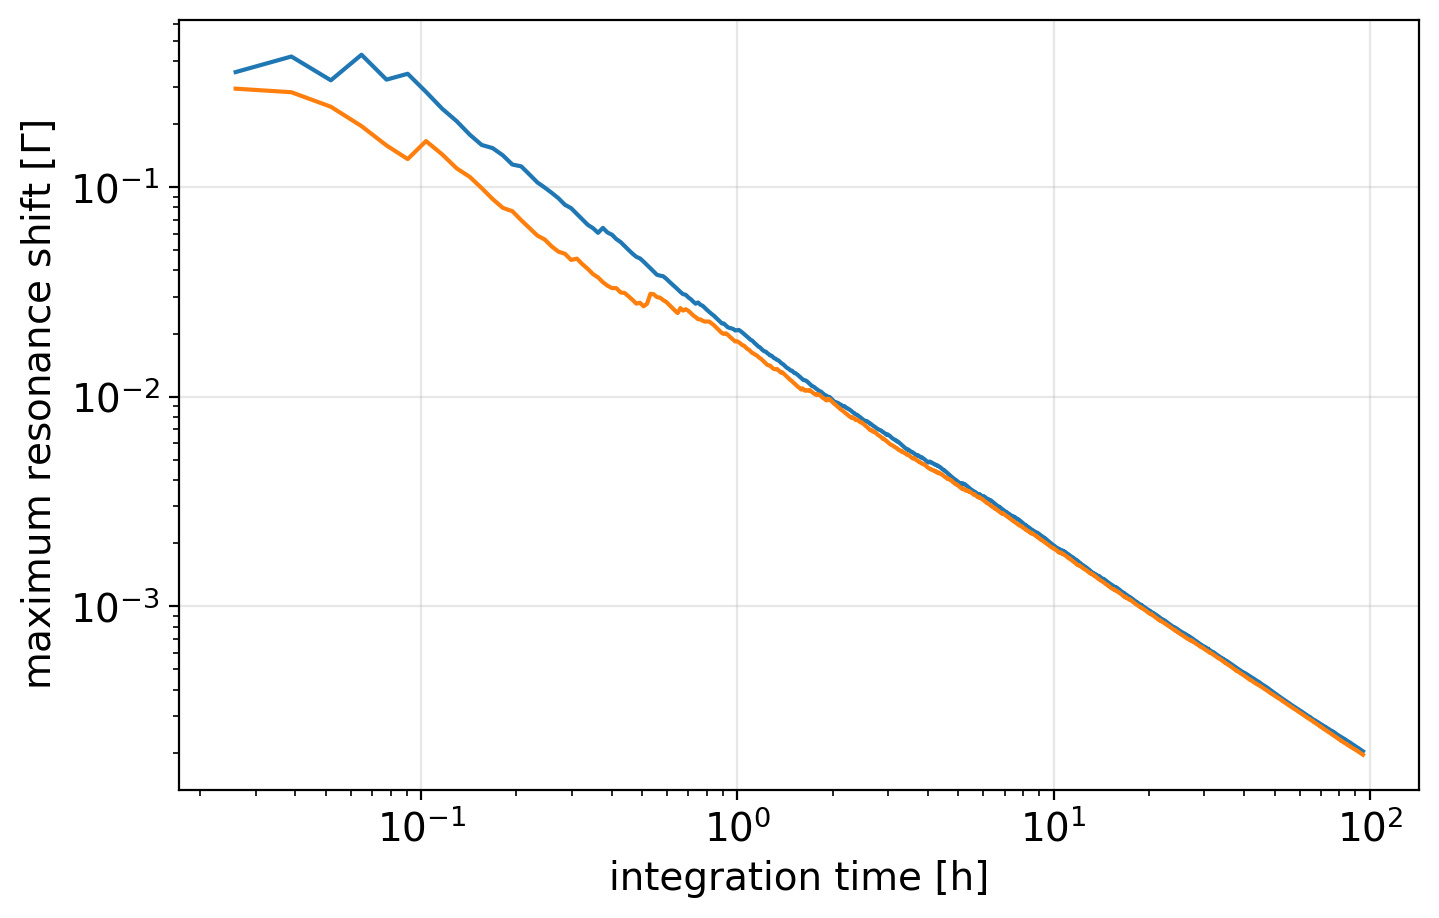

In [873]:
idx1=0
idx2=-1


fname = '20230818_scan/FeCy_0.25_mms_2steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[idx1:idx2]

plt.plot(data['count']/data['DAQ_time'])
plt.show()


data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']

rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='b.',
    capsize=5
)


data2 = pd.read_csv(join(datadir, fname))
data2 = data2[idx1:idx2]
 
N = len(data2)
data2 = data2.groupby(['nominal_velocity']).mean()
N = N/len(data2)
rates_mean = data2['count']/data2['DAQ_time']
rates[data.index>0] -= 0.4

data3 = pd.read_csv(join(datadir, fname))
data3 = data3[idx1:idx2]
data3 = data3.groupby(['nominal_velocity']).std()
rates_std = data3['count']/data2['DAQ_time']


rates_mean[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates_mean,
    yerr=rates_std/np.sqrt(N), 
    fmt='r.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.show()



data = pd.read_csv(join(datadir, fname))
data = data[idx1:idx2]
datav1 = data[data['nominal_velocity']==-0.2321399999999999].reset_index()
datav2 = data[data['nominal_velocity']==-0.08586].reset_index()

minlen = min(len(datav1['count']),len(datav2['count']))

datav1 = datav1[:minlen]
datav2 = datav2[:minlen]
    
meanv1 = datav1['count'].expanding().mean().values[1:]
meanv2 = datav2['count'].expanding().mean().values[1:]
stdv1 = datav1['count'].expanding().std().values[1:]
stdv2 = datav2['count'].expanding().std().values[1:]

mean_delta = (datav1-datav2)['count'].expanding().mean().values[1:]
std_delta = (datav1-datav2)['count'].expanding().std().values[1:]


n = datav1.reset_index().index.values[1:]+1
#N = datav1.reset_index().index.values.cumsum()[1:]
dt = datav1['DAQ_time'][1]*4/3600
dtsec = datav1['DAQ_time'][1]
time = n*dt


    
filter=100
plt.plot(gaussian_filter(datav1['count']/meanv1[-1],filter))
plt.plot(gaussian_filter(datav2['count']/meanv2[-1],filter))
plt.plot(gaussian_filter(np.abs(datav1-datav2)['count']/mean_delta[-1],filter))
plt.ylabel("counts/mean")
plt.xlabel("time [h]")

plt.show()

plt.plot(datav1['count']/meanv1[-1],datav2['count']/meanv2[-1],'.')
#plt.plot(datav1['count']/dtsec,datav2['count']/dtsec,'.')
plt.show()

plt.plot(time,meanv1/meanv1[-1])
plt.plot(time,meanv2/meanv2[-1])
plt.plot(time,mean_delta/mean_delta[-1])
plt.ylim(0.95,1.05)

plt.ylabel("cumulative_count_mean/mean")
plt.xlabel("time [h]")

plt.show()


plt.loglog(time,stdv1/np.sqrt(n)/np.sqrt(meanv1[-1]))
plt.loglog(time,stdv2/np.sqrt(n)/np.sqrt(meanv2[-1]))
plt.loglog(time,std_delta/np.sqrt(n)/np.sqrt(meanv1[-1]+meanv2[-1]))
plt.loglog(time, 1/(np.sqrt(n)))


#plt.loglog(timev2[1:]*dt,deltav2[1:]/np.sqrt(meanv2[-1]))
#plt.loglog(timev2[1:]*dt, 1/(np.sqrt(timev2[1:])))


plt.fill_between(time, 1/np.sqrt(n)-1/n, 1/np.sqrt(n)+1/n, color='C2',alpha = 0.5)

plt.ylabel("count_std [n]")
plt.xlabel("time [h]")


plt.show()



plt.plot(time,stdv1/np.sqrt(meanv1[-1]))
plt.plot(time,stdv2/np.sqrt(meanv2[-1]))
plt.plot(time,std_delta/np.sqrt(meanv1[-1]+meanv2[-1]))

plt.axhline(1)
plt.fill_between(time, 1-1*np.sqrt(n)/n, 1+1*np.sqrt(n)/n, color='C2',alpha = 0.5)


plt.ylim(0.9,1.1)
plt.ylabel("count_std*root(n) []")
plt.xlabel("time [h]")


plt.show()



dndv = (195-165)/0.15
dn1 = stdv1/n
dn2 = stdv2/n

plt.loglog(time,dn1/dndv, label = 'single point +')
plt.loglog(time,dn2/dndv, label = 'single point -')

plt.xlabel('integration time [h]')
plt.ylabel('maximum resonance shift [mm/s]')

plt.show()

datav1['count'].expanding().std().values#-np.array(meanv1)
datav1.reset_index().index.values.cumsum()
(datav1-datav2)['count']
stdv1
len(time),len(meanv1), n
(meanv1[-1]+meanv2[-1])/mean_delta[-1]
time[-1]
65-42


dn = (195-165) 
dn1 = stdv1/n
dn2 = stdv2/n

plt.loglog(time,dn1/dn, label = 'single point +')
plt.loglog(time,dn2/dn, label = 'single point -')

plt.xlabel('integration time [h]')
plt.ylabel('maximum resonance shift $[\Gamma]$')



Text(0, 0.5, 'maximum resonance shift $[\\Gamma]$')

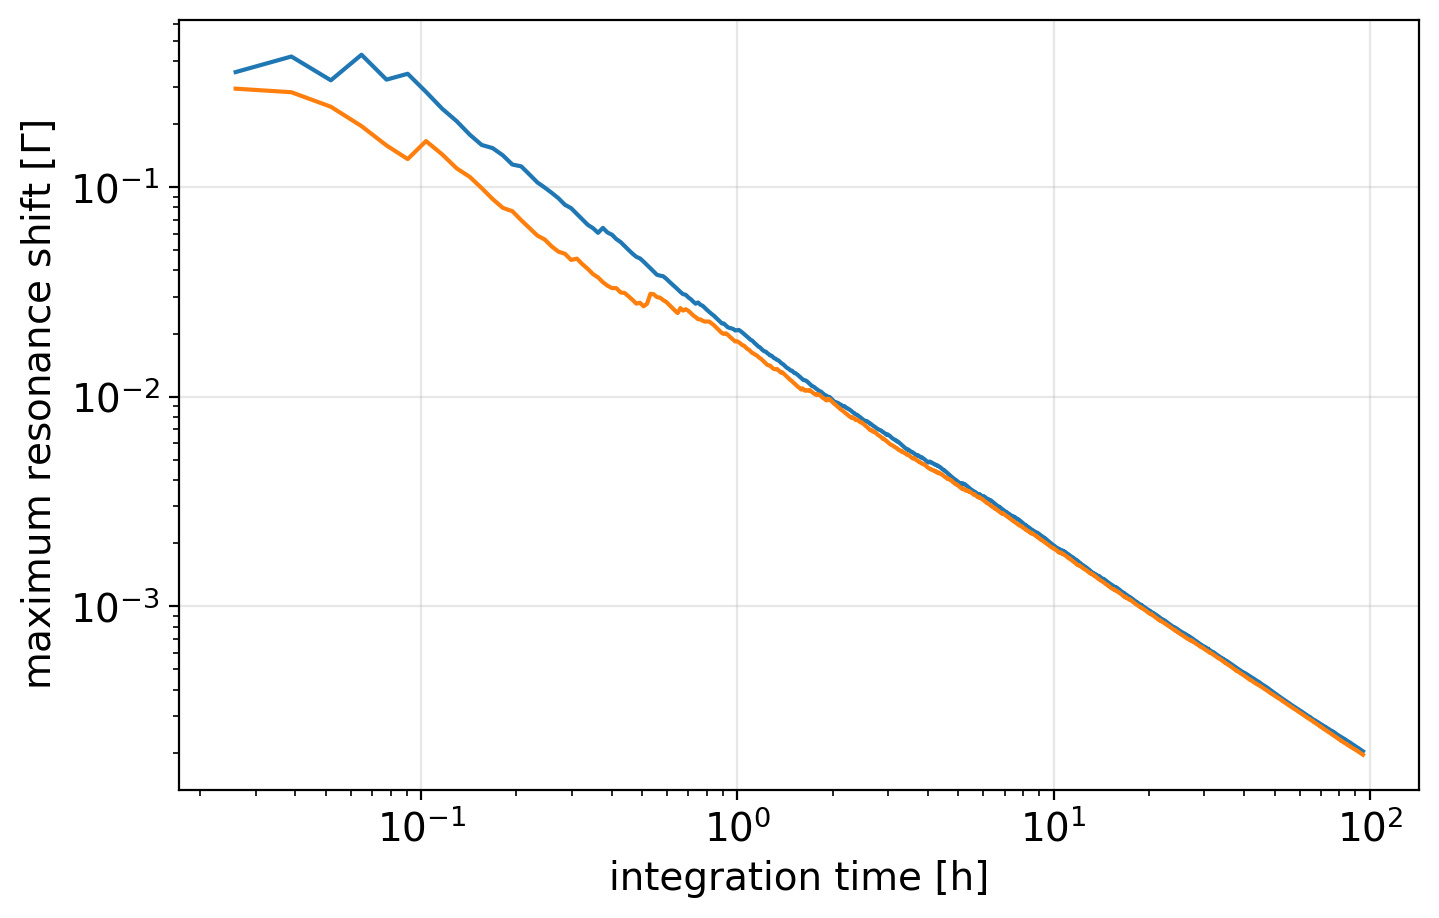

## long scan 09/01/2023, 10 days

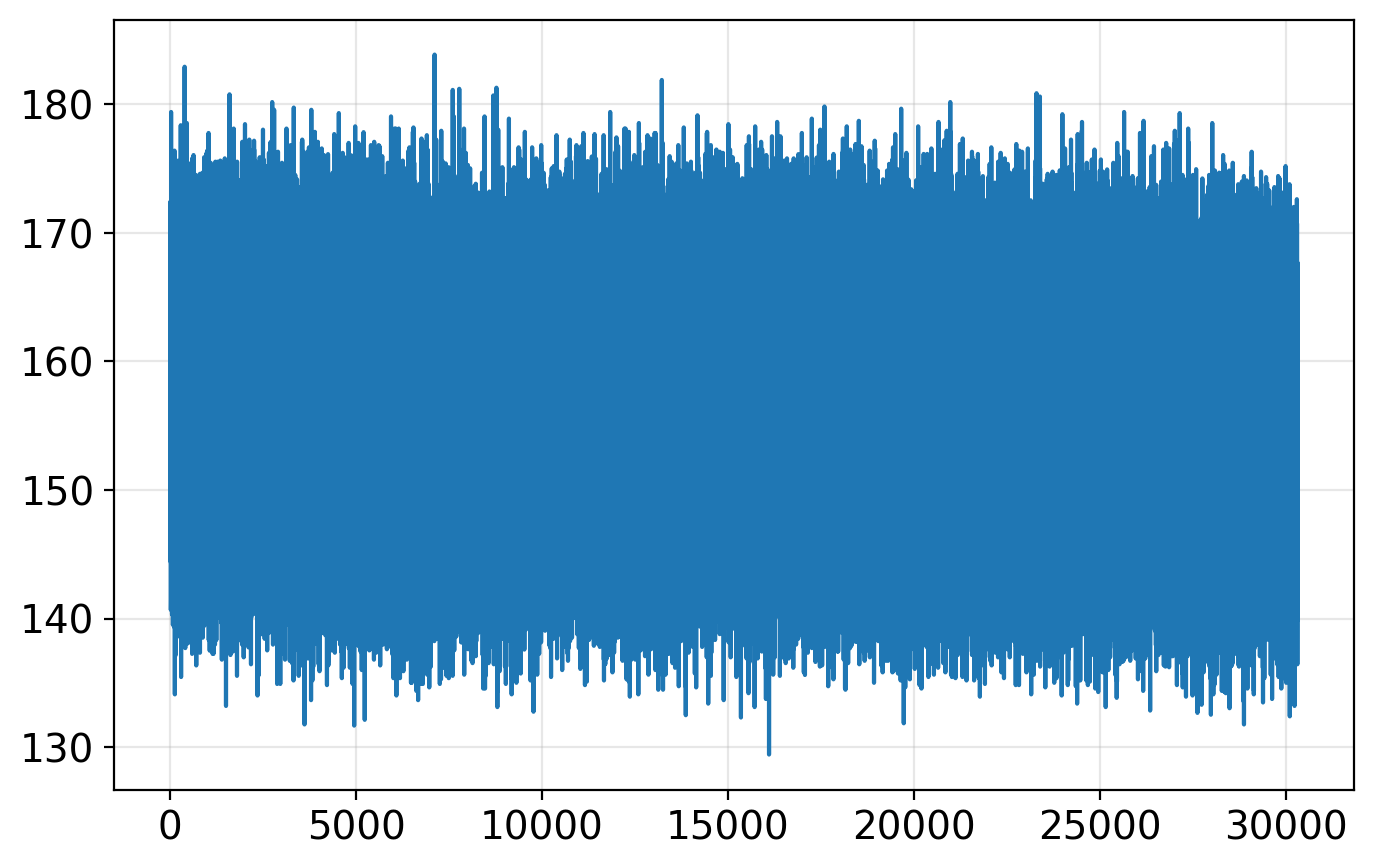

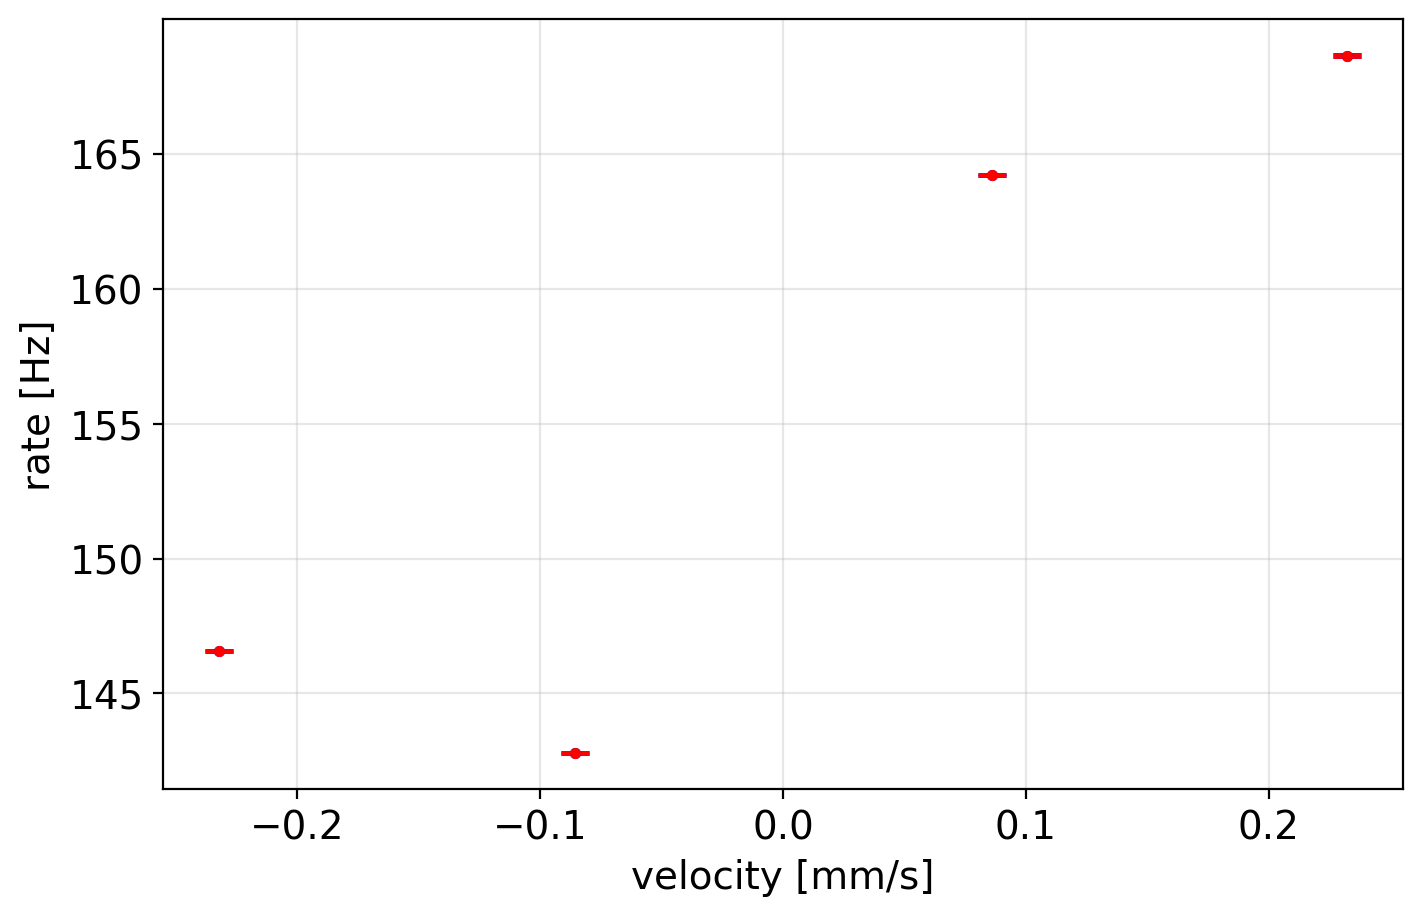

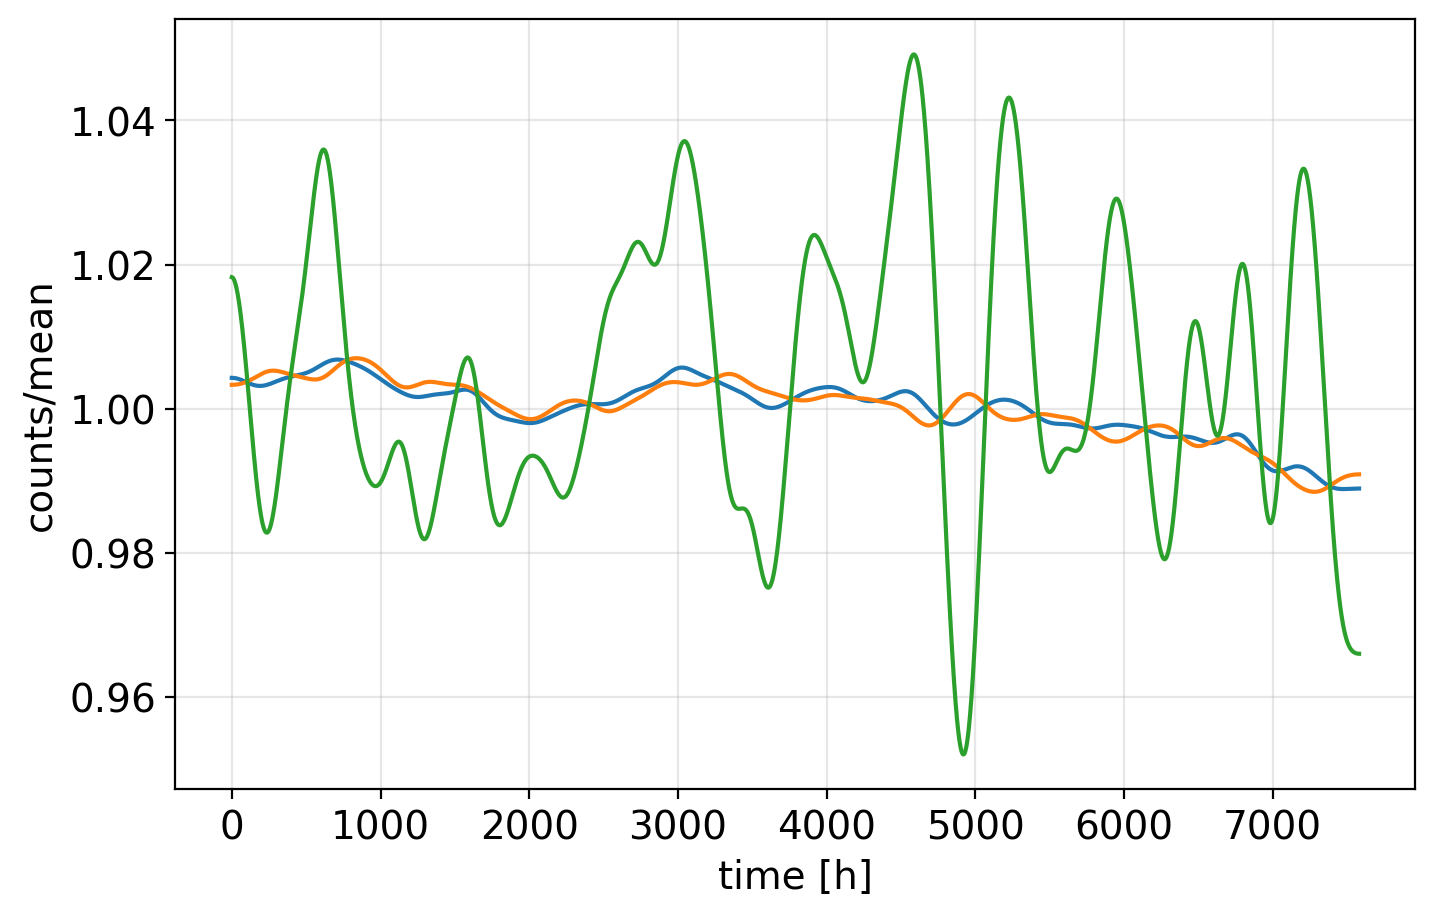

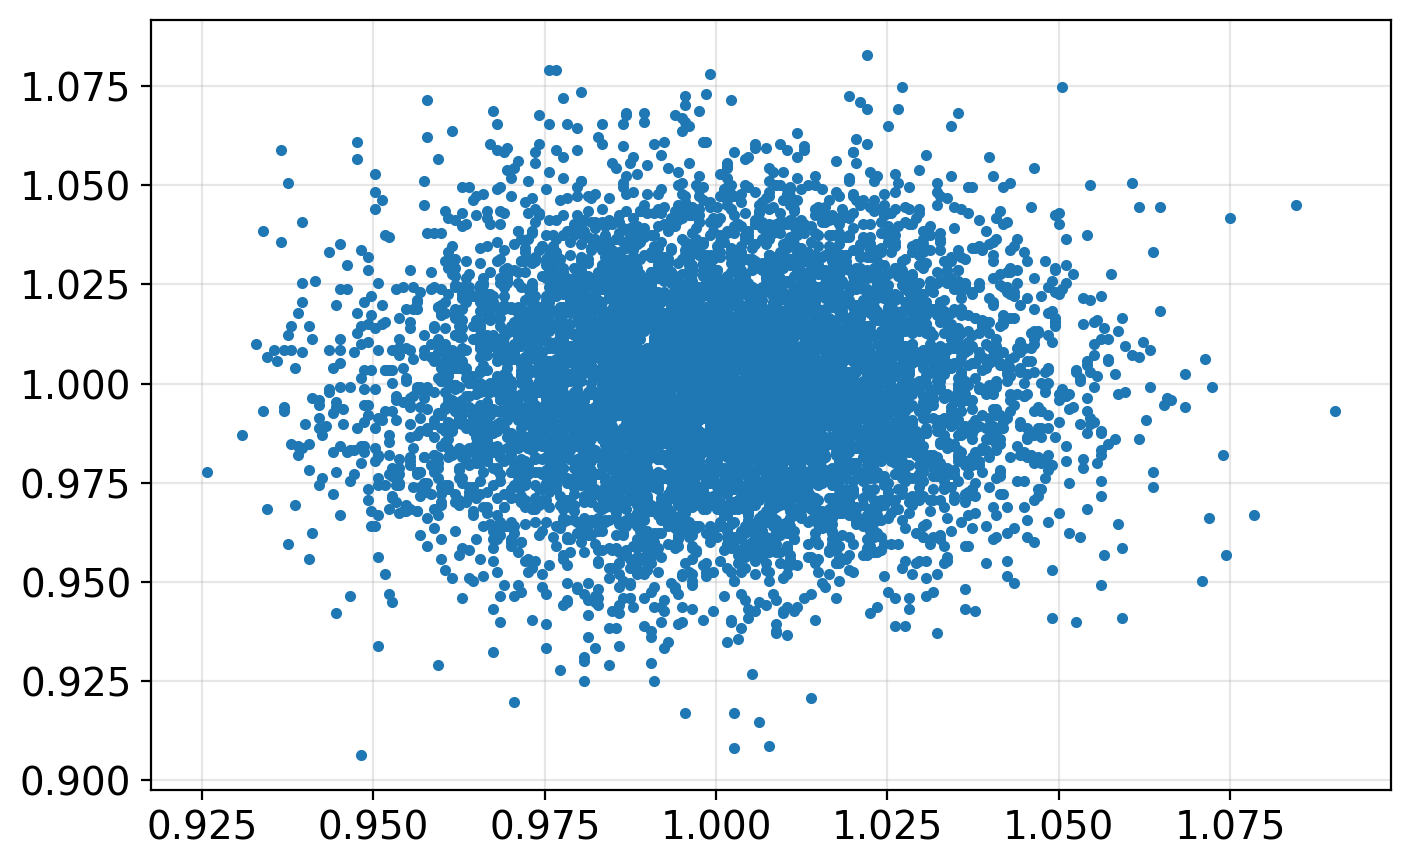

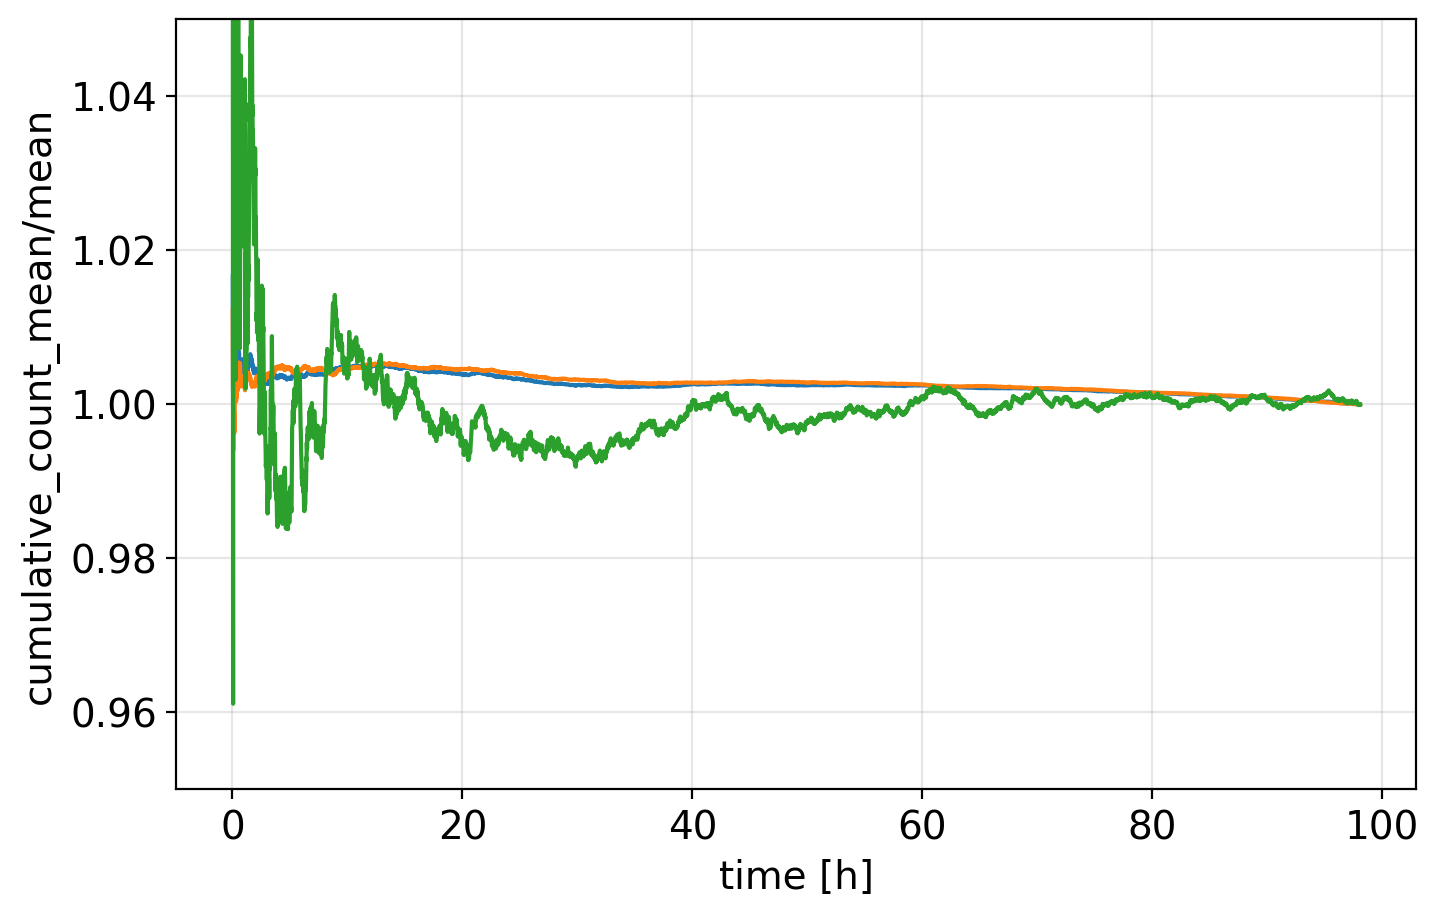

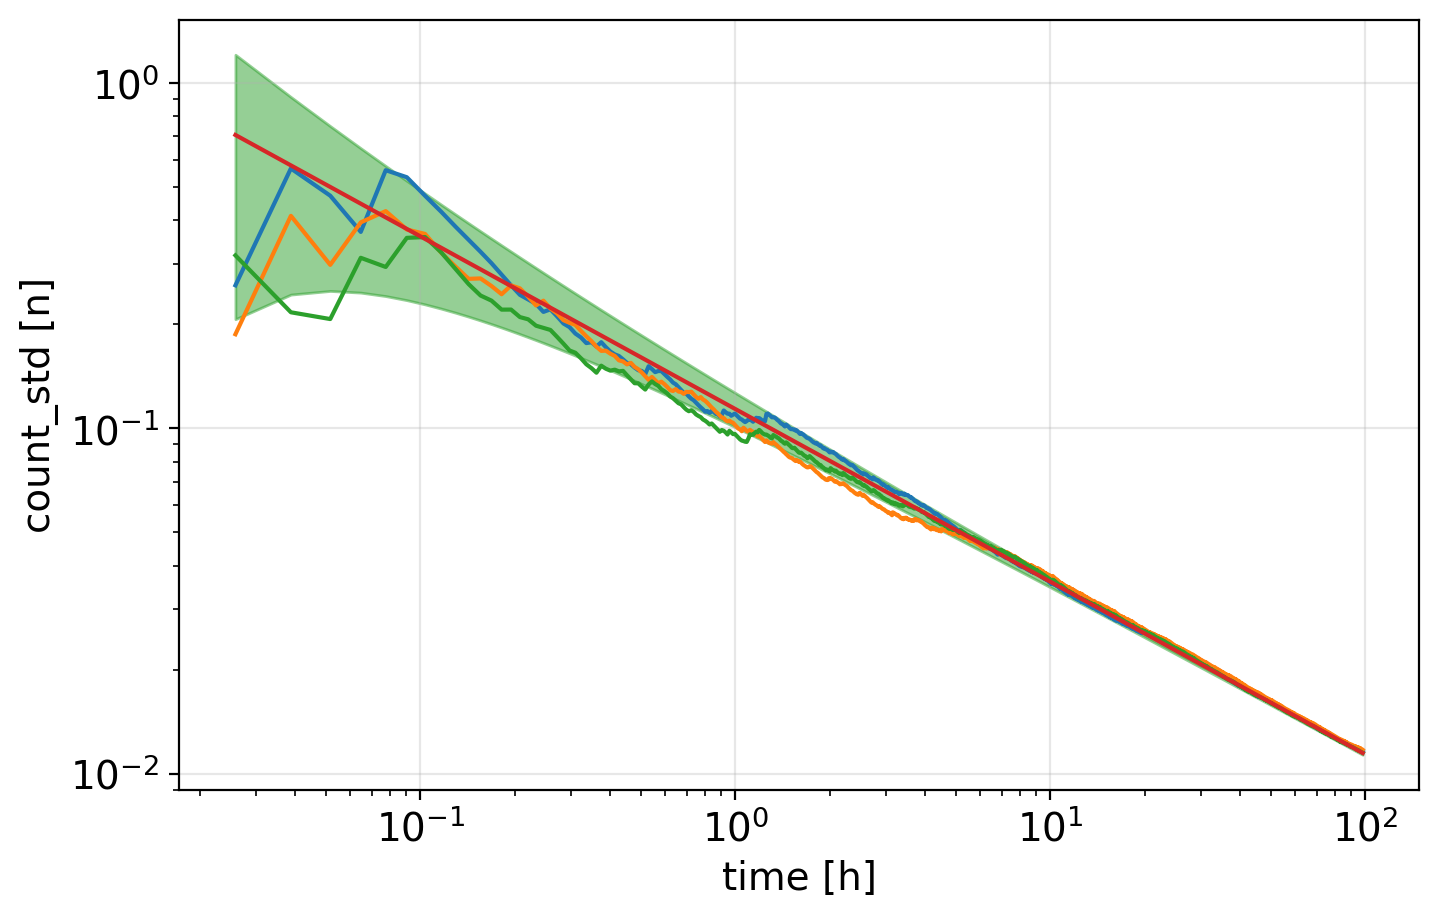

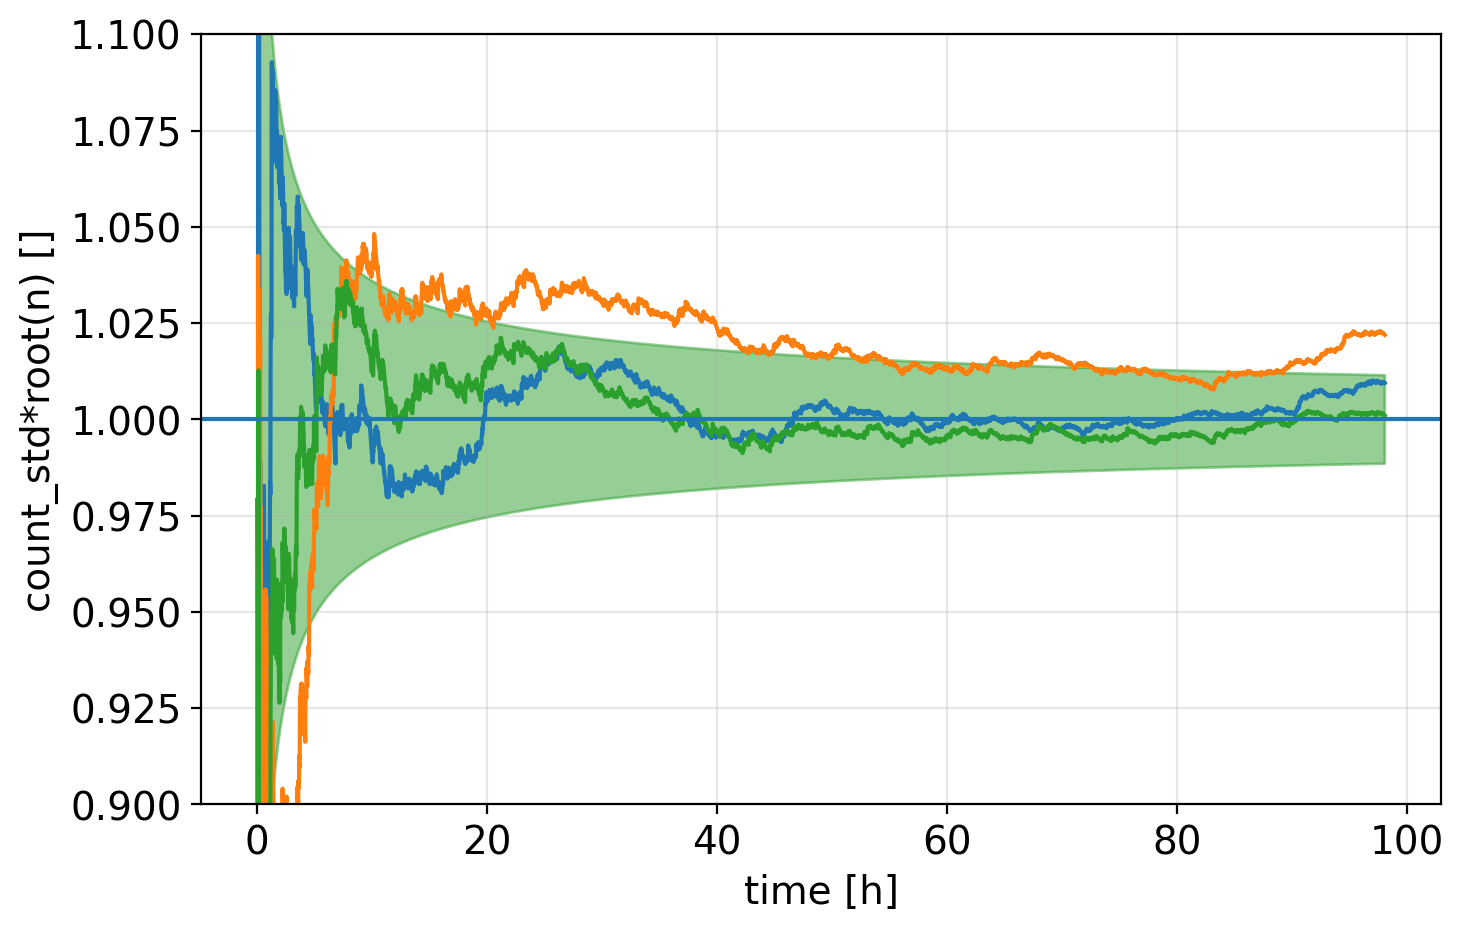

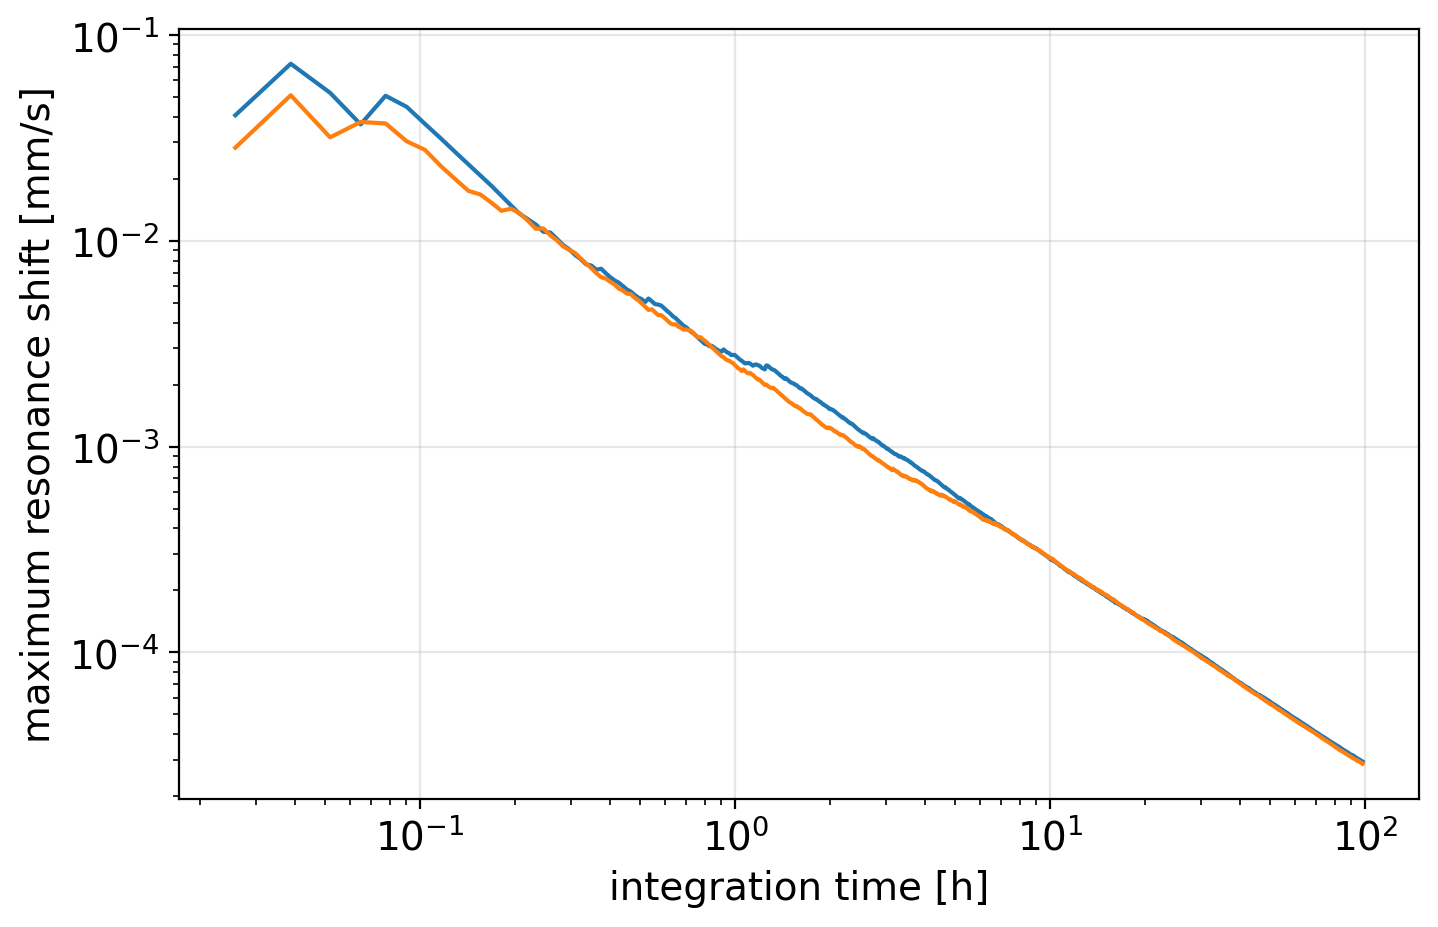

Text(0, 0.5, 'maximum resonance shift $[\\Gamma]$')

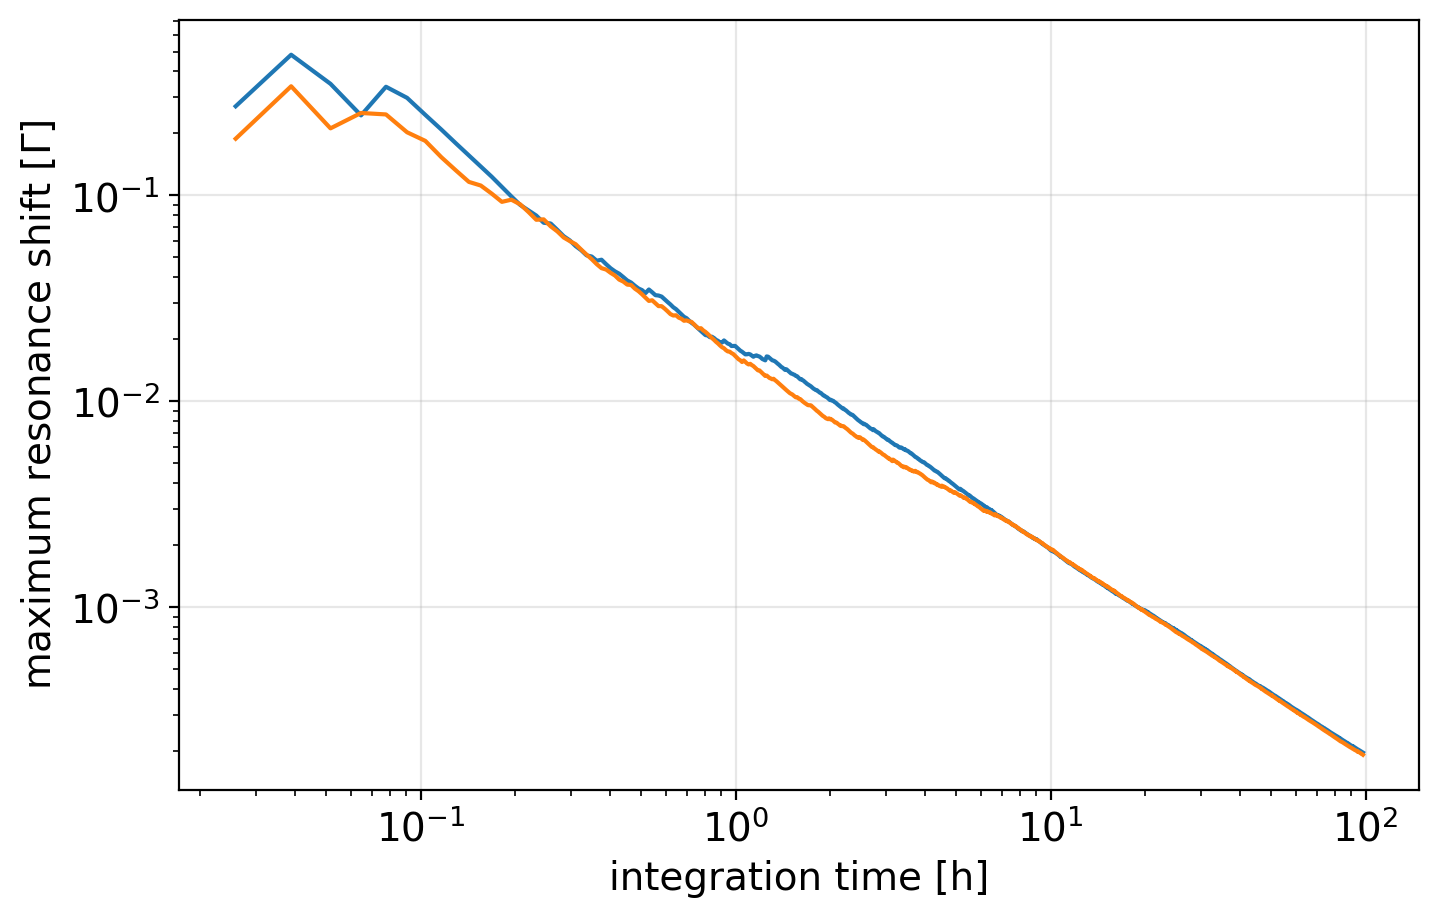

In [874]:
idx1=0
idx2=-1


fname = '20230901_scan/FeCy_0.25_mms_2steps_0.6-17in.dat'
data = pd.read_csv(join(datadir, fname))
data = data[idx1:idx2]

plt.plot(data['count']/data['DAQ_time'])
plt.show()


data = data.groupby(['nominal_velocity']).sum()
rates = data['count']/data['DAQ_time']

rates[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates,
    yerr=rates/np.sqrt(data['count']), 
    fmt='b.',
    capsize=5
)


data2 = pd.read_csv(join(datadir, fname))
data2 = data2[idx1:idx2]
 
N = len(data2)
data2 = data2.groupby(['nominal_velocity']).mean()
N = N/len(data2)
rates_mean = data2['count']/data2['DAQ_time']
rates[data.index>0] -= 0.4

data3 = pd.read_csv(join(datadir, fname))
data3 = data3[idx1:idx2]
data3 = data3.groupby(['nominal_velocity']).std()
rates_std = data3['count']/data2['DAQ_time']


rates_mean[data.index>0] -= 0.4
plt.errorbar(
    -data.index.values,
    rates_mean,
    yerr=rates_std/np.sqrt(N), 
    fmt='r.',
    capsize=5
)


plt.xlabel('velocity [mm/s]')
plt.ylabel('rate [Hz]')
plt.show()



data = pd.read_csv(join(datadir, fname))
data = data[idx1:idx2]
datav1 = data[data['nominal_velocity']==-0.2321399999999999].reset_index()
datav2 = data[data['nominal_velocity']==-0.08586].reset_index()

minlen = min(len(datav1['count']),len(datav2['count']))

datav1 = datav1[:minlen]
datav2 = datav2[:minlen]
    
meanv1 = datav1['count'].expanding().mean().values[1:]
meanv2 = datav2['count'].expanding().mean().values[1:]
stdv1 = datav1['count'].expanding().std().values[1:]
stdv2 = datav2['count'].expanding().std().values[1:]

mean_delta = (datav1-datav2)['count'].expanding().mean().values[1:]
std_delta = (datav1-datav2)['count'].expanding().std().values[1:]


n = datav1.reset_index().index.values[1:]+1
#N = datav1.reset_index().index.values.cumsum()[1:]
dt = datav1['DAQ_time'][1]*4/3600
dtsec = datav1['DAQ_time'][1]
time = n*dt


    
filter=100
plt.plot(gaussian_filter(datav1['count']/meanv1[-1],filter))
plt.plot(gaussian_filter(datav2['count']/meanv2[-1],filter))
plt.plot(gaussian_filter(np.abs(datav1-datav2)['count']/mean_delta[-1],filter))
plt.ylabel("counts/mean")
plt.xlabel("time [h]")

plt.show()

plt.plot(datav1['count']/meanv1[-1],datav2['count']/meanv2[-1],'.')
#plt.plot(datav1['count']/dtsec,datav2['count']/dtsec,'.')
plt.show()

plt.plot(time,meanv1/meanv1[-1])
plt.plot(time,meanv2/meanv2[-1])
plt.plot(time,mean_delta/mean_delta[-1])
plt.ylim(0.95,1.05)

plt.ylabel("cumulative_count_mean/mean")
plt.xlabel("time [h]")

plt.show()


plt.loglog(time,stdv1/np.sqrt(n)/np.sqrt(meanv1[-1]))
plt.loglog(time,stdv2/np.sqrt(n)/np.sqrt(meanv2[-1]))
plt.loglog(time,std_delta/np.sqrt(n)/np.sqrt(meanv1[-1]+meanv2[-1]))
plt.loglog(time, 1/(np.sqrt(n)))


#plt.loglog(timev2[1:]*dt,deltav2[1:]/np.sqrt(meanv2[-1]))
#plt.loglog(timev2[1:]*dt, 1/(np.sqrt(timev2[1:])))


plt.fill_between(time, 1/np.sqrt(n)-1/n, 1/np.sqrt(n)+1/n, color='C2',alpha = 0.5)

plt.ylabel("count_std [n]")
plt.xlabel("time [h]")


plt.show()



plt.plot(time,stdv1/np.sqrt(meanv1[-1]))
plt.plot(time,stdv2/np.sqrt(meanv2[-1]))
plt.plot(time,std_delta/np.sqrt(meanv1[-1]+meanv2[-1]))

plt.axhline(1)
plt.fill_between(time, 1-1*np.sqrt(n)/n, 1+1*np.sqrt(n)/n, color='C2',alpha = 0.5)


plt.ylim(0.9,1.1)
plt.ylabel("count_std*root(n) []")
plt.xlabel("time [h]")


plt.show()



dndv = (195-165)/0.15
dn1 = stdv1/n
dn2 = stdv2/n

plt.loglog(time,dn1/dndv, label = 'single point +')
plt.loglog(time,dn2/dndv, label = 'single point -')

plt.xlabel('integration time [h]')
plt.ylabel('maximum resonance shift [mm/s]')

plt.show()

datav1['count'].expanding().std().values#-np.array(meanv1)
datav1.reset_index().index.values.cumsum()
(datav1-datav2)['count']
stdv1
len(time),len(meanv1), n
(meanv1[-1]+meanv2[-1])/mean_delta[-1]
time[-1]
65-42


dn = (195-165) 
dn1 = stdv1/n
dn2 = stdv2/n

plt.loglog(time,dn1/dn, label = 'single point +')
plt.loglog(time,dn2/dn, label = 'single point -')

plt.xlabel('integration time [h]')
plt.ylabel('maximum resonance shift $[\Gamma]$')



210-170

###### 